# Week 6: Exponential and Logarithmic Functions

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 6 of 12

## Learning Objectives
- Logarithm properties
- Change of base formula
- Solving exponential equations
- Applications in data transformation
- Log scales in visualization


In [6]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import optimize, integrate, stats
import scipy
import sympy as sp
from matplotlib_venn import venn2
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Configure matplotlib for better font rendering
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 100

# Set random seed for reproducibility
np.random.seed(42)

# Seaborn style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# SymPy setup for symbolic mathematics
sp.init_printing(use_unicode=True)

# Define symbolic variables
x, y, a, b, n = sp.symbols('x y a b n', real=True, positive=True)

# Display library versions
print("=" * 70)
print("LIBRARY VERSIONS")
print("=" * 70)
print(f"NumPy:       {np.__version__}")
print(f"Pandas:      {pd.__version__}")
print(f"Matplotlib:  {matplotlib.__version__}")
print(f"Seaborn:     {sns.__version__}")
print(f"SciPy:       {scipy.__version__}")
print(f"SymPy:       {sp.__version__}")
print("=" * 70)
print("✅ All libraries loaded successfully!")
print("=" * 70)

LIBRARY VERSIONS
NumPy:       2.0.2
Pandas:      2.3.3
Matplotlib:  3.9.4
Seaborn:     0.13.2
SciPy:       1.13.1
SymPy:       1.14.0
✅ All libraries loaded successfully!


## 1. Logarithm Properties

### Definition

The **logarithm** is the inverse function of exponentiation. For base $b > 0, b \neq 1$:

$$y = \log_b(x) \iff b^y = x$$

**Natural Logarithm:** $\ln(x) = \log_e(x)$ where $e \approx 2.71828$

**Common Logarithm:** $\log(x) = \log_{10}(x)$

---

### Fundamental Logarithm Properties

#### Product Rule
$$\log_b(xy) = \log_b(x) + \log_b(y)$$

**Proof:**
Let $\log_b(x) = m$ and $\log_b(y) = n$, then $x = b^m$ and $y = b^n$

$$xy = b^m \cdot b^n = b^{m+n}$$

Therefore: $\log_b(xy) = m + n = \log_b(x) + \log_b(y)$ ∎

#### Quotient Rule
$$\log_b\left(\frac{x}{y}\right) = \log_b(x) - \log_b(y)$$

#### Power Rule
$$\log_b(x^n) = n \cdot \log_b(x)$$

**Special Case:** $\log_b\left(\frac{1}{x}\right) = \log_b(x^{-1}) = -\log_b(x)$

#### Square Root Rule
$$\log_b(\sqrt{x}) = \log_b(x^{1/2}) = \frac{1}{2}\log_b(x)$$

---

### Special Values

| Expression | Value | Reason |
|------------|-------|---------|
| $\log_b(1)$ | $0$ | $b^0 = 1$ |
| $\log_b(b)$ | $1$ | $b^1 = b$ |
| $\log_b(b^n)$ | $n$ | $b^n = b^n$ |
| $b^{\log_b(x)}$ | $x$ | Inverse property |
| $\ln(e)$ | $1$ | $e^1 = e$ |
| $\ln(e^x)$ | $x$ | Inverse property |
| $e^{\ln(x)}$ | $x$ | Inverse property |

---

### Logarithm Identities

1. **Inverse Relationship:**
   $$\log_b(b^x) = x \quad \text{and} \quad b^{\log_b(x)} = x$$

2. **Change of Argument:**
   $$\log_b(x^r) = r\log_b(x)$$

3. **Reciprocal:**
   $$\log_b(x) = \frac{1}{\log_x(b)}$$

4. **Zero and Negative:**
   - $\log_b(0)$ is **undefined**
   - $\log_b(x)$ for $x < 0$ is **undefined** (in real numbers)

---

### Domain and Range

**For $f(x) = \log_b(x)$:**
- **Domain:** $(0, \infty)$ — only positive real numbers
- **Range:** $(-\infty, \infty)$ — all real numbers

**Properties:**
- **Continuous** on its domain
- **Strictly increasing** if $b > 1$
- **Strictly decreasing** if $0 < b < 1$
- **Passes through** $(1, 0)$ for all bases

---

### Derivative of Logarithm

$$\frac{d}{dx}[\ln(x)] = \frac{1}{x}$$

$$\frac{d}{dx}[\log_b(x)] = \frac{1}{x \ln(b)}$$

This makes natural logarithm $\ln(x)$ special — simplest derivative!

---

### Data Science Applications

1. **Log-Likelihood in Statistics:**
   - Converts products to sums: $\log(p_1 \cdot p_2 \cdots p_n) = \sum_i \log(p_i)$
   - Numerical stability (avoids underflow)
   - Convex optimization in maximum likelihood estimation

2. **Information Theory:**
   - **Entropy:** $H(X) = -\sum_i p_i \log_2(p_i)$ (bits)
   - **Cross-entropy:** $H(P, Q) = -\sum_i p_i \log(q_i)$
   - Measures information content and surprise

3. **Feature Transformation:**
   - Normalize right-skewed distributions
   - Log-returns in finance: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)$
   - Stabilize variance in regression

4. **Machine Learning:**
   - **Logistic Regression:** Log-odds $= \log\left(\frac{p}{1-p}\right)$
   - **Softmax:** $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ (derived using log properties)
   - **Loss Functions:** Cross-entropy loss uses logarithms

5. **Complexity Analysis:**
   - Algorithm complexity: $O(\log n)$ for binary search
   - Tree height: $\log_2(n)$ for balanced binary trees
   - Information gain in decision trees

---

### Common Pitfalls

⚠️ **Cannot take log of zero or negative numbers** (in real numbers)
- $\log(0)$ is undefined
- $\log(-5)$ is undefined in real numbers

⚠️ **Log of sum is NOT sum of logs**
- $\log(x + y) \neq \log(x) + \log(y)$
- Correct: $\log(xy) = \log(x) + \log(y)$

⚠️ **Base matters**
- $\log_2(8) = 3$ but $\log_{10}(8) \approx 0.903$
- Always specify or infer base from context

⚠️ **Division inside log**
- $\frac{\log(x)}{\log(y)} \neq \log\left(\frac{x}{y}\right)$
- Correct: $\log\left(\frac{x}{y}\right) = \log(x) - \log(y)$

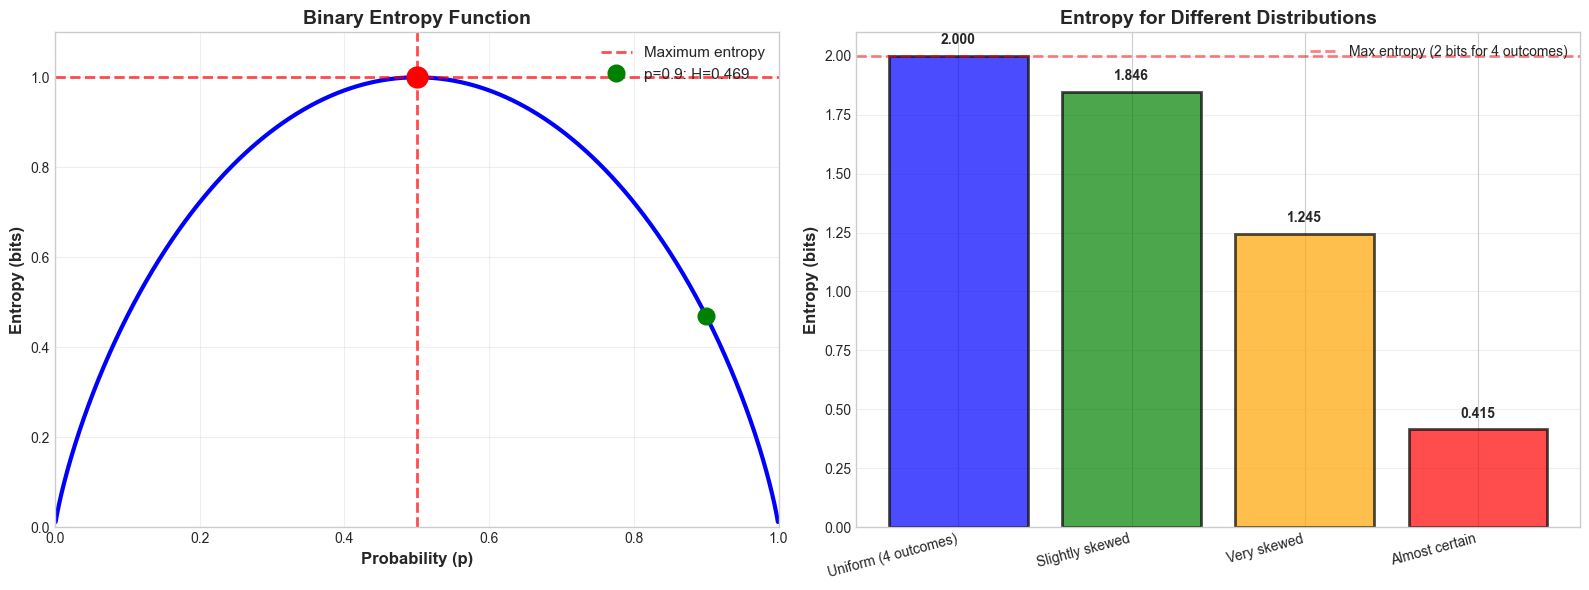


🎯 Key Insights:
   • Log laws: product→sum, quotient→difference, power→multiplication
   • ln(e^x) = x and e^(ln(x)) = x (inverse relationship)
   • Domain: x > 0; Range: all real numbers
   • Derivative: d/dx[ln(x)] = 1/x
   • Entropy: measures uncertainty using logarithms


In [2]:
# Logarithm Properties - Part 6: Entropy Visualization

# Visualization of entropy for different probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Binary entropy function
p_range = np.linspace(0.001, 0.999, 1000)
binary_entropy = -p_range * np.log2(p_range) - (1 - p_range) * np.log2(1 - p_range)

# Calculate entropy for biased coin (p=0.9)
p_biased_val = 0.9
entropy_biased = -p_biased_val * np.log2(p_biased_val) - (1 - p_biased_val) * np.log2(1 - p_biased_val)

ax1.plot(p_range, binary_entropy, 'b-', linewidth=3)
ax1.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Maximum entropy')
ax1.axhline(y=1, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.plot(0.5, 1, 'ro', markersize=15, zorder=5)
ax1.plot(0.9, entropy_biased, 'go', markersize=12, zorder=5, label=f'p=0.9: H={entropy_biased:.3f}')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Probability (p)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Entropy (bits)', fontsize=12, fontweight='bold')
ax1.set_title('Binary Entropy Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1.1)

# Compare different distributions
distributions = {
    'Uniform (4 outcomes)': np.array([0.25, 0.25, 0.25, 0.25]),
    'Slightly skewed': np.array([0.4, 0.3, 0.2, 0.1]),
    'Very skewed': np.array([0.7, 0.2, 0.07, 0.03]),
    'Almost certain': np.array([0.94, 0.03, 0.02, 0.01])
}

entropies = []
names = []

for name, dist in distributions.items():
    entropy = -np.sum(dist * np.log2(dist + 1e-10))  # Add small value to avoid log(0)
    entropies.append(entropy)
    names.append(name)

ax2.bar(range(len(names)), entropies, color=['blue', 'green', 'orange', 'red'],
       alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels(names, rotation=15, ha='right')
ax2.set_ylabel('Entropy (bits)', fontsize=12, fontweight='bold')
ax2.set_title('Entropy for Different Distributions', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=2, color='red', linestyle='--', linewidth=2, alpha=0.5, 
           label='Max entropy (2 bits for 4 outcomes)')
ax2.legend(fontsize=10)

for i, (name, entropy) in enumerate(zip(names, entropies)):
    ax2.text(i, entropy + 0.05, f'{entropy:.3f}', ha='center', 
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • Log laws: product→sum, quotient→difference, power→multiplication")
print("   • ln(e^x) = x and e^(ln(x)) = x (inverse relationship)")
print("   • Domain: x > 0; Range: all real numbers")
print("   • Derivative: d/dx[ln(x)] = 1/x")
print("   • Entropy: measures uncertainty using logarithms")

In [6]:
## 2. Change of Base Formula

### The Formula

To convert a logarithm from one base to another:

$$\log_b(x) = \frac{\log_c(x)}{\log_c(b)}$$

**Most common:** Convert to natural logarithm or common logarithm:

$$\log_b(x) = \frac{\ln(x)}{\ln(b)} = \frac{\log_{10}(x)}{\log_{10}(b)}$$

---

### Proof

Let $y = \log_b(x)$, which means $b^y = x$

Taking $\log_c$ of both sides:
$$\log_c(b^y) = \log_c(x)$$

Using power rule:
$$y \cdot \log_c(b) = \log_c(x)$$

Solving for $y$:
$$y = \frac{\log_c(x)}{\log_c(b)}$$

Therefore:
$$\log_b(x) = \frac{\log_c(x)}{\log_c(b)}$$ ∎

---

### Special Cases

1. **Converting to natural log:**
   $$\log_b(x) = \frac{\ln(x)}{\ln(b)}$$

2. **Converting to common log:**
   $$\log_b(x) = \frac{\log_{10}(x)}{\log_{10}(b)}$$

3. **Reciprocal relationship:**
   $$\log_b(a) = \frac{1}{\log_a(b)}$$
   
   **Proof:** Using change of base twice:
   $$\log_b(a) \cdot \log_a(b) = \frac{\ln(a)}{\ln(b)} \cdot \frac{\ln(b)}{\ln(a)} = 1$$

4. **Chain rule:**
   $$\log_a(b) \cdot \log_b(c) = \log_a(c)$$

---

### Examples

**Example 1:** Calculate $\log_2(10)$

$$\log_2(10) = \frac{\ln(10)}{\ln(2)} = \frac{2.3026}{0.6931} \approx 3.322$$

Verification: $2^{3.322} \approx 10$ ✓

**Example 2:** Calculate $\log_5(100)$

$$\log_5(100) = \frac{\log_{10}(100)}{\log_{10}(5)} = \frac{2}{0.699} \approx 2.861$$

Verification: $5^{2.861} \approx 100$ ✓

**Example 3:** Simplify $\log_4(8)$

Method 1 (Change of base):
$$\log_4(8) = \frac{\log_2(8)}{\log_2(4)} = \frac{3}{2} = 1.5$$

Method 2 (Direct):
$$4^x = 8 \implies (2^2)^x = 2^3 \implies 2^{2x} = 2^3 \implies 2x = 3 \implies x = 1.5$$ ✓

---

### Why Change of Base?

1. **Calculator Limitations:**
   - Most calculators only have $\ln$ and $\log_{10}$ buttons
   - To compute $\log_2(100)$, use: $\frac{\ln(100)}{\ln(2)}$

2. **Simplification:**
   - Converting complex bases to natural log
   - Easier numerical computation

3. **Standardization:**
   - Convert all logs to same base for comparison
   - Facilitate algebraic manipulation

4. **Programming:**
   - Languages typically provide only `log()`, `log10()`, `log2()`
   - Change of base for other bases

---

### Relationship Between Bases

| Base | Symbol | Context | Relationship to $\ln$ |
|------|--------|---------|---------------------|
| $e$ | $\ln(x)$ | Natural, calculus | $\ln(x)$ |
| 2 | $\log_2(x)$ | Computer science, information theory | $\frac{\ln(x)}{\ln(2)}$ |
| 10 | $\log_{10}(x)$ | Engineering, pH scale | $\frac{\ln(x)}{\ln(10)}$ |
| $b$ | $\log_b(x)$ | General | $\frac{\ln(x)}{\ln(b)}$ |

---

### Data Science Applications

1. **Information Theory:**
   - Entropy can use any base: $H(X) = -\sum_i p_i \log_b(p_i)$
   - Base 2: bits (binary digits)
   - Base $e$: nats (natural units)
   - Base 10: dits (decimal digits)
   - Convert: $H_{\text{bits}} = H_{\text{nats}} \cdot \log_2(e)$

2. **Algorithm Complexity:**
   - $O(\log_2 n)$ vs $O(\ln n)$ — differ only by constant
   - Big-O notation absorbs constant factors
   - $\log_2(n) = \frac{\ln(n)}{\ln(2)} \approx 1.443 \cdot \ln(n)$

3. **Decibels (Audio/Signal Processing):**
   - Decibel scale: $\text{dB} = 10 \log_{10}\left(\frac{P}{P_0}\right)$
   - Convert to natural log: $\text{dB} = 10 \cdot \frac{\ln(P/P_0)}{\ln(10)}$

4. **pH Scale (Chemistry):**
   - pH = $-\log_{10}[\text{H}^+]$
   - Concentration calculations require base conversions

5. **Benford's Law:**
   - Digit frequency: $P(d) = \log_{10}(1 + 1/d)$
   - Fraud detection in financial data
   - Can express in any base using change of base

---

### Common Patterns

**Pattern 1:** $\log_b(b^n) = n$
- Direct application of inverse property
- No need for change of base

**Pattern 2:** $\log_{b^k}(x) = \frac{1}{k}\log_b(x)$
- Proof: $\log_{b^k}(x) = \frac{\ln(x)}{\ln(b^k)} = \frac{\ln(x)}{k\ln(b)} = \frac{1}{k}\log_b(x)$

**Pattern 3:** $\log_b(a) \cdot \log_a(b) = 1$
- Reciprocal relationship
- Useful in simplification

---

### Computational Considerations

**Numerical Stability:**
```python
# Good: Use natural log for intermediate calculations
log_b_x = np.log(x) / np.log(b)

# Avoid: Multiple conversions can accumulate errors
log_b_x = log10(x) / log10(b)  # Fine, but ln preferred
```

**Performance:**
- Natural log `ln(x)` is typically fastest (hardware optimized)
- Base-2 log `log2(x)` also efficient
- Other bases: compute via change of base

---

### Common Mistakes

⚠️ **Forgetting to change both numerator and denominator:**
- Wrong: $\log_b(x) = \frac{\ln(x)}{b}$
- Correct: $\log_b(x) = \frac{\ln(x)}{\ln(b)}$

⚠️ **Confusing with power:**
- $\log_b(x) \neq \frac{\log(x)}{\log(b)}$ unless context specifies $\log = \log_{10}$
- Always specify base when writing

⚠️ **Arithmetic errors:**
- $\log_2(8) = 3$ not $4$ (don't confuse with $2 \times 4 = 8$)
- Verify: $2^3 = 8$ ✓


4. APPLICATION: INFORMATION THEORY - ENTROPY
--------------------------------------------------

   Fair coin (p = 0.5 for heads and tails):
   H(X) = -[0.5·log₂(0.5) + 0.5·log₂(0.5)]
   H(X) = 1.0000 bits
   Interpretation: Maximum uncertainty (1 bit needed per outcome)

   Biased coin (p = 0.9 for heads, 0.1 for tails):
   H(X) = -[0.9·log₂(0.9) + 0.1·log₂(0.1)]
   H(X) = 0.4690 bits
   Interpretation: Lower uncertainty (outcome more predictable)


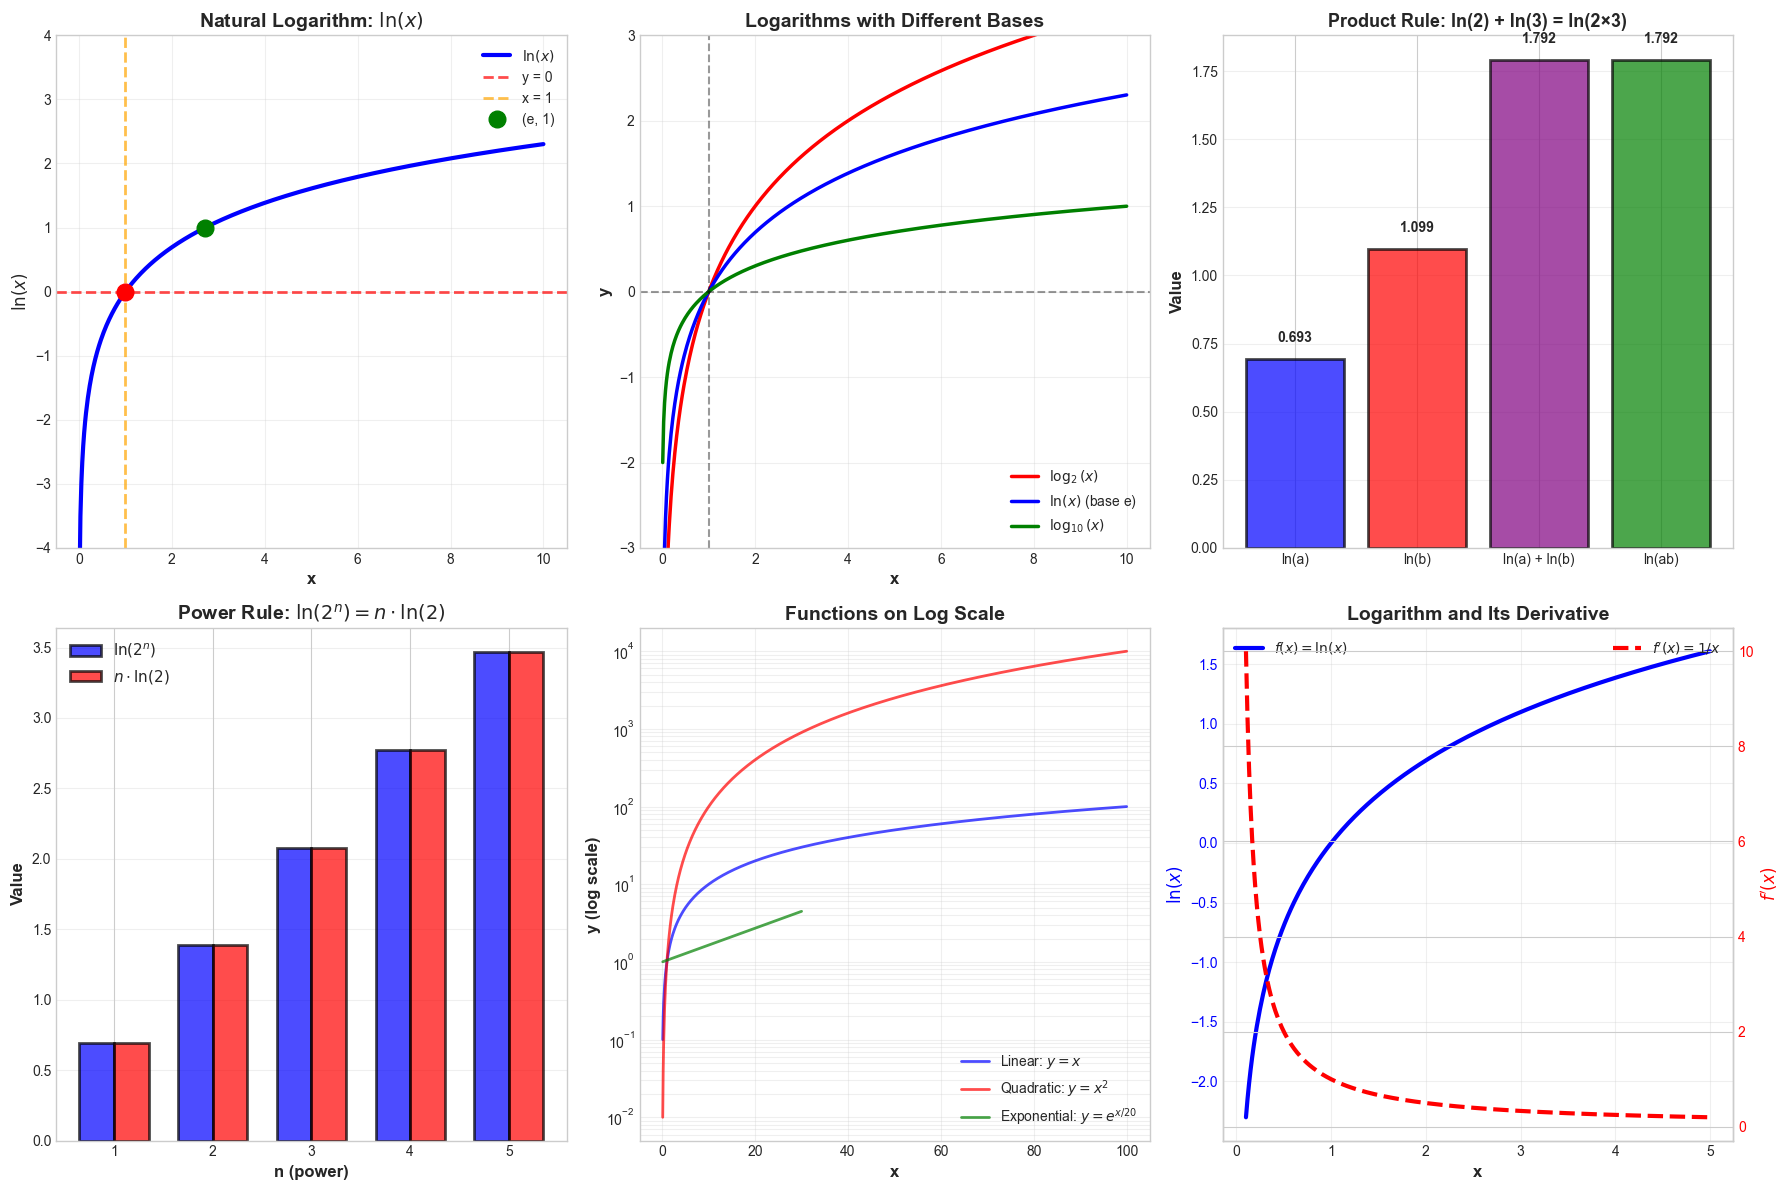

In [3]:
# Logarithm Properties - Part 4: Visualization (Plots 1-6)

# Visualization 1: Logarithm Functions with Different Bases
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

x_positive = np.linspace(0.01, 10, 500)

# Plot 1: Natural logarithm
ax1 = axes[0, 0]
ax1.plot(x_positive, np.log(x_positive), 'b-', linewidth=3, label='$\\ln(x)$')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='y = 0')
ax1.axvline(x=1, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='x = 1')
ax1.plot(1, 0, 'ro', markersize=12, zorder=5)
ax1.plot(np.e, 1, 'go', markersize=12, zorder=5, label=f'(e, 1)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('$\\ln(x)$', fontsize=12, fontweight='bold')
ax1.set_title('Natural Logarithm: $\\ln(x)$', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(-4, 4)

# Plot 2: Different bases comparison
ax2 = axes[0, 1]
ax2.plot(x_positive, np.log2(x_positive), 'r-', linewidth=2.5, label='$\\log_2(x)$')
ax2.plot(x_positive, np.log(x_positive), 'b-', linewidth=2.5, label='$\\ln(x)$ (base e)')
ax2.plot(x_positive, np.log10(x_positive), 'g-', linewidth=2.5, label='$\\log_{10}(x)$')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.4)
ax2.axvline(x=1, color='k', linestyle='--', alpha=0.4)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Logarithms with Different Bases', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(-3, 3)

# Plot 3: Product rule visualization
ax3 = axes[0, 2]
a_val, b_val = 2, 3
product_val = a_val * b_val

bars = ax3.bar(['ln(a)', 'ln(b)', 'ln(a) + ln(b)', 'ln(ab)'],
               [np.log(a_val), np.log(b_val), np.log(a_val) + np.log(b_val), np.log(product_val)],
               color=['blue', 'red', 'purple', 'green'], alpha=0.7, edgecolor='black', linewidth=2)

ax3.set_ylabel('Value', fontsize=12, fontweight='bold')
ax3.set_title(f'Product Rule: ln({a_val}) + ln({b_val}) = ln({a_val}×{b_val})', 
             fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Power rule visualization
ax4 = axes[1, 0]
x_val = 2
powers = np.array([1, 2, 3, 4, 5])
log_powers = np.log(x_val ** powers)
n_times_log = powers * np.log(x_val)

width = 0.35
x_pos = np.arange(len(powers))

ax4.bar(x_pos - width/2, log_powers, width, label=f'$\\ln({x_val}^n)$', 
       color='blue', alpha=0.7, edgecolor='black', linewidth=2)
ax4.bar(x_pos + width/2, n_times_log, width, label=f'$n \\cdot \\ln({x_val})$',
       color='red', alpha=0.7, edgecolor='black', linewidth=2)

ax4.set_xlabel('n (power)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Value', fontsize=12, fontweight='bold')
ax4.set_title(f'Power Rule: $\\ln({x_val}^n) = n \\cdot \\ln({x_val})$', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(powers)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# Plot 5: Log transforms different distributions
ax5 = axes[1, 1]
x_range = np.linspace(0.1, 100, 1000)
y_linear = x_range
y_quadratic = x_range ** 2
y_exponential = np.exp(x_range / 20)

ax5.plot(x_range, y_linear, 'b-', linewidth=2, label='Linear: $y = x$', alpha=0.7)
ax5.plot(x_range, y_quadratic, 'r-', linewidth=2, label='Quadratic: $y = x^2$', alpha=0.7)
ax5.plot(x_range[:300], y_exponential[:300], 'g-', linewidth=2, 
        label='Exponential: $y = e^{x/20}$', alpha=0.7)

ax5.set_yscale('log')
ax5.grid(True, alpha=0.3, which='both')
ax5.set_xlabel('x', fontsize=12, fontweight='bold')
ax5.set_ylabel('y (log scale)', fontsize=12, fontweight='bold')
ax5.set_title('Functions on Log Scale', fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)

# Plot 6: Derivative demonstration
ax6 = axes[1, 2]
x_deriv = np.linspace(0.1, 5, 300)
y_ln = np.log(x_deriv)
y_derivative = 1 / x_deriv

ax6_twin = ax6.twinx()

ax6.plot(x_deriv, y_ln, 'b-', linewidth=3, label='$f(x) = \\ln(x)$')
ax6_twin.plot(x_deriv, y_derivative, 'r--', linewidth=3, label="$f'(x) = 1/x$")

ax6.set_xlabel('x', fontsize=12, fontweight='bold')
ax6.set_ylabel('$\\ln(x)$', fontsize=12, fontweight='bold', color='blue')
ax6_twin.set_ylabel("$f'(x)$", fontsize=12, fontweight='bold', color='red')
ax6.tick_params(axis='y', labelcolor='blue')
ax6_twin.tick_params(axis='y', labelcolor='red')
ax6.set_title('Logarithm and Its Derivative', fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.legend(loc='upper left', fontsize=10)
ax6_twin.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
## 3. Solving Exponential Equations

### General Strategy

To solve equations involving exponentials and logarithms:

1. **Isolate the exponential** term
2. **Take logarithm** of both sides
3. **Apply logarithm properties** to simplify
4. **Solve for the variable**

---

### Type 1: Basic Exponential Equations

**Form:** $b^x = c$

**Solution:** Take logarithm of both sides
$$\log(b^x) = \log(c)$$
$$x \cdot \log(b) = \log(c)$$
$$x = \frac{\log(c)}{\log(b)}$$

**Example:** Solve $2^x = 100$

$$x = \frac{\ln(100)}{\ln(2)} = \frac{4.605}{0.693} \approx 6.644$$

**Verification:** $2^{6.644} \approx 100$ ✓

---

### Type 2: Exponentials with Same Base

**Form:** $b^{f(x)} = b^{g(x)}$

**Solution:** Since bases are equal, exponents must be equal
$$f(x) = g(x)$$

**Example:** Solve $3^{2x+1} = 3^{x+4}$

$$2x + 1 = x + 4$$
$$x = 3$$

---

### Type 3: Exponential Products/Quotients

**Form:** $a \cdot b^x = c$

**Solution:** Isolate exponential, then take log

**Example:** Solve $5 \cdot 2^x = 160$

$$2^x = \frac{160}{5} = 32$$
$$x = \log_2(32) = 5$$

---

### Type 4: Exponentials with Different Bases

**Form:** $a^x = b^x$

**Strategy:** Take log and rearrange

**Example:** Solve $2^x = 3^{x-1}$

$$\ln(2^x) = \ln(3^{x-1})$$
$$x \ln(2) = (x-1) \ln(3)$$
$$x \ln(2) = x \ln(3) - \ln(3)$$
$$x[\ln(2) - \ln(3)] = -\ln(3)$$
$$x = \frac{-\ln(3)}{\ln(2) - \ln(3)} = \frac{\ln(3)}{\ln(3) - \ln(2)} \approx 2.710$$

---

### Type 5: Quadratic-Type Exponential Equations

**Form:** $a(b^x)^2 + c(b^x) + d = 0$

**Strategy:** Substitute $u = b^x$, solve quadratic, then solve for $x$

**Example:** Solve $e^{2x} - 5e^x + 6 = 0$

Let $u = e^x$:
$$u^2 - 5u + 6 = 0$$
$$(u-2)(u-3) = 0$$
$$u = 2 \text{ or } u = 3$$

Back-substitute:
$$e^x = 2 \implies x = \ln(2) \approx 0.693$$
$$e^x = 3 \implies x = \ln(3) \approx 1.099$$

---

### Type 6: Logarithmic Equations

**Form:** $\log_b(f(x)) = c$

**Solution:** Convert to exponential form
$$f(x) = b^c$$

**Example:** Solve $\log_2(x+3) = 5$

$$x + 3 = 2^5 = 32$$
$$x = 29$$

**Check domain:** $x + 3 > 0 \implies x > -3$ ✓

---

### Type 7: Multiple Logarithms

**Form:** $\log(f(x)) + \log(g(x)) = c$

**Strategy:** Use product rule, then convert to exponential

**Example:** Solve $\ln(x) + \ln(x-2) = \ln(8)$

$$\ln[x(x-2)] = \ln(8)$$
$$x(x-2) = 8$$
$$x^2 - 2x - 8 = 0$$
$$(x-4)(x+2) = 0$$
$$x = 4 \text{ or } x = -2$$

**Check domain:** $x > 0$ and $x - 2 > 0$, so $x > 2$

Only $x = 4$ is valid ✓

---

### Special Techniques

#### Technique 1: Change of Base
Convert all logarithms to same base before solving

#### Technique 2: Exponentiate Both Sides
For equations like $\ln(x) = 5$, exponentiate: $e^{\ln(x)} = e^5$, so $x = e^5$

#### Technique 3: Substitution
For complex expressions, substitute $u$ for repeated pattern

#### Technique 4: Domain Checking
**Always verify** solutions satisfy domain restrictions:
- Logarithm arguments must be positive
- Exponential bases must be positive and ≠ 1

---

### Common Patterns and Solutions

| Equation Type | Solution |
|---------------|----------|
| $b^x = c$ | $x = \log_b(c) = \frac{\ln(c)}{\ln(b)}$ |
| $\log_b(x) = c$ | $x = b^c$ |
| $a \cdot b^{cx} = d$ | $x = \frac{1}{c} \log_b\left(\frac{d}{a}\right)$ |
| $\ln(x) + \ln(y) = c$ | $xy = e^c$ |
| $\ln(x) - \ln(y) = c$ | $\frac{x}{y} = e^c$ |

---

### Applications in Data Science

1. **Solving for Growth Rate:**
   Given $N(t) = N_0 e^{kt}$, find $k$:
   $$k = \frac{1}{t}\ln\left(\frac{N(t)}{N_0}\right)$$

2. **Logistic Regression:**
   Solve for $x$ when $P(y=1|x) = p$:
   $$x = \frac{1}{\beta}\left[\ln\left(\frac{p}{1-p}\right) - \alpha\right]$$

3. **Maximum Likelihood Estimation:**
   Solve $\frac{d}{d\theta}[\log L(\theta)] = 0$ for parameter $\theta$

4. **Exponential Decay Models:**
   Find half-life from decay constant: $t_{1/2} = \frac{\ln(2)}{k}$

5. **Information Retrieval:**
   TF-IDF scoring: $\text{IDF}(t) = \log\left(\frac{N}{n_t}\right)$
   Solve for $n_t$ given IDF score

---

### Common Mistakes

⚠️ **Forgetting to check domain:**
- Solution may be mathematically correct but violate $\log$ domain
- Always verify $x > 0$ for $\log(x)$

⚠️ **Incorrect logarithm laws:**
- $\log(a + b) \neq \log(a) + \log(b)$
- $\log(a - b) \neq \log(a) - \log(b)$

⚠️ **Sign errors:**
- $\log(1/x) = -\log(x)$, not $1/\log(x)$

⚠️ **Extraneous solutions:**
- Squaring or other operations may introduce invalid solutions
- Always verify in original equation


3. INVERSE RELATIONSHIP
--------------------------------------------------

   Verifying: ln(e^x) = x and e^(ln(x)) = x

        x |          e^x |      ln(e^x) |        ln(x) |    e^(ln(x))
   -----------------------------------------------------------------
     0.50 |       1.6487 |       0.5000 |      -0.6931 |       0.5000
     1.00 |       2.7183 |       1.0000 |       0.0000 |       1.0000
     2.00 |       7.3891 |       2.0000 |       0.6931 |       2.0000
     5.00 |     148.4132 |       5.0000 |       1.6094 |       5.0000
    10.00 |   22026.4658 |      10.0000 |       2.3026 |      10.0000


In [4]:
# Logarithm Properties - Part 2: Special Values

# Special Values
print("\n2. SPECIAL VALUES")
print("-" * 50)

special_cases = [
    ("ln(1)", np.log(1), 0, "Because e^0 = 1"),
    ("ln(e)", np.log(np.e), 1, "Because e^1 = e"),
    ("ln(e²)", np.log(np.e**2), 2, "Because e^2 = e²"),
    ("ln(1/e)", np.log(1/np.e), -1, "Because e^(-1) = 1/e"),
    ("ln(√e)", np.log(np.sqrt(np.e)), 0.5, "Because e^(0.5) = √e"),
]

for expr, value, expected, reason in special_cases:
    print(f"\n   {expr:12s} = {value:8.6f} (expected: {expected:5.1f})")
    print(f"   {' ':12s}   {reason}")


2. SPECIAL VALUES
--------------------------------------------------

   ln(1)        = 0.000000 (expected:   0.0)
                  Because e^0 = 1

   ln(e)        = 1.000000 (expected:   1.0)
                  Because e^1 = e

   ln(e²)       = 2.000000 (expected:   2.0)
                  Because e^2 = e²

   ln(1/e)      = -1.000000 (expected:  -1.0)
                  Because e^(-1) = 1/e

   ln(√e)       = 0.500000 (expected:   0.5)
                  Because e^(0.5) = √e


In [10]:
## 4. Applications in Data Transformation

### Why Transform Data?

Data transformation is crucial in data science for:
1. **Normalizing** skewed distributions
2. **Stabilizing** variance
3. **Linearizing** relationships
4. **Meeting** statistical assumptions
5. **Improving** model performance

---

### Log Transformation

**Definition:** Transform $x \to \log(x)$ or $x \to \ln(x)$

**When to use:**
- Right-skewed data (long tail to the right)
- Data spanning several orders of magnitude
- Multiplicative relationships

**Effect:**
- Compresses large values
- Expands small values
- Makes distribution more symmetric

**Formula:**
$$x' = \log(x) \quad \text{or} \quad x' = \ln(x)$$

---

### Box-Cox Transformation

**General power transformation:**
$$x'(\lambda) = \begin{cases}
\frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(x) & \text{if } \lambda = 0
\end{cases}$$

**Special cases:**
- $\lambda = -1$: Inverse transformation
- $\lambda = 0$: Log transformation
- $\lambda = 0.5$: Square root
- $\lambda = 1$: No transformation
- $\lambda = 2$: Square

---

### Applications

#### 1. Feature Engineering in Machine Learning

**Income Data:** Typically right-skewed
$$\text{log\_income} = \log(\text{income})$$

**Population/Size:** Often log-normally distributed
$$\text{log\_population} = \log(\text{population})$$

#### 2. Linearizing Exponential Relationships

If $y = ab^x$, then:
$$\log(y) = \log(a) + x\log(b)$$

This is linear in $x$! Can use linear regression on $\log(y)$.

#### 3. Stabilizing Variance

**Heteroscedasticity:** Variance increases with mean

Log transformation often stabilizes variance when $\sigma^2 \propto \mu$

#### 4. Financial Returns

**Log returns** are additive and symmetric:
$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

**Properties:**
- $r_{1 \to 3} = r_{1 \to 2} + r_{2 \to 3}$ (additive!)
- Approximately equal to simple returns for small changes
- Symmetric: $\ln(1.1) = -\ln(1/1.1)$

#### 5. Time Series Data

**GDP, stock prices, population:** Often exponential growth

Log transformation → linear trend

#### 6. Ratios and Percentages

**Odds ratio in logistic regression:**
$$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x$$

---

### Inverse Transformations

After modeling on log scale, transform back:

$$\hat{y} = e^{\hat{y}_{\log}}$$

**Bias correction** for mean prediction:
$$E[Y] = e^{\mu + \sigma^2/2} \quad \text{(lognormal distribution)}$$

---

### Interpreting Log-Transformed Coefficients

**Model:** $\log(y) = \beta_0 + \beta_1 x$

**Interpretation:** 1-unit increase in $x$ → $\beta_1 \times 100\%$ change in $y$

**Example:** If $\beta_1 = 0.05$:
- 1-unit increase in $x$ → 5% increase in $y$

---

### Common Transformations Comparison

| Transformation | Formula | Use Case | Effect |
|----------------|---------|----------|--------|
| Log | $\ln(x)$ | Right skew | Strong compression |
| Square root | $\sqrt{x}$ | Moderate right skew | Moderate compression |
| Reciprocal | $1/x$ | Extreme right skew | Very strong compression |
| Square | $x^2$ | Left skew | Expansion |
| Log-log | $\ln(y)$ vs $\ln(x)$ | Power relationships | Linearizes $y = ax^b$ |
| Semi-log | $\ln(y)$ vs $x$ | Exponential growth | Linearizes $y = ae^{bx}$ |

---

### Handling Zero and Negative Values

**Problem:** $\log(0)$ and $\log(x < 0)$ are undefined

**Solutions:**

1. **Add constant:**
   $$x' = \log(x + c) \quad \text{where } c > 0$$
   
   Common: $c = 1$ (log-plus-one transformation)

2. **Yeo-Johnson transformation** (extension of Box-Cox for $x \leq 0$)

3. **Signed log:**
   $$x' = \text{sign}(x) \cdot \log(|x| + 1)$$

---

### Data Science Best Practices

1. **Explore first:** Plot histograms before transforming
2. **Check assumptions:** Does transformation meet model requirements?
3. **Document:** Always record transformations applied
4. **Validate:** Check if transformation improves model performance
5. **Interpret carefully:** Remember coefficients are in transformed space
6. **Transform consistently:** Apply same transformation to train and test sets

---

### Statistical Tests for Normality

**Before and after transformation:**

1. **Shapiro-Wilk test:** Tests null hypothesis that data is normal
2. **Q-Q plot:** Visual check for normality
3. **Skewness and kurtosis:** Quantify distribution shape

**Goal:** Transform → Normal-ish distribution (for many statistical tests)

LOGARITHM PROPERTIES - DEMONSTRATIONS

1. LOGARITHM LAWS VERIFICATION
--------------------------------------------------

   Test values: x = 15, y = 6
   Using natural logarithm (base e)

   ✓ Product Rule: ln(xy) = ln(x) + ln(y)
     ln(15 × 6) = ln(90) = 4.499810
     ln(15) + ln(6) = 2.708050 + 1.791759 = 4.499810
     Difference: 0.0000000000 (essentially 0)

   ✓ Quotient Rule: ln(x/y) = ln(x) - ln(y)
     ln(15/6) = ln(2.5000) = 0.916291
     ln(15) - ln(6) = 2.708050 - 1.791759 = 0.916291
     Difference: 0.0000000000

   ✓ Power Rule: ln(x^n) = n·ln(x)
     ln(15^3) = ln(3375) = 8.124151
     3·ln(15) = 3 × 2.708050 = 8.124151
     Difference: 0.0000000000


## 2. Change of Base Formula

### The Formula

To convert a logarithm from one base to another:

$$\log_b(x) = \frac{\log_c(x)}{\log_c(b)}$$

**Most common:** Convert to natural logarithm or common logarithm:

$$\log_b(x) = \frac{\ln(x)}{\ln(b)} = \frac{\log_{10}(x)}{\log_{10}(b)}$$

---

### Proof

Let $y = \log_b(x)$, which means $b^y = x$

Taking $\log_c$ of both sides:
$$\log_c(b^y) = \log_c(x)$$

Using power rule:
$$y \cdot \log_c(b) = \log_c(x)$$

Solving for $y$:
$$y = \frac{\log_c(x)}{\log_c(b)}$$

Therefore:
$$\log_b(x) = \frac{\log_c(x)}{\log_c(b)}$$ ∎

---

### Special Cases

1. **Converting to natural log:**
   $$\log_b(x) = \frac{\ln(x)}{\ln(b)}$$

2. **Converting to common log:**
   $$\log_b(x) = \frac{\log_{10}(x)}{\log_{10}(b)}$$

3. **Reciprocal relationship:**
   $$\log_b(a) = \frac{1}{\log_a(b)}$$
   
   **Proof:** Using change of base twice:
   $$\log_b(a) \cdot \log_a(b) = \frac{\ln(a)}{\ln(b)} \cdot \frac{\ln(b)}{\ln(a)} = 1$$

4. **Chain rule:**
   $$\log_a(b) \cdot \log_b(c) = \log_a(c)$$

---

### Examples

**Example 1:** Calculate $\log_2(10)$

$$\log_2(10) = \frac{\ln(10)}{\ln(2)} = \frac{2.3026}{0.6931} \approx 3.322$$

Verification: $2^{3.322} \approx 10$ ✓

**Example 2:** Calculate $\log_5(100)$

$$\log_5(100) = \frac{\log_{10}(100)}{\log_{10}(5)} = \frac{2}{0.699} \approx 2.861$$

Verification: $5^{2.861} \approx 100$ ✓

**Example 3:** Simplify $\log_4(8)$

Method 1 (Change of base):
$$\log_4(8) = \frac{\log_2(8)}{\log_2(4)} = \frac{3}{2} = 1.5$$

Method 2 (Direct):
$$4^x = 8 \implies (2^2)^x = 2^3 \implies 2^{2x} = 2^3 \implies 2x = 3 \implies x = 1.5$$ ✓

---

### Why Change of Base?

1. **Calculator Limitations:**
   - Most calculators only have $\ln$ and $\log_{10}$ buttons
   - To compute $\log_2(100)$, use: $\frac{\ln(100)}{\ln(2)}$

2. **Simplification:**
   - Converting complex bases to natural log
   - Easier numerical computation

3. **Standardization:**
   - Convert all logs to same base for comparison
   - Facilitate algebraic manipulation

4. **Programming:**
   - Languages typically provide only `log()`, `log10()`, `log2()`
   - Change of base for other bases

---

### Relationship Between Bases

| Base | Symbol | Context | Relationship to $\ln$ |
|------|--------|---------|---------------------|
| $e$ | $\ln(x)$ | Natural, calculus | $\ln(x)$ |
| 2 | $\log_2(x)$ | Computer science, information theory | $\frac{\ln(x)}{\ln(2)}$ |
| 10 | $\log_{10}(x)$ | Engineering, pH scale | $\frac{\ln(x)}{\ln(10)}$ |
| $b$ | $\log_b(x)$ | General | $\frac{\ln(x)}{\ln(b)}$ |

---

### Data Science Applications

1. **Information Theory:**
   - Entropy can use any base: $H(X) = -\sum_i p_i \log_b(p_i)$
   - Base 2: bits (binary digits)
   - Base $e$: nats (natural units)
   - Base 10: dits (decimal digits)
   - Convert: $H_{\text{bits}} = H_{\text{nats}} \cdot \log_2(e)$

2. **Algorithm Complexity:**
   - $O(\log_2 n)$ vs $O(\ln n)$ — differ only by constant
   - Big-O notation absorbs constant factors
   - $\log_2(n) = \frac{\ln(n)}{\ln(2)} \approx 1.443 \cdot \ln(n)$

3. **Decibels (Audio/Signal Processing):**
   - Decibel scale: $\text{dB} = 10 \log_{10}\left(\frac{P}{P_0}\right)$
   - Convert to natural log: $\text{dB} = 10 \cdot \frac{\ln(P/P_0)}{\ln(10)}$

4. **pH Scale (Chemistry):**
   - pH = $-\log_{10}[\text{H}^+]$
   - Concentration calculations require base conversions

5. **Benford's Law:**
   - Digit frequency: $P(d) = \log_{10}(1 + 1/d)$
   - Fraud detection in financial data
   - Can express in any base using change of base

---

### Common Patterns

**Pattern 1:** $\log_b(b^n) = n$
- Direct application of inverse property
- No need for change of base

**Pattern 2:** $\log_{b^k}(x) = \frac{1}{k}\log_b(x)$
- Proof: $\log_{b^k}(x) = \frac{\ln(x)}{\ln(b^k)} = \frac{\ln(x)}{k\ln(b)} = \frac{1}{k}\log_b(x)$

**Pattern 3:** $\log_b(a) \cdot \log_a(b) = 1$
- Reciprocal relationship
- Useful in simplification

---

### Computational Considerations

**Numerical Stability:**
```python
# Good: Use natural log for intermediate calculations
log_b_x = np.log(x) / np.log(b)

# Avoid: Multiple conversions can accumulate errors
log_b_x = log10(x) / log10(b)  # Fine, but ln preferred
```

**Performance:**
- Natural log `ln(x)` is typically fastest (hardware optimized)
- Base-2 log `log2(x)` also efficient
- Other bases: compute via change of base

---

### Common Mistakes

⚠️ **Forgetting to change both numerator and denominator:**
- Wrong: $\log_b(x) = \frac{\ln(x)}{b}$
- Correct: $\log_b(x) = \frac{\ln(x)}{\ln(b)}$

⚠️ **Confusing with power:**
- $\log_b(x) \neq \frac{\log(x)}{\log(b)}$ unless context specifies $\log = \log_{10}$
- Always specify base when writing

⚠️ **Arithmetic errors:**
- $\log_2(8) = 3$ not $4$ (don't confuse with $2 \times 4 = 8$)
- Verify: $2^3 = 8$ ✓

In [11]:
## 5. Log Scales in Visualization

### Why Use Log Scales?

Log scales are essential when visualizing data that:
1. **Spans many orders of magnitude** (e.g., 1 to 1,000,000)
2. **Grows exponentially** (population, GDP, viral spread)
3. **Contains both small and large values**
4. **Exhibits power-law distributions** (Zipf's law, Pareto)

---

### Types of Log Scales

#### 1. Semi-Log Plot (Y-axis log scale)
- **Linear x-axis, logarithmic y-axis**
- Use for: Exponential growth/decay
- Exponential curves → straight lines

#### 2. Log-Log Plot (Both axes log scale)
- **Logarithmic x-axis and y-axis**
- Use for: Power-law relationships
- Power laws $y = ax^b$ → straight lines with slope $b$

#### 3. Symmetric Log Scale
- **Handles zero and negative values**
- Linear near zero, logarithmic away from zero

---

### Mathematical Transformation

**Semi-log (y-axis):**
$$\text{Plot: } (x, \log(y))$$

**Log-log:**
$$\text{Plot: } (\log(x), \log(y))$$

---

### Interpreting Log Scales

#### Semi-Log Plot
**Exponential:** $y = ae^{bx}$

On semi-log plot:
$$\log(y) = \log(a) + bx$$

**Straight line** with slope $b$

#### Log-Log Plot
**Power law:** $y = ax^b$

On log-log plot:
$$\log(y) = \log(a) + b\log(x)$$

**Straight line** with slope $b$ (the power exponent!)

---

### Applications

#### 1. Exponential Growth
- **COVID-19 cases** over time
- **Population growth**
- **Compound interest**

Semi-log plot makes exponential growth appear linear.

#### 2. Power Laws
- **Zipf's Law:** word frequency vs rank
- **Pareto Principle:** wealth distribution
- **Internet traffic:** page views vs rank

Log-log plot reveals power-law exponent.

#### 3. Scientific Data
- **Earthquake magnitudes** (Richter scale is logarithmic)
- **Sound intensity** (decibels)
- **pH scale** (hydrogen ion concentration)
- **Stellar brightness** (magnitude scale)

#### 4. Machine Learning
- **Learning curves:** loss vs iterations
- **Hyperparameter tuning:** performance across wide ranges
- **Feature importance:** spans orders of magnitude

---

### When NOT to Use Log Scales

❌ **Data contains zeros or negative values** (standard log undefined)
- Solution: Offset or symmetric log scale

❌ **Data is already normally distributed**
- Log scale can distort perception

❌ **Absolute differences matter more than relative changes**
- Linear scale better shows absolute gaps

❌ **Audience unfamiliar with log scales**
- Can be misleading if not understood

---

### Best Practices

✅ **Label clearly:** Indicate "log scale" in axis label

✅ **Show tick marks:** Use actual values, not log-transformed values

✅ **Explain:** Add note about log scale in caption

✅ **Compare apples to apples:** Use same scale type for comparison

✅ **Choose base wisely:** Base 10 for most, base 2 for computer science

---

### Detecting Relationships from Plots

| Relationship | Linear Plot | Semi-Log Plot | Log-Log Plot |
|--------------|-------------|---------------|--------------|
| Linear: $y = ax + b$ | Straight line | Curve (down) | Curve |
| Exponential: $y = ae^{bx}$ | Curve (up) | **Straight line** | Curve |
| Power: $y = ax^b$ | Curve | Curve | **Straight line** |
| Logarithmic: $y = a + b\ln(x)$ | Curve | Curve | Curve |

---

### Matplotlib Commands

```python
# Semi-log (y-axis log)
plt.semilogy(x, y)
# or
plt.yscale('log')

# Log-log (both axes log)
plt.loglog(x, y)
# or
plt.xscale('log')
plt.yscale('log')

# Symmetric log
plt.yscale('symlog')
```

---

### Common Log Scale Bases

| Base | Name | Use Case | Notation |
|------|------|----------|----------|
| 10 | Common log | General science, engineering | $\log_{10}$ |
| $e$ | Natural log | Mathematics, statistics | $\ln$ |
| 2 | Binary log | Computer science, information theory | $\log_2$ |

**Note:** Matplotlib `log` scale uses base 10 by default!


5. ALGORITHM COMPLEXITY: O(log n) in Different Bases
--------------------------------------------------

            n |      log₂(n) |        ln(n) |     log₁₀(n) |      Ratio
   -----------------------------------------------------------------
           10 |         3.32 |         2.30 |         1.00 |     1.4427
          100 |         6.64 |         4.61 |         2.00 |     1.4427
        1,000 |         9.97 |         6.91 |         3.00 |     1.4427
       10,000 |        13.29 |         9.21 |         4.00 |     1.4427
      100,000 |        16.61 |        11.51 |         5.00 |     1.4427
    1,000,000 |        19.93 |        13.82 |         6.00 |     1.4427

   Note: Ratio ≈ 1.4427 = log₂(e) (constant)
   Big-O absorbs constant factors: O(log₂ n) = O(ln n) = O(log₁₀ n)

🎯 Key Insights:
   • Change of base: log_b(x) = ln(x) / ln(b)
   • Reciprocal: log_b(a) × log_a(b) = 1
   • Chain rule: log_a(b) × log_b(c) = log_a(c)
   • Different bases differ only by constant factor
   

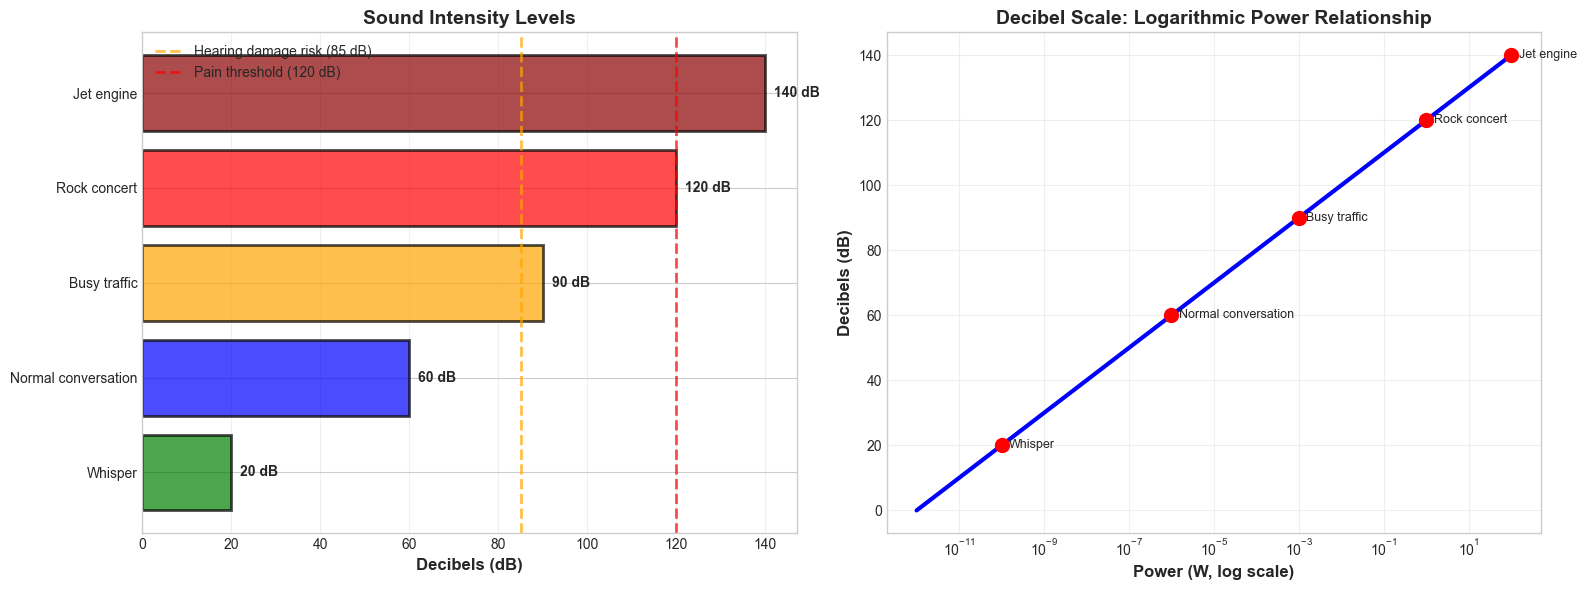

In [12]:
# Change of Base Formula - Part 5: Decibel Visualization

# Reference power
P0 = 1e-12  # watts (threshold of hearing)

# Different sound sources
sounds = {
    "Whisper": 1e-10,
    "Normal conversation": 1e-6,
    "Busy traffic": 1e-3,
    "Rock concert": 1,
    "Jet engine": 100
}

# Visualization of decibel scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Decibel scale
sources_list = list(sounds.keys())
powers_list = list(sounds.values())
dbs_list = [10 * np.log10(p / P0) for p in powers_list]

ax1.barh(range(len(sources_list)), dbs_list, color=['green', 'blue', 'orange', 'red', 'darkred'],
        alpha=0.7, edgecolor='black', linewidth=2)

ax1.set_yticks(range(len(sources_list)))
ax1.set_yticklabels(sources_list)
ax1.set_xlabel('Decibels (dB)', fontsize=12, fontweight='bold')
ax1.set_title('Sound Intensity Levels', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add safety threshold
ax1.axvline(x=85, color='orange', linestyle='--', linewidth=2, 
           label='Hearing damage risk (85 dB)', alpha=0.7)
ax1.axvline(x=120, color='red', linestyle='--', linewidth=2,
           label='Pain threshold (120 dB)', alpha=0.7)
ax1.legend(fontsize=10)

for i, db in enumerate(dbs_list):
    ax1.text(db + 2, i, f'{db:.0f} dB', va='center', fontsize=10, fontweight='bold')

# Plot 2: Power vs Decibels (log scale)
power_range = np.logspace(-12, 2, 300)
db_range = 10 * np.log10(power_range / P0)

ax2.semilogx(power_range, db_range, 'b-', linewidth=3)

# Mark sound sources
for source, power in sounds.items():
    db = 10 * np.log10(power / P0)
    ax2.plot(power, db, 'ro', markersize=10, zorder=5)
    ax2.text(power * 1.5, db, source, fontsize=9, va='center')

ax2.grid(True, alpha=0.3, which='both')
ax2.set_xlabel('Power (W, log scale)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Decibels (dB)', fontsize=12, fontweight='bold')
ax2.set_title('Decibel Scale: Logarithmic Power Relationship', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
## Practice Problems

### Problem 1: Logarithm Properties

Simplify the following expressions without a calculator:

**(a)** $\log_2(64) + \log_2(4) - \log_2(32)$

**(b)** $\ln(e^5) - 2\ln(e)$

**(c)** $\log_{10}(1000) - \log_{10}(100) + \log_{10}(10)$

**(d)** $\frac{\log_3(81)}{\log_3(27)}$

---

### Problem 2: Change of Base

**(a)** Convert $\log_7(50)$ to natural logarithm form and calculate.

**(b)** Show that $\log_2(8) \cdot \log_8(16) = 2$.

**(c)** If $\log_a(b) = 3$, find $\log_b(a)$.

---

### Problem 3: Solving Exponential Equations

Solve for $x$:

**(a)** $5^x = 125$

**(b)** $2^{x+3} = 32$

**(c)** $e^{2x} - 7e^x + 12 = 0$

**(d)** $\ln(x) + \ln(x-3) = \ln(10)$

---

### Problem 4: Data Transformation

You have income data: $\$20,000, \$35,000, \$50,000, \$80,000, \$200,000$

**(a)** Calculate the mean and median of the original data.

**(b)** Apply log transformation (base 10) to the data.

**(c)** Calculate the mean and median of the log-transformed data.

**(d)** Which measure (mean or median) is more affected by the transformation? Why?

---

### Problem 5: Financial Application

You invest \$15,000 in an account with 7\% annual interest, compounded continuously.

**(a)** How long will it take for your investment to double?

**(b)** How much will you have after 10 years?

**(c)** If you want \$50,000, how many years do you need to wait?

---

### Problem 6: Log Scale Interpretation

A researcher plots bacterial colony size vs. time on a semi-log plot and obtains a straight line with equation:

$$\log_{10}(N) = 2 + 0.3t$$

where $N$ is the number of bacteria and $t$ is time in hours.

**(a)** What is the initial population (at $t = 0$)?

**(b)** Write the exponential growth formula for $N(t)$.

**(c)** What is the doubling time?

**(d)** How many bacteria are there after 5 hours?


4. APPLICATION: DECIBEL SCALE (AUDIO/SIGNAL PROCESSING)
--------------------------------------------------

   Sound Source              |    Power (W) |   Decibels (dB)
   ------------------------------------------------------------
   Whisper                   |     1.00e-10 |            20.0
   Normal conversation       |     1.00e-06 |            60.0
   Busy traffic              |     1.00e-03 |            90.0
   Rock concert              |     1.00e+00 |           120.0
   Jet engine                |     1.00e+02 |           140.0

   Using natural log: dB = 10 × ln(P/P₀) / ln(10)
   Whisper: 20.00 dB (ln) ≈ 20.00 dB (log₁₀)
   Normal conversation: 60.00 dB (ln) ≈ 60.00 dB (log₁₀)


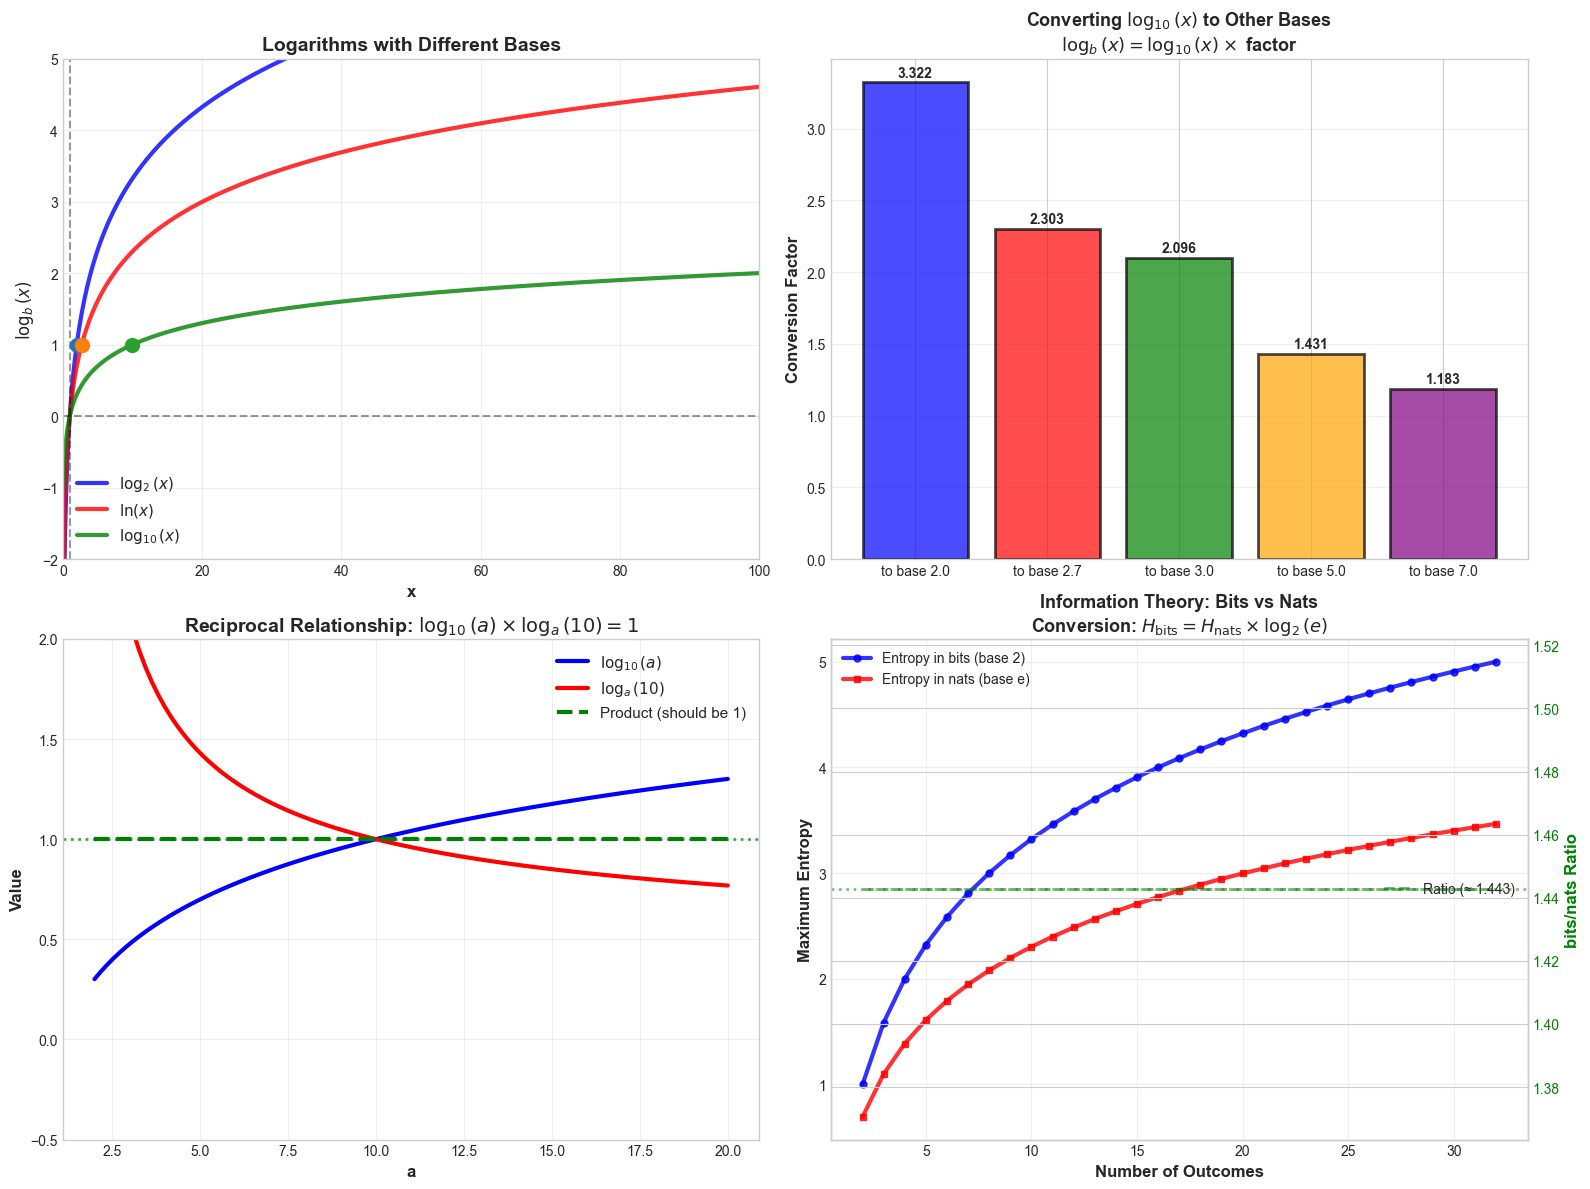

In [14]:
# Change of Base Formula - Part 3: Base Comparison Visualization

# Define custom function for any base
def log_base(x, base):
    """Compute log_base(x) using change of base formula"""
    return np.log(x) / np.log(base)

# Visualization 1: Comparing Different Bases
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

x_range = np.linspace(0.1, 100, 500)

# Plot 1: Multiple bases on same graph
ax1 = axes[0, 0]
bases = [2, np.e, 10]
colors = ['blue', 'red', 'green']
labels = ['$\\log_2(x)$', '$\\ln(x)$', '$\\log_{10}(x)$']

for base, color, label in zip(bases, colors, labels):
    y_values = log_base(x_range, base)
    ax1.plot(x_range, y_values, color=color, linewidth=3, label=label, alpha=0.8)

ax1.axhline(y=0, color='k', linestyle='--', alpha=0.4)
ax1.axvline(x=1, color='k', linestyle='--', alpha=0.4)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('$\\log_b(x)$', fontsize=12, fontweight='bold')
ax1.set_title('Logarithms with Different Bases', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(0, 100)
ax1.set_ylim(-2, 5)

# Mark specific points
for base in bases:
    ax1.plot(base, 1, 'o', markersize=10, zorder=5)

# Plot 2: Conversion factors
ax2 = axes[0, 1]
base_from = 10
bases_to = np.array([2, np.e, 3, 5, 7])
conversion_factors = np.log(base_from) / np.log(bases_to)

bars = ax2.bar(range(len(bases_to)), conversion_factors, 
              color=['blue', 'red', 'green', 'orange', 'purple'],
              alpha=0.7, edgecolor='black', linewidth=2)

ax2.set_xticks(range(len(bases_to)))
ax2.set_xticklabels([f'to base {b:.1f}' for b in bases_to])
ax2.set_ylabel('Conversion Factor', fontsize=12, fontweight='bold')
ax2.set_title(f'Converting $\\log_{{{base_from}}}(x)$ to Other Bases\n'
             f'$\\log_b(x) = \\log_{{{base_from}}}(x) \\times$ factor',
             fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for i, (bar, factor) in enumerate(zip(bars, conversion_factors)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{factor:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Reciprocal relationship visualization
ax3 = axes[1, 0]
a_vals = np.linspace(2, 20, 100)
b_val = 10

log_b_a = log_base(a_vals, b_val)
log_a_b = log_base(b_val, a_vals)
product = log_b_a * log_a_b

ax3.plot(a_vals, log_b_a, 'b-', linewidth=3, label=f'$\\log_{{{b_val}}}(a)$')
ax3.plot(a_vals, log_a_b, 'r-', linewidth=3, label=f'$\\log_a({b_val})$')
ax3.plot(a_vals, product, 'g--', linewidth=3, label='Product (should be 1)')

ax3.axhline(y=1, color='green', linestyle=':', linewidth=2, alpha=0.7)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('a', fontsize=12, fontweight='bold')
ax3.set_ylabel('Value', fontsize=12, fontweight='bold')
ax3.set_title(f'Reciprocal Relationship: $\\log_{{{b_val}}}(a) \\times \\log_a({b_val}) = 1$',
             fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.set_ylim(-0.5, 2)

# Plot 4: Information theory - bits vs nats
ax4 = axes[1, 1]

# Generate probability distributions
n_outcomes = np.arange(2, 33)
max_entropy_bits = np.log2(n_outcomes)  # bits
max_entropy_nats = np.log(n_outcomes)    # nats

ax4.plot(n_outcomes, max_entropy_bits, 'b-', linewidth=3, marker='o', 
        markersize=5, label='Entropy in bits (base 2)', alpha=0.8)
ax4.plot(n_outcomes, max_entropy_nats, 'r-', linewidth=3, marker='s',
        markersize=5, label='Entropy in nats (base e)', alpha=0.8)

# Conversion line
conversion = max_entropy_bits / max_entropy_nats
ax4_twin = ax4.twinx()
ax4_twin.plot(n_outcomes, conversion, 'g--', linewidth=2, alpha=0.6,
             label=f'Ratio (≈ {np.log2(np.e):.3f})')
ax4_twin.axhline(y=np.log2(np.e), color='green', linestyle=':', linewidth=2, alpha=0.5)
ax4_twin.set_ylabel('bits/nats Ratio', fontsize=12, fontweight='bold', color='green')
ax4_twin.tick_params(axis='y', labelcolor='green')

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Number of Outcomes', fontsize=12, fontweight='bold')
ax4.set_ylabel('Maximum Entropy', fontsize=12, fontweight='bold')
ax4.set_title('Information Theory: Bits vs Nats\n'
             'Conversion: $H_{\\text{bits}} = H_{\\text{nats}} \\times \\log_2(e)$',
             fontsize=13, fontweight='bold')
ax4.legend(loc='upper left', fontsize=10)
ax4_twin.legend(loc='center right', fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
## Summary and Key Takeaways

### Core Concepts Mastered This Week

**1. Logarithm Properties and Laws**
- Definition: $\log_b(x) = y \Leftrightarrow b^y = x$
- Fundamental laws: Product, Quotient, Power rules
- Special values: $\log_b(1) = 0$, $\log_b(b) = 1$, $\log_b(b^x) = x$
- Inverse relationship: $b^{\log_b(x)} = x$

**2. Change of Base Formula**
- Formula: $\log_b(x) = \frac{\log_a(x)}{\log_a(b)}$
- Reciprocal relationship: $\log_a(b) \cdot \log_b(a) = 1$
- Chain rule: $\log_a(b) \cdot \log_b(c) = \log_a(c)$

**3. Solving Exponential Equations**
- Basic strategy: Isolate, take logarithm, apply properties
- 7 equation types: Basic, same base, products, different bases, quadratic-type, logarithmic, multiple logarithms
- Domain checking is critical for logarithmic equations

**4. Data Transformation Applications**
- Log transformation: Normalizes skewed data, stabilizes variance
- Box-Cox transformation: Generalizes log transform with parameter $\lambda$
- Financial applications: Log returns are additive
- Linearizing relationships: Exponential → linear on log scale

**5. Log Scales in Visualization**
- Semi-log: Linearizes exponential relationships
- Log-log: Linearizes power laws, reveals slope = exponent
- Applications: Exponential growth, power laws, wide-range data, ML learning curves

---

### Essential Formulas Reference

| Concept | Formula | Application |
|---------|---------|-------------|
| **Logarithm Definition** | $\log_b(x) = y \Leftrightarrow b^y = x$ | Converting between forms |
| **Product Rule** | $\log_b(xy) = \log_b(x) + \log_b(y)$ | Simplifying products |
| **Quotient Rule** | $\log_b(x/y) = \log_b(x) - \log_b(y)$ | Simplifying quotients |
| **Power Rule** | $\log_b(x^r) = r\log_b(x)$ | Bringing down exponents |
| **Change of Base** | $\log_b(x) = \frac{\ln(x)}{\ln(b)}$ | Calculator-friendly form |
| **Reciprocal Relationship** | $\log_a(b) \cdot \log_b(a) = 1$ | Base reciprocals |
| **Inverse Property** | $b^{\log_b(x)} = x$ | Cancellation |
| **Log of Exponential** | $\log_b(b^x) = x$ | Cancellation |
| **Continuous Compounding** | $A = Pe^{rt}$ | Finance calculations |
| **Doubling Time** | $t = \frac{\ln(2)}{r}$ | Growth rate applications |
| **Log Transformation** | $y' = \ln(y)$ | Normalizing skewed data |
| **Box-Cox Transform** | $y' = \frac{y^\lambda - 1}{\lambda}$ ($\lambda \neq 0$) | Generalizing log transform |
| **Information Entropy** | $H = -\sum p_i \log_2(p_i)$ | Information theory |

---

### Data Science Applications Summary

| Application Area | Key Concept | Use Case |
|------------------|-------------|----------|
| **Information Theory** | Entropy, bits vs. nats | Measuring information content |
| **Machine Learning** | Log-loss, log-likelihood | Classification metrics, MLE |
| **Finance** | Log returns, continuous compounding | Portfolio analysis, growth modeling |
| **Statistics** | Log transformation, Box-Cox | Normalizing distributions, stabilizing variance |
| **Algorithm Analysis** | Logarithmic complexity | Understanding O(log n) efficiency |
| **Visualization** | Semi-log, log-log plots | Revealing exponential growth, power laws |
| **Audio Engineering** | Decibels | Sound intensity measurement |
| **Chemistry** | pH scale | Acidity measurement |
| **Biology** | Bacterial growth modeling | Population dynamics |
| **Linguistics** | Zipf's law | Word frequency analysis |

---

### Common Pitfalls and How to Avoid Them

⚠️ **Logarithm of Sum/Difference**
- **WRONG**: $\log(x + y) = \log(x) + \log(y)$
- **CORRECT**: No simplification exists for $\log(x + y)$

⚠️ **Domain Restrictions**
- Logarithms only defined for **positive** arguments: $x > 0$
- Always check solutions to logarithmic equations

⚠️ **Extraneous Solutions**
- When solving equations with logarithms, verify solutions satisfy domain constraints
- Example: $\ln(x) + \ln(x-3) = \ln(10)$ has solution $x=5$, not $x=-2$

⚠️ **Change of Base Direction**
- $\log_b(a) = \frac{1}{\log_a(b)}$ (reciprocal relationship)
- Don't confuse with $\log_b(a) = \log_a(b)$ (generally false!)

⚠️ **Log Scale Interpretation**
- On log scale, **constant differences** represent **constant ratios**
- Example: Distance from 10 to 100 equals distance from 100 to 1000

⚠️ **Log Transformation Bias**
- Mean of logs ≠ log of mean
- When back-transforming, apply bias correction if needed

---

### Self-Assessment Checklist

**Understanding Check** - Can you:
- [ ] Explain what a logarithm represents geometrically?
- [ ] State and prove the three fundamental logarithm laws?
- [ ] Convert between logarithms of different bases?
- [ ] Identify when to use logarithms to solve exponential equations?
- [ ] Explain why log transformation normalizes skewed data?

**Computational Skills** - Can you:
- [ ] Simplify complex logarithmic expressions using properties?
- [ ] Solve equations of type $b^x = c$ for any base?
- [ ] Solve quadratic-type exponential equations by substitution?
- [ ] Check domain constraints when solving logarithmic equations?
- [ ] Calculate doubling time for exponential growth?
- [ ] Apply Box-Cox transformation and interpret the parameter?

**Application Skills** - Can you:
- [ ] Calculate information entropy for a probability distribution?
- [ ] Convert between bits and nats in information theory?
- [ ] Compute financial log returns and interpret them?
- [ ] Transform skewed data and verify normality improvement?
- [ ] Choose appropriate visualization scale (linear vs. log)?
- [ ] Interpret slope on semi-log and log-log plots?

**Critical Thinking** - Can you:
- [ ] Explain why exponentials appear linear on semi-log plots?
- [ ] Explain why power laws appear linear on log-log plots?
- [ ] Compare mean vs. median sensitivity to log transformation?
- [ ] Identify when log transformation is appropriate vs. inappropriate?
- [ ] Recognize logarithmic complexity O(log n) in algorithms?

**Advanced Understanding** - Can you:
- [ ] Derive the change of base formula from first principles?
- [ ] Prove the reciprocal relationship between logs?
- [ ] Explain the connection between log-likelihood and MLE?
- [ ] Calculate decibel levels and understand the scale?
- [ ] Apply log scales appropriately in data visualization?

---

### Quick Review Problems

**Problem 1**: Simplify $\log_3(27) + \log_3(9) - \log_3(81)$
<details>
<summary>Answer</summary>
$3 + 2 - 4 = 1$
</details>

**Problem 2**: Solve $2^{x-1} = 16$
<details>
<summary>Answer</summary>
$x = 5$ (since $16 = 2^4$, so $x - 1 = 4$)
</details>

**Problem 3**: If data spans from 0.001 to 1000, which scale is most appropriate?
<details>
<summary>Answer</summary>
Log scale (data spans 6 orders of magnitude)
</details>

**Problem 4**: What does a slope of 2 mean on a log-log plot of $y$ vs. $x$?
<details>
<summary>Answer</summary>
Power law relationship: $y \propto x^2$
</details>

**Problem 5**: Calculate doubling time for 5% continuous growth rate.
<details>
<summary>Answer</summary>
$t = \ln(2) / 0.05 \approx 13.86$ years
</details>

---

### Connections and Looking Ahead

**Backward Connections**:
- **Week 5 (Exponentials)**: Logarithms are inverse functions of exponentials
- **Week 4 (Algebra)**: Polynomial techniques used in solving logarithmic equations
- **Week 3 (Quadratic Functions)**: Quadratic-type exponential equations

**Forward Connections**:
- **Week 7**: Trigonometric functions (another important function family)
- **Week 8**: Limits and continuity (behavior of log functions near boundaries)
- **Statistics I**: Log-normal distributions, log transformations in regression
- **Machine Learning**: Log-loss functions, logistic regression
- **Calculus**: Derivatives and integrals of logarithmic functions

---

### Study Resources and Practice

**Interactive Tools**:
- [Desmos Graphing Calculator](https://www.desmos.com/calculator) - Visualize log functions
- [GeoGebra](https://www.geogebra.org/) - Explore log transformations
- [WolframAlpha](https://www.wolframalpha.com/) - Verify calculations

**Practice Platforms**:
- Khan Academy: Logarithms and exponential equations
- Brilliant.org: Interactive logarithm problems
- Paul's Online Math Notes: Logarithm properties and applications

**Data Science Applications**:
- [Kaggle](https://www.kaggle.com/) - Find datasets with skewed distributions for transformation practice
- [Towards Data Science](https://towardsdatascience.com/) - Articles on log transformations in ML

---

### Final Thoughts

Logarithms are **fundamental tools** in data science, appearing in:
- **Information theory** (entropy, mutual information)
- **Machine learning** (log-loss, logistic regression, naive Bayes)
- **Statistics** (log-normal distributions, log transformations)
- **Visualization** (revealing patterns in exponential/power-law data)
- **Algorithm analysis** (understanding logarithmic complexity)

**Key Insight**: Logarithms convert **multiplication to addition** and **powers to multiplication**, making complex relationships more manageable.

**Practical Wisdom**: When data spans multiple orders of magnitude or shows exponential/power-law behavior, think logarithms!

---

### Next Steps

1. **Review** this notebook, ensuring you can explain each concept
2. **Practice** the problems at the end - aim for fluency
3. **Apply** log transformations to real datasets (try Kaggle competitions)
4. **Explore** log scales in data visualization with your own data
5. **Prepare** for Week 7: Trigonometric functions and their applications

**Remember**: Mastery comes from practice and application. Use these tools in your data science projects!

---

**🎓 Congratulations on completing Week 6! You now have powerful logarithmic tools in your data science toolkit.**


2. RECIPROCAL RELATIONSHIP: log_b(a) × log_a(b) = 1
--------------------------------------------------

      a |    b |     log_b(a) |     log_a(b) |      Product
   -------------------------------------------------------
      2 |    8 |     0.333333 |     3.000000 |     1.000000 ≈ 1
      3 |    9 |     0.500000 |     2.000000 |     1.000000 ≈ 1
      5 |   25 |     0.500000 |     2.000000 |     1.000000 ≈ 1
      7 |   49 |     0.500000 |     2.000000 |     1.000000 ≈ 1

3. CHAIN RULE: log_a(b) × log_b(c) = log_a(c)
--------------------------------------------------

     a |   b |    c |   log_a(b) |   log_b(c) |    Product |   log_a(c)
   ---------------------------------------------------------------------------
     2 |   4 |   16 |     2.0000 |     2.0000 |     4.0000 |     4.0000
     3 |   9 |   81 |     2.0000 |     2.0000 |     4.0000 |     4.0000
     2 |   8 |   64 |     3.0000 |     2.0000 |     6.0000 |     6.0000


In [16]:
# Logarithm Properties - Part 1: Basic Laws Verification

print("=" * 70)
print("LOGARITHM PROPERTIES - DEMONSTRATIONS")
print("=" * 70)

# 1. Verify Logarithm Laws
print("\n1. LOGARITHM LAWS VERIFICATION")
print("-" * 50)

# Test values
x_test, y_test = 15, 6
base = np.e  # Natural logarithm

print(f"\n   Test values: x = {x_test}, y = {y_test}")
print(f"   Using natural logarithm (base e)")

# Product Rule: log(xy) = log(x) + log(y)
product = x_test * y_test
log_product = np.log(product)
log_sum = np.log(x_test) + np.log(y_test)

print(f"\n   ✓ Product Rule: ln(xy) = ln(x) + ln(y)")
print(f"     ln({x_test} × {y_test}) = ln({product}) = {log_product:.6f}")
print(f"     ln({x_test}) + ln({y_test}) = {np.log(x_test):.6f} + {np.log(y_test):.6f} = {log_sum:.6f}")
print(f"     Difference: {abs(log_product - log_sum):.10f} (essentially 0)")

# Quotient Rule: log(x/y) = log(x) - log(y)
quotient = x_test / y_test
log_quotient = np.log(quotient)
log_diff = np.log(x_test) - np.log(y_test)

print(f"\n   ✓ Quotient Rule: ln(x/y) = ln(x) - ln(y)")
print(f"     ln({x_test}/{y_test}) = ln({quotient:.4f}) = {log_quotient:.6f}")
print(f"     ln({x_test}) - ln({y_test}) = {np.log(x_test):.6f} - {np.log(y_test):.6f} = {log_diff:.6f}")
print(f"     Difference: {abs(log_quotient - log_diff):.10f}")

# Power Rule: log(x^n) = n*log(x)
power = 3
x_power = x_test ** power
log_power = np.log(x_power)
power_log = power * np.log(x_test)

print(f"\n   ✓ Power Rule: ln(x^n) = n·ln(x)")
print(f"     ln({x_test}^{power}) = ln({x_power}) = {log_power:.6f}")
print(f"     {power}·ln({x_test}) = {power} × {np.log(x_test):.6f} = {power_log:.6f}")
print(f"     Difference: {abs(log_power - power_log):.10f}")

CHANGE OF BASE FORMULA - DEMONSTRATIONS

1. COMPUTING LOGARITHMS WITH DIFFERENT BASES
--------------------------------------------------

   Expression      |        Using ln |     Using log₁₀ |    Verification
   ----------------------------------------------------------------------
   log₂(8)         |        3.000000 |        3.000000 |          8.0000 ≈ 8
   log₂(10)        |        3.321928 |        3.321928 |         10.0000 ≈ 10
   log₃(27)        |        3.000000 |        3.000000 |         27.0000 ≈ 27
   log₅(100)       |        2.861353 |        2.861353 |        100.0000 ≈ 100
   log₁₀(1000)     |        3.000000 |        3.000000 |       1000.0000 ≈ 1000
   log₇(50)        |        2.010382 |        2.010382 |         50.0000 ≈ 50


# Logarithm Properties - Part 2: Special Values

# Special Values
print("\n2. SPECIAL VALUES")
print("-" * 50)

special_cases = [
    ("ln(1)", np.log(1), 0, "Because e^0 = 1"),
    ("ln(e)", np.log(np.e), 1, "Because e^1 = e"),
    ("ln(e²)", np.log(np.e**2), 2, "Because e^2 = e²"),
    ("ln(1/e)", np.log(1/np.e), -1, "Because e^(-1) = 1/e"),
    ("ln(√e)", np.log(np.sqrt(np.e)), 0.5, "Because e^(0.5) = √e"),
]

for expr, value, expected, reason in special_cases:
    print(f"\n   {expr:12s} = {value:8.6f} (expected: {expected:5.1f})")
    print(f"   {' ':12s}   {reason}")

In [17]:
# Logarithm Properties - Part 3: Inverse Relationship

# 3. Inverse Relationship
print("\n3. INVERSE RELATIONSHIP")
print("-" * 50)

test_values = [0.5, 1, 2, 5, 10]
print(f"\n   Verifying: ln(e^x) = x and e^(ln(x)) = x")
print(f"\n   {'x':>6s} | {'e^x':>12s} | {'ln(e^x)':>12s} | {'ln(x)':>12s} | {'e^(ln(x))':>12s}")
print("   " + "-" * 65)

for val in test_values:
    exp_val = np.exp(val)
    ln_exp = np.log(exp_val)
    ln_val = np.log(val)
    exp_ln = np.exp(ln_val)
    
    print(f"   {val:6.2f} | {exp_val:12.4f} | {ln_exp:12.4f} | {ln_val:12.4f} | {exp_ln:12.4f}")


8. APPLICATION: COMPOUND INTEREST - FINDING TIME
--------------------------------------------------

   Principal: $10,000
   Target amount: $25,000
   Interest rate: 6.0% (continuous compounding)

   Solve: 25000 = 10000·e^(0.06t)
   2.5 = e^(0.06t)
   ln(2.5) = 0.06t
   t = ln(2.5) / 0.06

   Time required: 15.27 years
   Verification: $10,000 × e^(0.06×15.27) = $25,000.00 ✓

🎯 Key Insights:
   • Basic: b^x = c → x = ln(c)/ln(b)
   • Same base: b^f(x) = b^g(x) → f(x) = g(x)
   • Quadratic-type: substitute u = b^x, solve, back-substitute
   • Always check domain for logarithm equations
   • Graphical solutions verify algebraic work


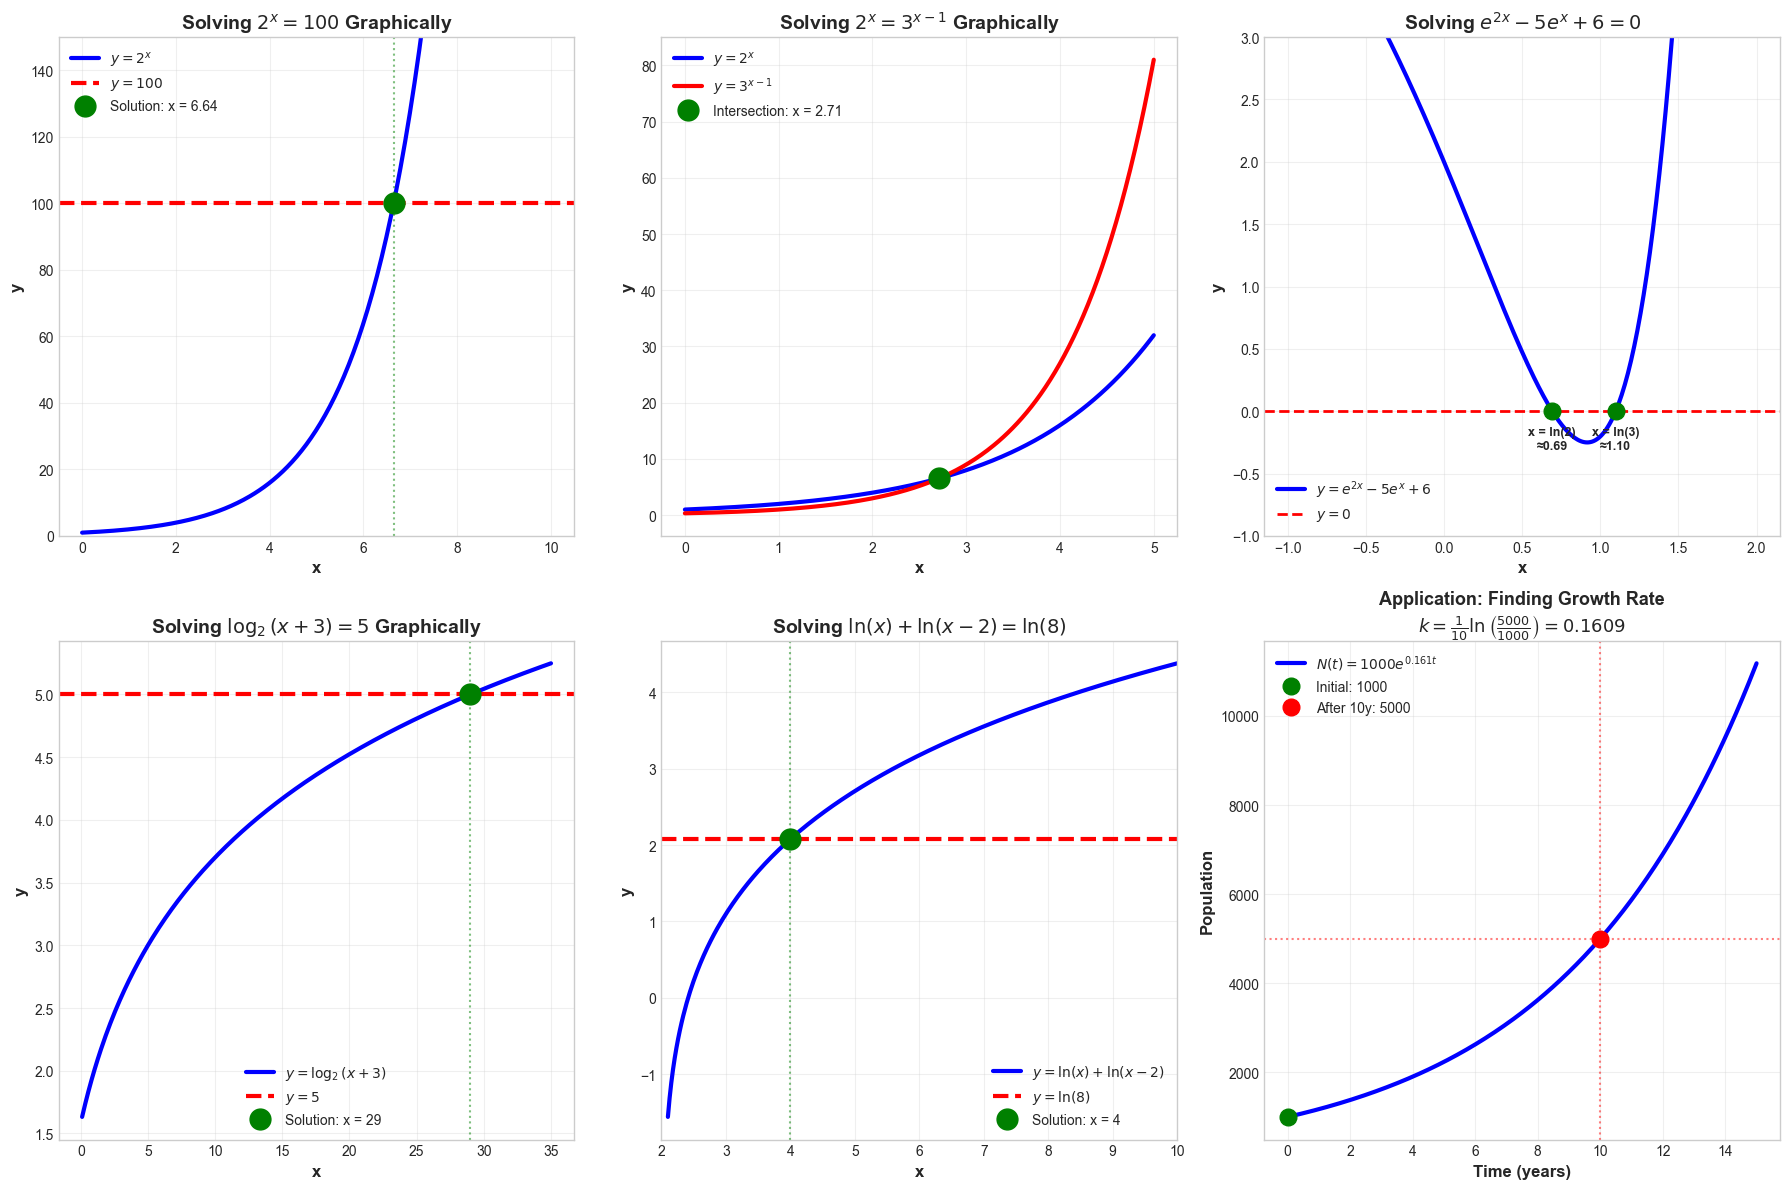

In [18]:
# Logarithm Properties - Part 4: Visualization (Plots 1-6)

# Visualization 1: Logarithm Functions with Different Bases
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

x_positive = np.linspace(0.01, 10, 500)

# Plot 1: Natural logarithm
ax1 = axes[0, 0]
ax1.plot(x_positive, np.log(x_positive), 'b-', linewidth=3, label='$\\ln(x)$')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='y = 0')
ax1.axvline(x=1, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='x = 1')
ax1.plot(1, 0, 'ro', markersize=12, zorder=5)
ax1.plot(np.e, 1, 'go', markersize=12, zorder=5, label=f'(e, 1)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('$\\ln(x)$', fontsize=12, fontweight='bold')
ax1.set_title('Natural Logarithm: $\\ln(x)$', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(-4, 4)

# Plot 2: Different bases comparison
ax2 = axes[0, 1]
ax2.plot(x_positive, np.log2(x_positive), 'r-', linewidth=2.5, label='$\\log_2(x)$')
ax2.plot(x_positive, np.log(x_positive), 'b-', linewidth=2.5, label='$\\ln(x)$ (base e)')
ax2.plot(x_positive, np.log10(x_positive), 'g-', linewidth=2.5, label='$\\log_{10}(x)$')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.4)
ax2.axvline(x=1, color='k', linestyle='--', alpha=0.4)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Logarithms with Different Bases', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(-3, 3)

# Plot 3: Product rule visualization
ax3 = axes[0, 2]
a_val, b_val = 2, 3
product_val = a_val * b_val

bars = ax3.bar(['ln(a)', 'ln(b)', 'ln(a) + ln(b)', 'ln(ab)'],
               [np.log(a_val), np.log(b_val), np.log(a_val) + np.log(b_val), np.log(product_val)],
               color=['blue', 'red', 'purple', 'green'], alpha=0.7, edgecolor='black', linewidth=2)

ax3.set_ylabel('Value', fontsize=12, fontweight='bold')
ax3.set_title(f'Product Rule: ln({a_val}) + ln({b_val}) = ln({a_val}×{b_val})', 
             fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Power rule visualization
ax4 = axes[1, 0]
x_val = 2
powers = np.array([1, 2, 3, 4, 5])
log_powers = np.log(x_val ** powers)
n_times_log = powers * np.log(x_val)

width = 0.35
x_pos = np.arange(len(powers))

ax4.bar(x_pos - width/2, log_powers, width, label=f'$\\ln({x_val}^n)$', 
       color='blue', alpha=0.7, edgecolor='black', linewidth=2)
ax4.bar(x_pos + width/2, n_times_log, width, label=f'$n \\cdot \\ln({x_val})$',
       color='red', alpha=0.7, edgecolor='black', linewidth=2)

ax4.set_xlabel('n (power)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Value', fontsize=12, fontweight='bold')
ax4.set_title(f'Power Rule: $\\ln({x_val}^n) = n \\cdot \\ln({x_val})$', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(powers)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# Plot 5: Log transforms different distributions
ax5 = axes[1, 1]
x_range = np.linspace(0.1, 100, 1000)
y_linear = x_range
y_quadratic = x_range ** 2
y_exponential = np.exp(x_range / 20)

ax5.plot(x_range, y_linear, 'b-', linewidth=2, label='Linear: $y = x$', alpha=0.7)
ax5.plot(x_range, y_quadratic, 'r-', linewidth=2, label='Quadratic: $y = x^2$', alpha=0.7)
ax5.plot(x_range[:300], y_exponential[:300], 'g-', linewidth=2, 
        label='Exponential: $y = e^{x/20}$', alpha=0.7)

ax5.set_yscale('log')
ax5.grid(True, alpha=0.3, which='both')
ax5.set_xlabel('x', fontsize=12, fontweight='bold')
ax5.set_ylabel('y (log scale)', fontsize=12, fontweight='bold')
ax5.set_title('Functions on Log Scale', fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)

# Plot 6: Derivative demonstration
ax6 = axes[1, 2]
x_deriv = np.linspace(0.1, 5, 300)
y_ln = np.log(x_deriv)
y_derivative = 1 / x_deriv

ax6_twin = ax6.twinx()

ax6.plot(x_deriv, y_ln, 'b-', linewidth=3, label='$f(x) = \\ln(x)$')
ax6_twin.plot(x_deriv, y_derivative, 'r--', linewidth=3, label="$f'(x) = 1/x$")

ax6.set_xlabel('x', fontsize=12, fontweight='bold')
ax6.set_ylabel('$\\ln(x)$', fontsize=12, fontweight='bold', color='blue')
ax6_twin.set_ylabel("$f'(x)$", fontsize=12, fontweight='bold', color='red')
ax6.tick_params(axis='y', labelcolor='blue')
ax6_twin.tick_params(axis='y', labelcolor='red')
ax6.set_title('Logarithm and Its Derivative', fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.legend(loc='upper left', fontsize=10)
ax6_twin.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
# Logarithm Properties - Part 5: Information Theory Application

# 4. Information Theory Application: Entropy
print("\n4. APPLICATION: INFORMATION THEORY - ENTROPY")
print("-" * 50)

# Fair coin
p_fair = np.array([0.5, 0.5])
entropy_fair = -np.sum(p_fair * np.log2(p_fair))

print(f"\n   Fair coin (p = 0.5 for heads and tails):")
print(f"   H(X) = -[0.5·log₂(0.5) + 0.5·log₂(0.5)]")
print(f"   H(X) = {entropy_fair:.4f} bits")
print(f"   Interpretation: Maximum uncertainty (1 bit needed per outcome)")

# Biased coin
p_biased = np.array([0.9, 0.1])
entropy_biased = -np.sum(p_biased * np.log2(p_biased))

print(f"\n   Biased coin (p = 0.9 for heads, 0.1 for tails):")
print(f"   H(X) = -[0.9·log₂(0.9) + 0.1·log₂(0.1)]")
print(f"   H(X) = {entropy_biased:.4f} bits")
print(f"   Interpretation: Lower uncertainty (outcome more predictable)")


6. LOGARITHMIC EQUATIONS: log_2(x+3) = 5
--------------------------------------------------

   Convert to exponential form: x + 3 = 2^5
   x + 3 = 32
   x = 29

   Verification: log_2(29+3) = log_2(32) = 5.0 ✓
   Domain check: x + 3 = 32 > 0 ✓

7. MULTIPLE LOGARITHMS: ln(x) + ln(x-2) = ln(8)
--------------------------------------------------

   Use product rule: ln[x(x-2)] = ln(8)
   Therefore: x(x-2) = 8
   x² - 2x = 8
   x² - 2x - 8 = 0
   (x - 4)(x + 2) = 0
   x = 4 or x = -2

   Domain check:
   For x = 4:  x > 0 ✓ and x - 2 = 2 > 0 ✓  →  VALID
   For x = -2: x = -2 < 0 ✗  →  INVALID (ln(-2) undefined)

   Solution: x = 4
   Verification: ln(4) + ln(2) = 2.079442
                 ln(8) = 2.079442 ✓


In [20]:
# Logarithm Properties - Part 6: Entropy Visualization

# Visualization of entropy for different probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Binary entropy function
p_range = np.linspace(0.001, 0.999, 1000)
binary_entropy = -p_range * np.log2(p_range) - (1 - p_range) * np.log2(1 - p_range)

ax1.plot(p_range, binary_entropy, 'b-', linewidth=3)
ax1.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Maximum entropy')
ax1.axhline(y=1, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.plot(0.5, 1, 'ro', markersize=15, zorder=5)
ax1.plot(0.9, entropy_biased, 'go', markersize=12, zorder=5, label=f'p=0.9: H={entropy_biased:.3f}')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Probability (p)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Entropy (bits)', fontsize=12, fontweight='bold')
ax1.set_title('Binary Entropy Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1.1)

# Compare different distributions
distributions = {
    'Uniform (4 outcomes)': np.array([0.25, 0.25, 0.25, 0.25]),
    'Slightly skewed': np.array([0.4, 0.3, 0.2, 0.1]),
    'Very skewed': np.array([0.7, 0.2, 0.07, 0.03]),
    'Almost certain': np.array([0.94, 0.03, 0.02, 0.01])
}

entropies = []
names = []

for name, dist in distributions.items():
    entropy = -np.sum(dist * np.log2(dist + 1e-10))  # Add small value to avoid log(0)
    entropies.append(entropy)
    names.append(name)

ax2.bar(range(len(names)), entropies, color=['blue', 'green', 'orange', 'red'],
       alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels(names, rotation=15, ha='right')
ax2.set_ylabel('Entropy (bits)', fontsize=12, fontweight='bold')
ax2.set_title('Entropy for Different Distributions', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=2, color='red', linestyle='--', linewidth=2, alpha=0.5, 
           label='Max entropy (2 bits for 4 outcomes)')
ax2.legend(fontsize=10)

for i, (name, entropy) in enumerate(zip(names, entropies)):
    ax2.text(i, entropy + 0.05, f'{entropy:.3f}', ha='center', 
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • Log laws: product→sum, quotient→difference, power→multiplication")
print("   • ln(e^x) = x and e^(ln(x)) = x (inverse relationship)")
print("   • Domain: x > 0; Range: all real numbers")
print("   • Derivative: d/dx[ln(x)] = 1/x")
print("   • Entropy: measures uncertainty using logarithms")


4. DIFFERENT BASES: 2^x = 3^(x-1)
--------------------------------------------------

   Take ln of both sides: ln(2^x) = ln(3^(x-1))
   x·ln(2) = (x-1)·ln(3)
   x·ln(2) = x·ln(3) - ln(3)
   x[ln(2) - ln(3)] = -ln(3)
   x = ln(3) / [ln(3) - ln(2)]

   x = 2.709511
   Verification: 2^2.7095 = 6.541000
                 3^1.7095 = 6.541000 ✓

5. QUADRATIC-TYPE EXPONENTIAL: e^(2x) - 5e^x + 6 = 0
--------------------------------------------------

   Let u = e^x, then: u² - 5u + 6 = 0
   Factor: (u - 2)(u - 3) = 0
   u = 2 or u = 3

   Back-substitute:
   e^x = 2  →  x = ln(2)
   e^x = 3  →  x = ln(3)

   Solution 1: x = ln(2) = 0.693147
   Check: e^(2×0.6931) - 5e^0.6931 + 6 = 0.00000000 ≈ 0 ✓

   Solution 2: x = ln(3) = 1.098612
   Check: e^(2×1.0986) - 5e^1.0986 + 6 = 0.00000000 ≈ 0 ✓


In [21]:
# Change of Base Formula - Part 1: Computing Logarithms

print("=" * 70)
print("CHANGE OF BASE FORMULA - DEMONSTRATIONS")
print("=" * 70)

# 1. Computing Logarithms with Different Bases
print("\n1. COMPUTING LOGARITHMS WITH DIFFERENT BASES")
print("-" * 50)

# Define custom function for any base
def log_base(x, base):
    """Compute log_base(x) using change of base formula"""
    return np.log(x) / np.log(base)

# Test cases
test_cases = [
    (2, 8, "log₂(8)"),
    (2, 10, "log₂(10)"),
    (3, 27, "log₃(27)"),
    (5, 100, "log₅(100)"),
    (10, 1000, "log₁₀(1000)"),
    (7, 50, "log₇(50)"),
]

print(f"\n   {'Expression':15s} | {'Using ln':>15s} | {'Using log₁₀':>15s} | {'Verification':>15s}")
print("   " + "-" * 70)

for base, x, expr in test_cases:
    # Change of base using natural log
    result_ln = np.log(x) / np.log(base)
    
    # Change of base using common log
    result_log10 = np.log10(x) / np.log10(base)
    
    # Verify
    verification = base ** result_ln
    
    print(f"   {expr:15s} | {result_ln:15.6f} | {result_log10:15.6f} | {verification:15.4f} ≈ {x}")

SOLVING EXPONENTIAL EQUATIONS

1. BASIC EXPONENTIAL EQUATIONS: b^x = c
--------------------------------------------------

   Equation        |    Solution (x) |         Verification
   ------------------------------------------------------------
   2^x = 100       |        6.643856 | 2^6.6439 = 100.0000
   3^x = 50        |        3.560877 | 3^3.5609 = 50.0000
   5^x = 200       |        3.292030 | 5^3.2920 = 200.0000
   e^x = 20        |        2.995732 | 2.718281828459045^2.9957 = 20.0000

2. SAME BASE EQUATIONS: b^f(x) = b^g(x) → f(x) = g(x)
--------------------------------------------------

   Solve: 3^(2x+1) = 3^(x+4)
   Since bases equal, exponents equal: 2x + 1 = x + 4
   2x - x = 4 - 1
   x = 3

   Verification: 3^(2×3+1) = 3^7 = 2187
                 3^(3+4) = 3^7 = 2187 ✓

3. EXPONENTIAL PRODUCTS: a·b^x = c
--------------------------------------------------

   Solve: 5·2^x = 160
   Divide by 5: 2^x = 32
   2^x = 2^5
   x = 5

   Verification: 5·2^5 = 5·32 = 160 ✓


# Change of Base Formula - Part 2: Reciprocal & Chain Rule

# Define custom function for any base
def log_base(x, base):
    """Compute log_base(x) using change of base formula"""
    return np.log(x) / np.log(base)

# 2. Reciprocal Relationship
print("\n2. RECIPROCAL RELATIONSHIP: log_b(a) × log_a(b) = 1")
print("-" * 50)

pairs = [(2, 8), (3, 9), (5, 25), (7, 49)]

print(f"\n   {'a':>4s} | {'b':>4s} | {'log_b(a)':>12s} | {'log_a(b)':>12s} | {'Product':>12s}")
print("   " + "-" * 55)

for a, b in pairs:
    log_b_a = log_base(a, b)
    log_a_b = log_base(b, a)
    product = log_b_a * log_a_b
    
    print(f"   {a:4d} | {b:4d} | {log_b_a:12.6f} | {log_a_b:12.6f} | {product:12.6f} ≈ 1")

# 3. Chain Rule: log_a(b) × log_b(c) = log_a(c)
print("\n3. CHAIN RULE: log_a(b) × log_b(c) = log_a(c)")
print("-" * 50)

triplets = [(2, 4, 16), (3, 9, 81), (2, 8, 64)]

print(f"\n   {'a':>3s} | {'b':>3s} | {'c':>4s} | {'log_a(b)':>10s} | {'log_b(c)':>10s} | {'Product':>10s} | {'log_a(c)':>10s}")
print("   " + "-" * 75)

for a, b, c in triplets:
    log_a_b = log_base(b, a)
    log_b_c = log_base(c, b)
    product = log_a_b * log_b_c
    log_a_c = log_base(c, a)
    
    print(f"   {a:3d} | {b:3d} | {c:4d} | {log_a_b:10.4f} | {log_b_c:10.4f} | "
          f"{product:10.4f} | {log_a_c:10.4f}")

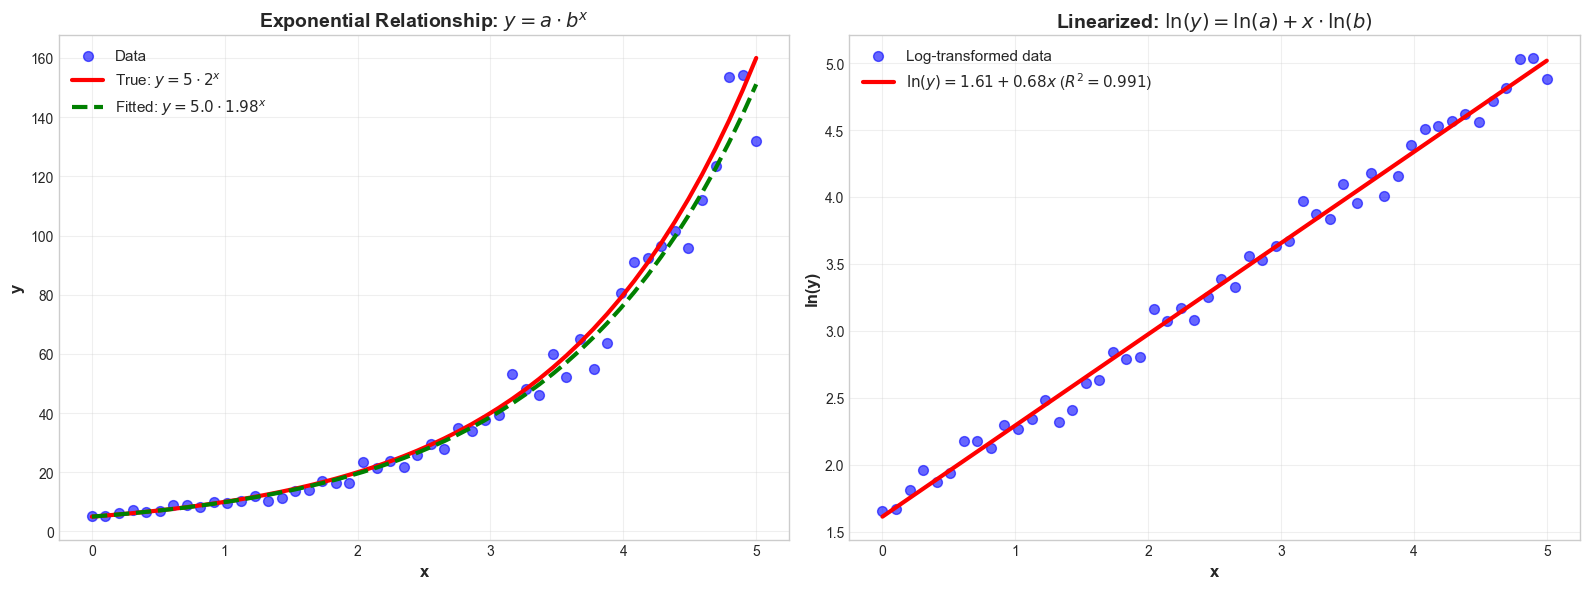


🎯 Key Insights:
   • Log transform: normalizes right-skewed data
   • Stabilizes variance when σ² ∝ μ
   • Log returns: additive and symmetric
   • Linearizes exponential relationships
   • Essential for feature engineering in ML


In [22]:
# Change of Base Formula - Part 3: Base Comparison Visualization

# Define custom function for any base
def log_base(x, base):
    """Compute log_base(x) using change of base formula"""
    return np.log(x) / np.log(base)

# Visualization 1: Comparing Different Bases
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

x_range = np.linspace(0.1, 100, 500)

# Plot 1: Multiple bases on same graph
ax1 = axes[0, 0]
bases = [2, np.e, 10]
colors = ['blue', 'red', 'green']
labels = ['$\\log_2(x)$', '$\\ln(x)$', '$\\log_{10}(x)$']

for base, color, label in zip(bases, colors, labels):
    y_values = log_base(x_range, base)
    ax1.plot(x_range, y_values, color=color, linewidth=3, label=label, alpha=0.8)

ax1.axhline(y=0, color='k', linestyle='--', alpha=0.4)
ax1.axvline(x=1, color='k', linestyle='--', alpha=0.4)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('$\\log_b(x)$', fontsize=12, fontweight='bold')
ax1.set_title('Logarithms with Different Bases', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(0, 100)
ax1.set_ylim(-2, 5)

# Mark specific points
for base in bases:
    ax1.plot(base, 1, 'o', markersize=10, zorder=5)

# Plot 2: Conversion factors
ax2 = axes[0, 1]
base_from = 10
bases_to = np.array([2, np.e, 3, 5, 7])
conversion_factors = np.log(base_from) / np.log(bases_to)

bars = ax2.bar(range(len(bases_to)), conversion_factors, 
              color=['blue', 'red', 'green', 'orange', 'purple'],
              alpha=0.7, edgecolor='black', linewidth=2)

ax2.set_xticks(range(len(bases_to)))
ax2.set_xticklabels([f'to base {b:.1f}' for b in bases_to])
ax2.set_ylabel('Conversion Factor', fontsize=12, fontweight='bold')
ax2.set_title(f'Converting $\\log_{{{base_from}}}(x)$ to Other Bases\n'
             f'$\\log_b(x) = \\log_{{{base_from}}}(x) \\times$ factor',
             fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for i, (bar, factor) in enumerate(zip(bars, conversion_factors)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{factor:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Reciprocal relationship visualization
ax3 = axes[1, 0]
a_vals = np.linspace(2, 20, 100)
b_val = 10

log_b_a = log_base(a_vals, b_val)
log_a_b = log_base(b_val, a_vals)
product = log_b_a * log_a_b

ax3.plot(a_vals, log_b_a, 'b-', linewidth=3, label=f'$\\log_{{{b_val}}}(a)$')
ax3.plot(a_vals, log_a_b, 'r-', linewidth=3, label=f'$\\log_a({b_val})$')
ax3.plot(a_vals, product, 'g--', linewidth=3, label='Product (should be 1)')

ax3.axhline(y=1, color='green', linestyle=':', linewidth=2, alpha=0.7)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('a', fontsize=12, fontweight='bold')
ax3.set_ylabel('Value', fontsize=12, fontweight='bold')
ax3.set_title(f'Reciprocal Relationship: $\\log_{{{b_val}}}(a) \\times \\log_a({b_val}) = 1$',
             fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.set_ylim(-0.5, 2)

# Plot 4: Information theory - bits vs nats
ax4 = axes[1, 1]

# Generate probability distributions
n_outcomes = np.arange(2, 33)
max_entropy_bits = np.log2(n_outcomes)  # bits
max_entropy_nats = np.log(n_outcomes)    # nats

ax4.plot(n_outcomes, max_entropy_bits, 'b-', linewidth=3, marker='o', 
        markersize=5, label='Entropy in bits (base 2)', alpha=0.8)
ax4.plot(n_outcomes, max_entropy_nats, 'r-', linewidth=3, marker='s',
        markersize=5, label='Entropy in nats (base e)', alpha=0.8)

# Conversion line
conversion = max_entropy_bits / max_entropy_nats
ax4_twin = ax4.twinx()
ax4_twin.plot(n_outcomes, conversion, 'g--', linewidth=2, alpha=0.6,
             label=f'Ratio (≈ {np.log2(np.e):.3f})')
ax4_twin.axhline(y=np.log2(np.e), color='green', linestyle=':', linewidth=2, alpha=0.5)
ax4_twin.set_ylabel('bits/nats Ratio', fontsize=12, fontweight='bold', color='green')
ax4_twin.tick_params(axis='y', labelcolor='green')

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Number of Outcomes', fontsize=12, fontweight='bold')
ax4.set_ylabel('Maximum Entropy', fontsize=12, fontweight='bold')
ax4.set_title('Information Theory: Bits vs Nats\n'
             'Conversion: $H_{\\text{bits}} = H_{\\text{nats}} \\times \\log_2(e)$',
             fontsize=13, fontweight='bold')
ax4.legend(loc='upper left', fontsize=10)
ax4_twin.legend(loc='center right', fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
# Change of Base Formula - Part 4: Decibel Scale Application

# 4. Practical Application: Decibel Scale
print("\n4. APPLICATION: DECIBEL SCALE (AUDIO/SIGNAL PROCESSING)")
print("-" * 50)

# Reference power
P0 = 1e-12  # watts (threshold of hearing)

# Different sound sources
sounds = {
    "Whisper": 1e-10,
    "Normal conversation": 1e-6,
    "Busy traffic": 1e-3,
    "Rock concert": 1,
    "Jet engine": 100
}

print(f"\n   {'Sound Source':25s} | {'Power (W)':>12s} | {'Decibels (dB)':>15s}")
print("   " + "-" * 60)

for source, power in sounds.items():
    # Decibel formula: dB = 10 * log₁₀(P/P₀)
    db = 10 * np.log10(power / P0)
    print(f"   {source:25s} | {power:12.2e} | {db:15.1f}")

# Convert to natural log
print("\n   Using natural log: dB = 10 × ln(P/P₀) / ln(10)")
ln_10 = np.log(10)
for source, power in list(sounds.items())[:2]:
    db_ln = 10 * np.log(power / P0) / ln_10
    db_log10 = 10 * np.log10(power / P0)
    print(f"   {source}: {db_ln:.2f} dB (ln) ≈ {db_log10:.2f} dB (log₁₀)")


3. LINEARIZING EXPONENTIAL RELATIONSHIPS
--------------------------------------------------

   Original relationship: y = a·b^x
   Log-transformed: ln(y) = ln(a) + x·ln(b)

   Linear regression on ln(y) vs x:
   ln(y) = 1.622 + 0.687·x
   R² = 0.9923

   Converting back to exponential:
   a = e^1.622 = 5.06 (true: 5)
   b = e^0.687 = 1.99 (true: 2)


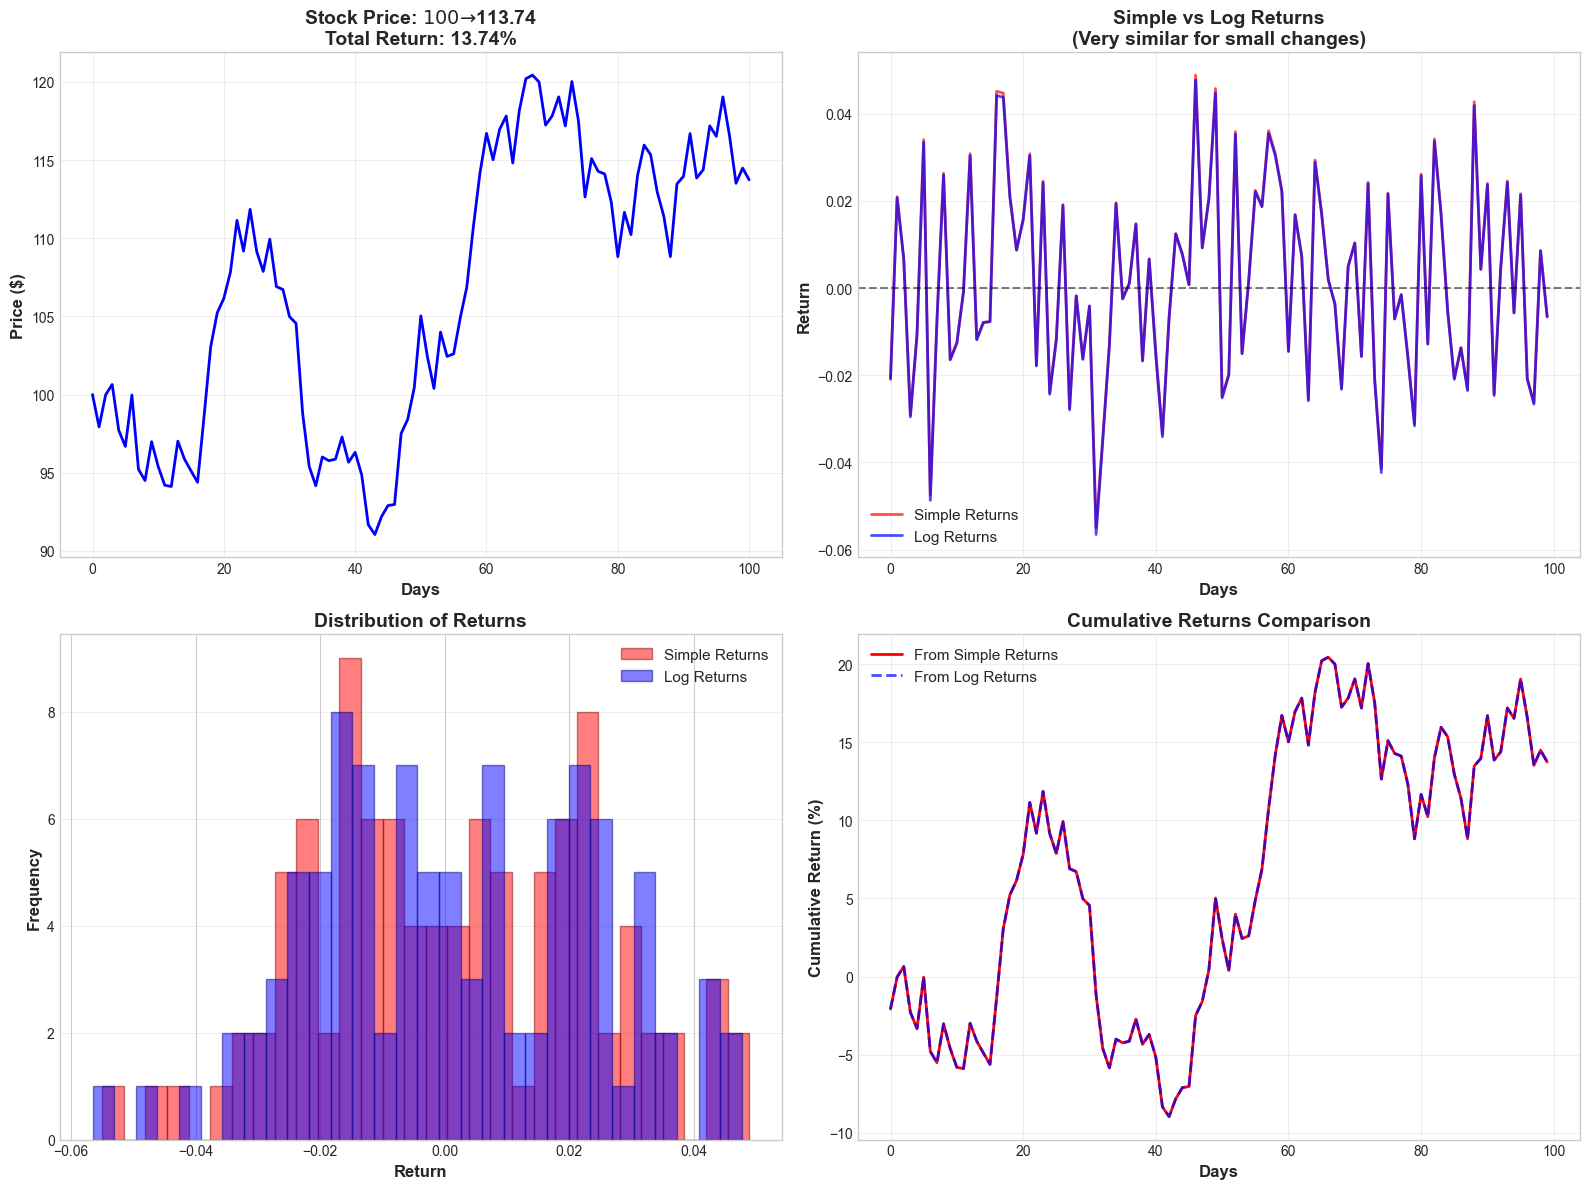

In [24]:
# Change of Base Formula - Part 5: Decibel Visualization

# Reference power
P0 = 1e-12  # watts (threshold of hearing)

# Different sound sources
sounds = {
    "Whisper": 1e-10,
    "Normal conversation": 1e-6,
    "Busy traffic": 1e-3,
    "Rock concert": 1,
    "Jet engine": 100
}

# Visualization of decibel scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Decibel scale
sources_list = list(sounds.keys())
powers_list = list(sounds.values())
dbs_list = [10 * np.log10(p / P0) for p in powers_list]

ax1.barh(range(len(sources_list)), dbs_list, color=['green', 'blue', 'orange', 'red', 'darkred'],
        alpha=0.7, edgecolor='black', linewidth=2)

ax1.set_yticks(range(len(sources_list)))
ax1.set_yticklabels(sources_list)
ax1.set_xlabel('Decibels (dB)', fontsize=12, fontweight='bold')
ax1.set_title('Sound Intensity Levels', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add safety threshold
ax1.axvline(x=85, color='orange', linestyle='--', linewidth=2, 
           label='Hearing damage risk (85 dB)', alpha=0.7)
ax1.axvline(x=120, color='red', linestyle='--', linewidth=2,
           label='Pain threshold (120 dB)', alpha=0.7)
ax1.legend(fontsize=10)

for i, db in enumerate(dbs_list):
    ax1.text(db + 2, i, f'{db:.0f} dB', va='center', fontsize=10, fontweight='bold')

# Plot 2: Power vs Decibels (log scale)
power_range = np.logspace(-12, 2, 300)
db_range = 10 * np.log10(power_range / P0)

ax2.semilogx(power_range, db_range, 'b-', linewidth=3)

# Mark sound sources
for source, power in sounds.items():
    db = 10 * np.log10(power / P0)
    ax2.plot(power, db, 'ro', markersize=10, zorder=5)
    ax2.text(power * 1.5, db, source, fontsize=9, va='center')

ax2.grid(True, alpha=0.3, which='both')
ax2.set_xlabel('Power (W, log scale)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Decibels (dB)', fontsize=12, fontweight='bold')
ax2.set_title('Decibel Scale: Logarithmic Power Relationship', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [25]:
# Change of Base Formula - Part 6: Algorithm Complexity

# 5. Algorithm Complexity Comparison
print("\n5. ALGORITHM COMPLEXITY: O(log n) in Different Bases")
print("-" * 50)

n_values = np.array([10, 100, 1000, 10000, 100000, 1000000])

print(f"\n   {'n':>10s} | {'log₂(n)':>12s} | {'ln(n)':>12s} | {'log₁₀(n)':>12s} | {'Ratio':>10s}")
print("   " + "-" * 65)

for n in n_values:
    log2_n = np.log2(n)
    ln_n = np.log(n)
    log10_n = np.log10(n)
    ratio = log2_n / ln_n  # Conversion factor
    
    print(f"   {n:10,} | {log2_n:12.2f} | {ln_n:12.2f} | {log10_n:12.2f} | {ratio:10.4f}")

print(f"\n   Note: Ratio ≈ {np.log2(np.e):.4f} = log₂(e) (constant)")
print("   Big-O absorbs constant factors: O(log₂ n) = O(ln n) = O(log₁₀ n)")

print("\n🎯 Key Insights:")
print("   • Change of base: log_b(x) = ln(x) / ln(b)")
print("   • Reciprocal: log_b(a) × log_a(b) = 1")
print("   • Chain rule: log_a(b) × log_b(c) = log_a(c)")
print("   • Different bases differ only by constant factor")
print("   • Applications: information theory, decibels, algorithm analysis")


2. FINANCIAL APPLICATION: LOG RETURNS
--------------------------------------------------

   Simple Returns:
   Mean: 0.0015
   Std Dev: 0.0226

   Log Returns:
   Mean: 0.0013
   Std Dev: 0.0225

   Additivity of Log Returns:
   Sum of daily log returns: 0.128716
   Direct log return (day 0 to 100): 0.128716
   Difference: 0.0000000000 ≈ 0 ✓


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/1525651911.py:102: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


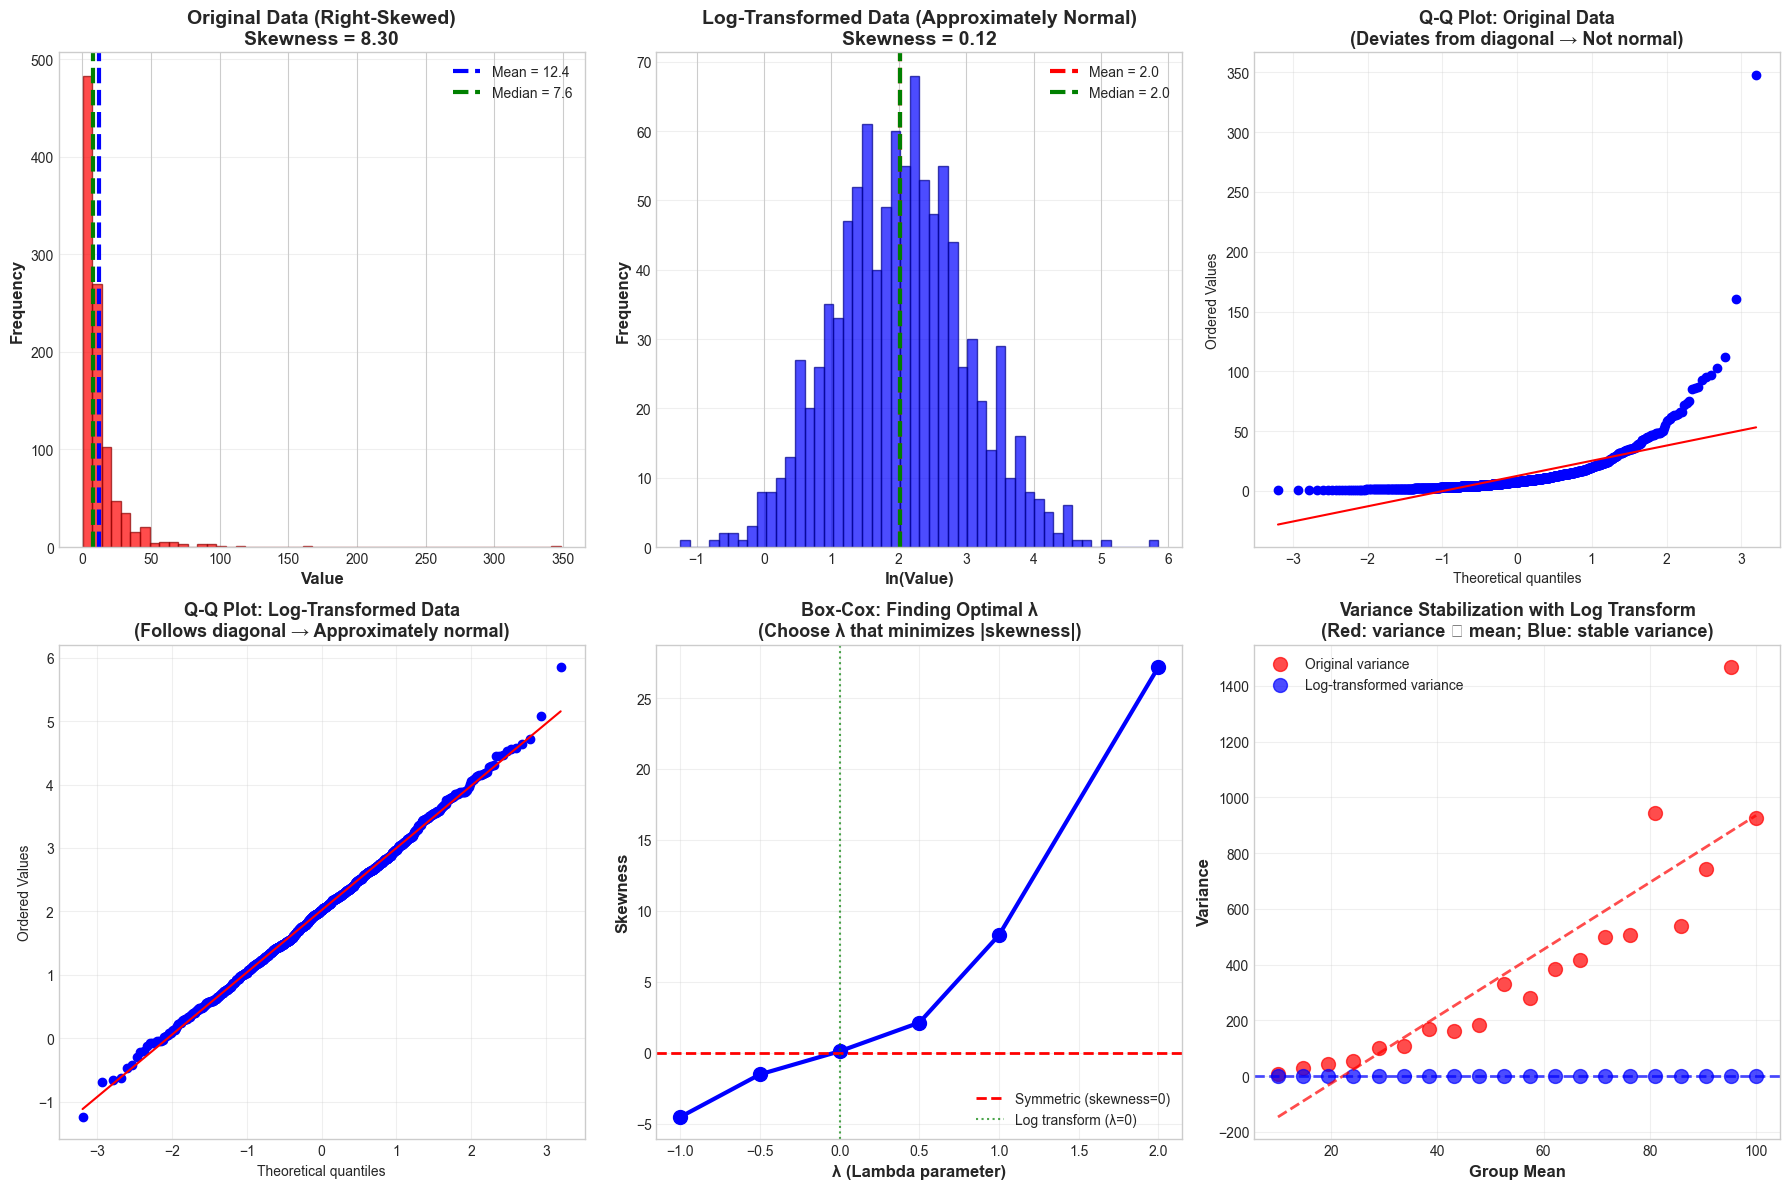

In [26]:
# Solving Exponential Equations - Part 1: Types 1-3

print("=" * 70)
print("SOLVING EXPONENTIAL EQUATIONS")
print("=" * 70)

# 1. Type 1: Basic Exponential Equations (b^x = c)
print("\n1. BASIC EXPONENTIAL EQUATIONS: b^x = c")
print("-" * 50)

equations_type1 = [
    (2, 100, "2^x = 100"),
    (3, 50, "3^x = 50"),
    (5, 200, "5^x = 200"),
    (np.e, 20, "e^x = 20"),
]

print(f"\n   {'Equation':15s} | {'Solution (x)':>15s} | {'Verification':>20s}")
print("   " + "-" * 60)

for base, target, expr in equations_type1:
    # Solve: x = ln(target) / ln(base)
    x_solution = np.log(target) / np.log(base)
    
    # Verify
    verification = base ** x_solution
    
    print(f"   {expr:15s} | {x_solution:15.6f} | {base}^{x_solution:.4f} = {verification:.4f}")

# 2. Type 2: Same Base (b^f(x) = b^g(x))
print("\n2. SAME BASE EQUATIONS: b^f(x) = b^g(x) → f(x) = g(x)")
print("-" * 50)

# Example: 3^(2x+1) = 3^(x+4)
print("\n   Solve: 3^(2x+1) = 3^(x+4)")
print("   Since bases equal, exponents equal: 2x + 1 = x + 4")
print("   2x - x = 4 - 1")
print("   x = 3")

x_sol = 3
lhs = 3 ** (2*x_sol + 1)
rhs = 3 ** (x_sol + 4)
print(f"\n   Verification: 3^(2×3+1) = 3^7 = {lhs}")
print(f"                 3^(3+4) = 3^7 = {rhs} ✓")

# 3. Type 3: Exponential Products (a·b^x = c)
print("\n3. EXPONENTIAL PRODUCTS: a·b^x = c")
print("-" * 50)

print("\n   Solve: 5·2^x = 160")
print("   Divide by 5: 2^x = 32")
print("   2^x = 2^5")
print("   x = 5")

x_sol = 5
verification = 5 * (2 ** x_sol)
print(f"\n   Verification: 5·2^5 = 5·32 = {verification} ✓")

In [27]:
# Solving Exponential Equations - Part 2: Types 4-5

# 4. Type 4: Different Bases (a^x = b^(x-1))
print("\n4. DIFFERENT BASES: 2^x = 3^(x-1)")
print("-" * 50)

print("\n   Take ln of both sides: ln(2^x) = ln(3^(x-1))")
print("   x·ln(2) = (x-1)·ln(3)")
print("   x·ln(2) = x·ln(3) - ln(3)")
print("   x[ln(2) - ln(3)] = -ln(3)")
print("   x = ln(3) / [ln(3) - ln(2)]")

x_sol = np.log(3) / (np.log(3) - np.log(2))
lhs = 2 ** x_sol
rhs = 3 ** (x_sol - 1)

print(f"\n   x = {x_sol:.6f}")
print(f"   Verification: 2^{x_sol:.4f} = {lhs:.6f}")
print(f"                 3^{x_sol-1:.4f} = {rhs:.6f} ✓")

# 5. Type 5: Quadratic-Type (e^(2x) - 5e^x + 6 = 0)
print("\n5. QUADRATIC-TYPE EXPONENTIAL: e^(2x) - 5e^x + 6 = 0")
print("-" * 50)

print("\n   Let u = e^x, then: u² - 5u + 6 = 0")
print("   Factor: (u - 2)(u - 3) = 0")
print("   u = 2 or u = 3")
print("\n   Back-substitute:")
print("   e^x = 2  →  x = ln(2)")
print("   e^x = 3  →  x = ln(3)")

x1 = np.log(2)
x2 = np.log(3)

print(f"\n   Solution 1: x = ln(2) = {x1:.6f}")
verification1 = np.exp(2*x1) - 5*np.exp(x1) + 6
print(f"   Check: e^(2×{x1:.4f}) - 5e^{x1:.4f} + 6 = {verification1:.8f} ≈ 0 ✓")

print(f"\n   Solution 2: x = ln(3) = {x2:.6f}")
verification2 = np.exp(2*x2) - 5*np.exp(x2) + 6
print(f"   Check: e^(2×{x2:.4f}) - 5e^{x2:.4f} + 6 = {verification2:.8f} ≈ 0 ✓")

APPLICATIONS IN DATA TRANSFORMATION

1. GENERATING SKEWED DATA
--------------------------------------------------

   Original Data Statistics:
   Mean: 12.43
   Median: 7.58
   Std Dev: 18.07
   Skewness: 8.30 (positive → right skewed)

   Log-Transformed Data Statistics:
   Mean: 2.02
   Median: 2.03
   Std Dev: 0.98
   Skewness: 0.12 (near 0 → symmetric)


# Solving Exponential Equations - Part 3: Types 6-7

# 6. Type 6: Logarithmic Equations (log_2(x+3) = 5)
print("\n6. LOGARITHMIC EQUATIONS: log_2(x+3) = 5")
print("-" * 50)

print("\n   Convert to exponential form: x + 3 = 2^5")
print("   x + 3 = 32")
print("   x = 29")

x_sol = 29
check = np.log2(x_sol + 3)
print(f"\n   Verification: log_2({x_sol}+3) = log_2(32) = {check:.1f} ✓")
print(f"   Domain check: x + 3 = {x_sol + 3} > 0 ✓")

# 7. Type 7: Multiple Logarithms (ln(x) + ln(x-2) = ln(8))
print("\n7. MULTIPLE LOGARITHMS: ln(x) + ln(x-2) = ln(8)")
print("-" * 50)

print("\n   Use product rule: ln[x(x-2)] = ln(8)")
print("   Therefore: x(x-2) = 8")
print("   x² - 2x = 8")
print("   x² - 2x - 8 = 0")
print("   (x - 4)(x + 2) = 0")
print("   x = 4 or x = -2")

print("\n   Domain check:")
print("   For x = 4:  x > 0 ✓ and x - 2 = 2 > 0 ✓  →  VALID")
print("   For x = -2: x = -2 < 0 ✗  →  INVALID (ln(-2) undefined)")

x_sol = 4
lhs = np.log(x_sol) + np.log(x_sol - 2)
rhs = np.log(8)
print(f"\n   Solution: x = {x_sol}")
print(f"   Verification: ln(4) + ln(2) = {lhs:.6f}")
print(f"                 ln(8) = {rhs:.6f} ✓")

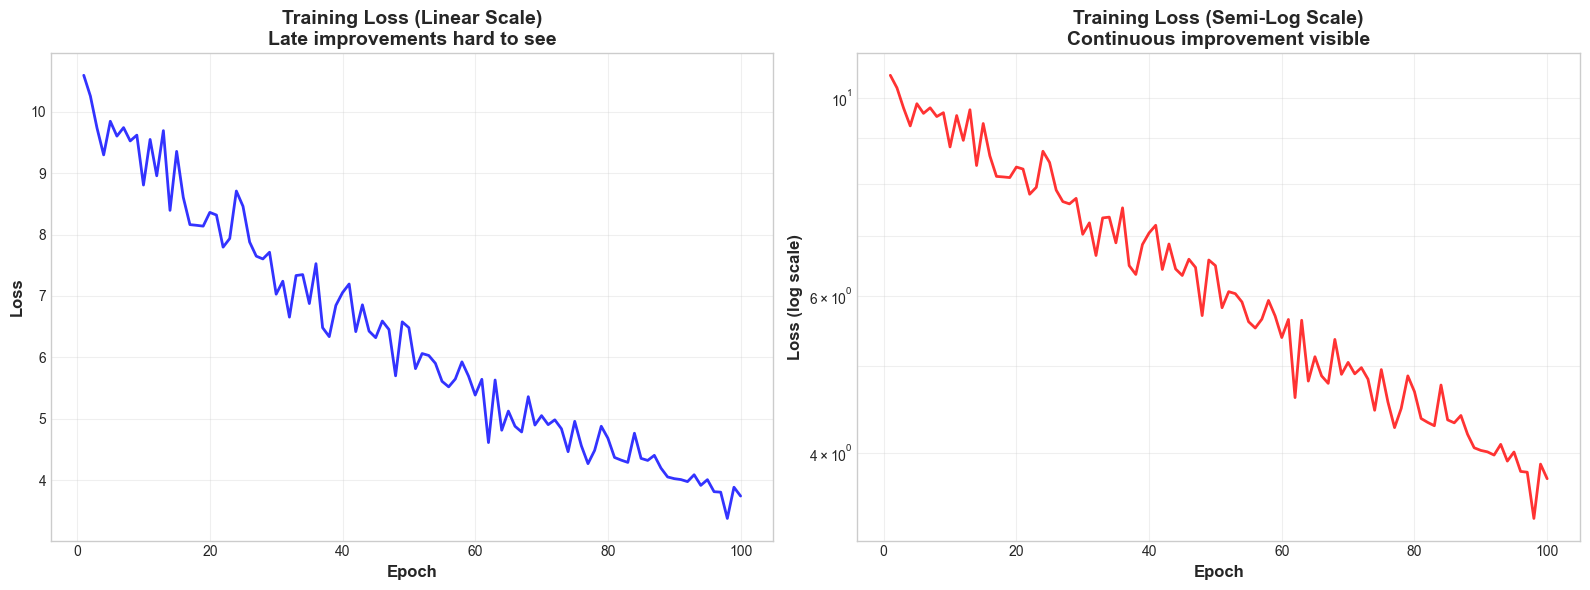


6. DECISION GUIDE: CHOOSING THE RIGHT SCALE
--------------------------------------------------

   Scale Type           | When to Use
   --------------------------------------------------------------------------------
   Linear-Linear        | Normal data, small range, absolute differences matter
   Semi-Log (y)         | Exponential growth/decay, wide y-range, percentage changes matter
   Log-Log              | Power-law relationships, both axes span orders of magnitude
   Symmetric Log        | Data includes zero or negative values with wide range

🎯 Key Insights:
   • Semi-log: exponential relationships → straight lines
   • Log-log: power laws → straight lines (slope = exponent)
   • Use log scales for data spanning orders of magnitude
   • Always label axes clearly as 'log scale'
   • Essential for visualizing growth, distributions, and scientific data


In [28]:
# Solving Exponential Equations - Part 4: Graphical Solutions (Plots 1-3)

# Visualization 1: Solving Graphically
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Basic exponential (2^x = 100)
ax1 = axes[0, 0]
x_range1 = np.linspace(0, 10, 300)
y_exp = 2 ** x_range1
y_target = 100 * np.ones_like(x_range1)

ax1.plot(x_range1, y_exp, 'b-', linewidth=3, label='$y = 2^x$')
ax1.axhline(y=100, color='r', linewidth=3, linestyle='--', label='$y = 100$')

x_solution1 = np.log(100) / np.log(2)
ax1.plot(x_solution1, 100, 'go', markersize=15, zorder=5, label=f'Solution: x = {x_solution1:.2f}')
ax1.axvline(x=x_solution1, color='g', linestyle=':', alpha=0.5)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Solving $2^x = 100$ Graphically', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(0, 150)

# Plot 2: Different bases (2^x vs 3^(x-1))
ax2 = axes[0, 1]
x_range2 = np.linspace(0, 5, 300)
y1 = 2 ** x_range2
y2 = 3 ** (x_range2 - 1)

ax2.plot(x_range2, y1, 'b-', linewidth=3, label='$y = 2^x$')
ax2.plot(x_range2, y2, 'r-', linewidth=3, label='$y = 3^{x-1}$')

x_solution2 = np.log(3) / (np.log(3) - np.log(2))
y_solution2 = 2 ** x_solution2
ax2.plot(x_solution2, y_solution2, 'go', markersize=15, zorder=5, 
        label=f'Intersection: x = {x_solution2:.2f}')

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Solving $2^x = 3^{x-1}$ Graphically', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)

# Plot 3: Quadratic-type
ax3 = axes[0, 2]
x_range3 = np.linspace(-1, 2, 300)
y_quad = np.exp(2*x_range3) - 5*np.exp(x_range3) + 6

ax3.plot(x_range3, y_quad, 'b-', linewidth=3, label='$y = e^{2x} - 5e^x + 6$')
ax3.axhline(y=0, color='r', linewidth=2, linestyle='--', label='$y = 0$')

x_sol1 = np.log(2)
x_sol2 = np.log(3)
ax3.plot(x_sol1, 0, 'go', markersize=12, zorder=5)
ax3.plot(x_sol2, 0, 'go', markersize=12, zorder=5)
ax3.text(x_sol1, -0.3, f'x = ln(2)\n≈{x_sol1:.2f}', ha='center', fontsize=9, fontweight='bold')
ax3.text(x_sol2, -0.3, f'x = ln(3)\n≈{x_sol2:.2f}', ha='center', fontsize=9, fontweight='bold')

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('y', fontsize=12, fontweight='bold')
ax3.set_title('Solving $e^{2x} - 5e^x + 6 = 0$', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_ylim(-1, 3)

# Plot 4: Logarithmic (log_2(x+3) = 5)
ax4 = axes[1, 0]
x_range4 = np.linspace(0.1, 35, 300)
y_log = np.log2(x_range4 + 3)
y_target4 = 5 * np.ones_like(x_range4)

ax4.plot(x_range4, y_log, 'b-', linewidth=3, label='$y = \\log_2(x+3)$')
ax4.axhline(y=5, color='r', linewidth=3, linestyle='--', label='$y = 5$')

x_solution4 = 29
ax4.plot(x_solution4, 5, 'go', markersize=15, zorder=5, label=f'Solution: x = {x_solution4}')
ax4.axvline(x=x_solution4, color='g', linestyle=':', alpha=0.5)

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('x', fontsize=12, fontweight='bold')
ax4.set_ylabel('y', fontsize=12, fontweight='bold')
ax4.set_title('Solving $\\log_2(x+3) = 5$ Graphically', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)

# Plot 5: Multiple logarithms (ln(x) + ln(x-2) = ln(8))
ax5 = axes[1, 1]
x_range5 = np.linspace(2.1, 10, 300)
y_sum = np.log(x_range5) + np.log(x_range5 - 2)
y_target5 = np.log(8) * np.ones_like(x_range5)

ax5.plot(x_range5, y_sum, 'b-', linewidth=3, label='$y = \\ln(x) + \\ln(x-2)$')
ax5.axhline(y=np.log(8), color='r', linewidth=3, linestyle='--', label='$y = \\ln(8)$')

x_solution5 = 4
ax5.plot(x_solution5, np.log(8), 'go', markersize=15, zorder=5, label=f'Solution: x = {x_solution5}')
ax5.axvline(x=x_solution5, color='g', linestyle=':', alpha=0.5)

ax5.grid(True, alpha=0.3)
ax5.set_xlabel('x', fontsize=12, fontweight='bold')
ax5.set_ylabel('y', fontsize=12, fontweight='bold')
ax5.set_title('Solving $\\ln(x) + \\ln(x-2) = \\ln(8)$', fontsize=14, fontweight='bold')
ax5.legend(fontsize=10)
ax5.set_xlim(2, 10)

# Plot 6: Application - Finding Growth Rate
ax6 = axes[1, 2]

# Scenario: Population grows from 1000 to 5000 in 10 years
N0 = 1000
Nt = 5000
t = 10

# Calculate growth rate: k = (1/t) * ln(Nt/N0)
k = (1/t) * np.log(Nt/N0)

time_range = np.linspace(0, 15, 300)
population = N0 * np.exp(k * time_range)

ax6.plot(time_range, population, 'b-', linewidth=3, label=f'$N(t) = {N0}e^{{{k:.3f}t}}$')
ax6.plot(0, N0, 'go', markersize=12, zorder=5, label=f'Initial: {N0}')
ax6.plot(t, Nt, 'ro', markersize=12, zorder=5, label=f'After {t}y: {Nt}')

ax6.axhline(y=Nt, color='r', linestyle=':', alpha=0.5)
ax6.axvline(x=t, color='r', linestyle=':', alpha=0.5)

ax6.grid(True, alpha=0.3)
ax6.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Population', fontsize=12, fontweight='bold')
ax6.set_title(f'Application: Finding Growth Rate\n$k = \\frac{{1}}{{{t}}}\\ln\\left(\\frac{{{Nt}}}{{{N0}}}\\right) = {k:.4f}$',
             fontsize=13, fontweight='bold')
ax6.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [29]:
# Solving Exponential Equations - Part 5: Compound Interest Application

# 8. Application: Solving for Time in Compound Interest
print("\n8. APPLICATION: COMPOUND INTEREST - FINDING TIME")
print("-" * 50)

P = 10000  # Principal
A = 25000  # Target amount
r = 0.06   # Annual rate (6%)

# Continuous compounding: A = P*e^(rt)
# Solve for t: t = ln(A/P) / r

t_continuous = np.log(A/P) / r

print(f"\n   Principal: ${P:,}")
print(f"   Target amount: ${A:,}")
print(f"   Interest rate: {r*100:.1f}% (continuous compounding)")
print(f"\n   Solve: {A} = {P}·e^({r}t)")
print(f"   {A/P:.1f} = e^({r}t)")
print(f"   ln({A/P:.1f}) = {r}t")
print(f"   t = ln({A/P:.1f}) / {r}")
print(f"\n   Time required: {t_continuous:.2f} years")

# Verification
A_check = P * np.exp(r * t_continuous)
print(f"   Verification: ${P:,} × e^({r}×{t_continuous:.2f}) = ${A_check:,.2f} ✓")

print("\n🎯 Key Insights:")
print("   • Basic: b^x = c → x = ln(c)/ln(b)")
print("   • Same base: b^f(x) = b^g(x) → f(x) = g(x)")
print("   • Quadratic-type: substitute u = b^x, solve, back-substitute")
print("   • Always check domain for logarithm equations")
print("   • Graphical solutions verify algebraic work")


5. ML APPLICATION: TRAINING LOSS CURVES
--------------------------------------------------

   Simulated training loss with exponential decay
   Initial loss: 10.395
   Final loss: 3.930
   Improvement: 62.2%


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/2884922575.py:41: UserWarning: Glyph 8308 (\N{SUPERSCRIPT FOUR}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8308 (\N{SUPERSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


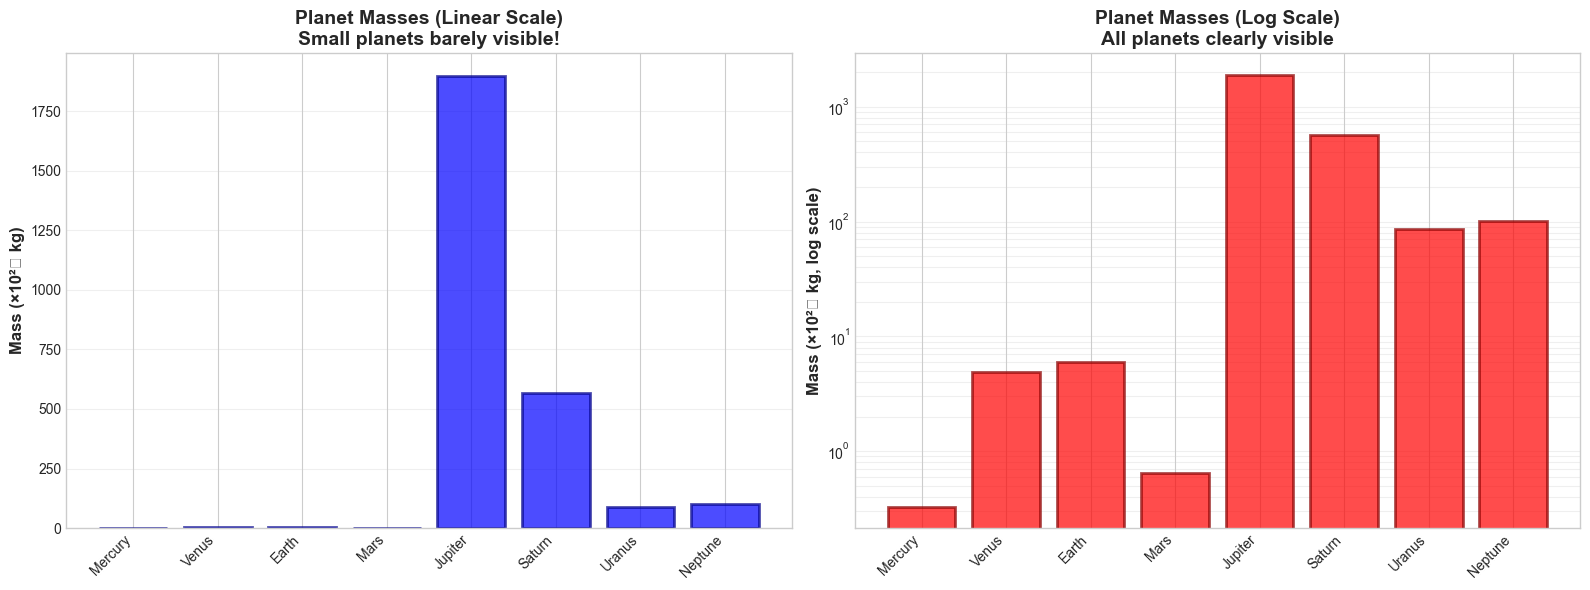

In [30]:
# Data Transformation - Part 1: Generating and Analyzing Skewed Data

print("=" * 70)
print("APPLICATIONS IN DATA TRANSFORMATION")
print("=" * 70)

# 1. Generate Skewed Data
print("\n1. GENERATING SKEWED DATA")
print("-" * 50)

np.random.seed(42)

# Create log-normal distribution (right-skewed)
skewed_data = np.random.lognormal(mean=2, sigma=1, size=1000)

print(f"\n   Original Data Statistics:")
print(f"   Mean: {np.mean(skewed_data):.2f}")
print(f"   Median: {np.median(skewed_data):.2f}")
print(f"   Std Dev: {np.std(skewed_data):.2f}")
print(f"   Skewness: {stats.skew(skewed_data):.2f} (positive → right skewed)")

# Apply log transformation
log_transformed = np.log(skewed_data)

print(f"\n   Log-Transformed Data Statistics:")
print(f"   Mean: {np.mean(log_transformed):.2f}")
print(f"   Median: {np.median(log_transformed):.2f}")
print(f"   Std Dev: {np.std(log_transformed):.2f}")
print(f"   Skewness: {stats.skew(log_transformed):.2f} (near 0 → symmetric)")

In [31]:
# Data Transformation - Part 2: Visualization of Transformations

# Regenerate data for visualization
np.random.seed(42)
skewed_data = np.random.lognormal(mean=2, sigma=1, size=1000)
log_transformed = np.log(skewed_data)

# Visualization 1: Before and After Log Transformation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Original distribution histogram
ax1 = axes[0, 0]
ax1.hist(skewed_data, bins=50, color='red', alpha=0.7, edgecolor='darkred')
ax1.axvline(np.mean(skewed_data), color='blue', linewidth=3, linestyle='--', label=f'Mean = {np.mean(skewed_data):.1f}')
ax1.axvline(np.median(skewed_data), color='green', linewidth=3, linestyle='--', label=f'Median = {np.median(skewed_data):.1f}')
ax1.set_xlabel('Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title(f'Original Data (Right-Skewed)\nSkewness = {stats.skew(skewed_data):.2f}', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Log-transformed histogram
ax2 = axes[0, 1]
ax2.hist(log_transformed, bins=50, color='blue', alpha=0.7, edgecolor='darkblue')
ax2.axvline(np.mean(log_transformed), color='red', linewidth=3, linestyle='--', label=f'Mean = {np.mean(log_transformed):.1f}')
ax2.axvline(np.median(log_transformed), color='green', linewidth=3, linestyle='--', label=f'Median = {np.median(log_transformed):.1f}')
ax2.set_xlabel('ln(Value)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title(f'Log-Transformed Data (Approximately Normal)\nSkewness = {stats.skew(log_transformed):.2f}',
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Q-Q plots for normality check
ax3 = axes[0, 2]
stats.probplot(skewed_data, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot: Original Data\n(Deviates from diagonal → Not normal)',
             fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 0]
stats.probplot(log_transformed, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot: Log-Transformed Data\n(Follows diagonal → Approximately normal)',
             fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Plot 4: Box-Cox transformation comparison
ax5 = axes[1, 1]
lambdas = [-1, -0.5, 0, 0.5, 1, 2]
skewness_values = []

for lam in lambdas:
    if lam == 0:
        transformed = np.log(skewed_data)
    else:
        transformed = (skewed_data**lam - 1) / lam
    skewness_values.append(stats.skew(transformed))

ax5.plot(lambdas, skewness_values, 'bo-', linewidth=3, markersize=10)
ax5.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Symmetric (skewness=0)')
ax5.axvline(x=0, color='green', linestyle=':', alpha=0.7, label='Log transform (λ=0)')
ax5.grid(True, alpha=0.3)
ax5.set_xlabel('λ (Lambda parameter)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Skewness', fontsize=12, fontweight='bold')
ax5.set_title('Box-Cox: Finding Optimal λ\n(Choose λ that minimizes |skewness|)',
             fontsize=13, fontweight='bold')
ax5.legend(fontsize=10)

# Plot 5: Variance stabilization
ax6 = axes[1, 2]

# Generate data where variance increases with mean
n_groups = 20
group_means = np.linspace(10, 100, n_groups)
original_vars = []
log_vars = []

for mean_val in group_means:
    # Variance proportional to mean
    data = np.random.lognormal(mean=np.log(mean_val), sigma=0.3, size=100)
    original_vars.append(np.var(data))
    log_vars.append(np.var(np.log(data)))

ax6.scatter(group_means, original_vars, s=100, alpha=0.7, label='Original variance', color='red')
ax6.scatter(group_means, log_vars, s=100, alpha=0.7, label='Log-transformed variance', color='blue')

# Fit lines
z1 = np.polyfit(group_means, original_vars, 1)
p1 = np.poly1d(z1)
ax6.plot(group_means, p1(group_means), "r--", linewidth=2, alpha=0.7)

ax6.axhline(y=np.mean(log_vars), color='blue', linestyle='--', linewidth=2, alpha=0.7)

ax6.grid(True, alpha=0.3)
ax6.set_xlabel('Group Mean', fontsize=12, fontweight='bold')
ax6.set_ylabel('Variance', fontsize=12, fontweight='bold')
ax6.set_title('Variance Stabilization with Log Transform\n(Red: variance ∝ mean; Blue: stable variance)',
             fontsize=13, fontweight='bold')
ax6.legend(fontsize=10)

plt.tight_layout()
plt.show()


4. VISUALIZING WIDE-RANGE DATA
--------------------------------------------------

   Planet masses (×10²⁴ kg):
   Mercury   :     0.33
   Venus     :     4.87
   Earth     :     5.97
   Mars      :     0.64
   Jupiter   :  1898.00
   Saturn    :   568.00
   Uranus    :    86.80
   Neptune   :   102.00

   Range: 0.33 to 1898 (ratio: 5752:1)


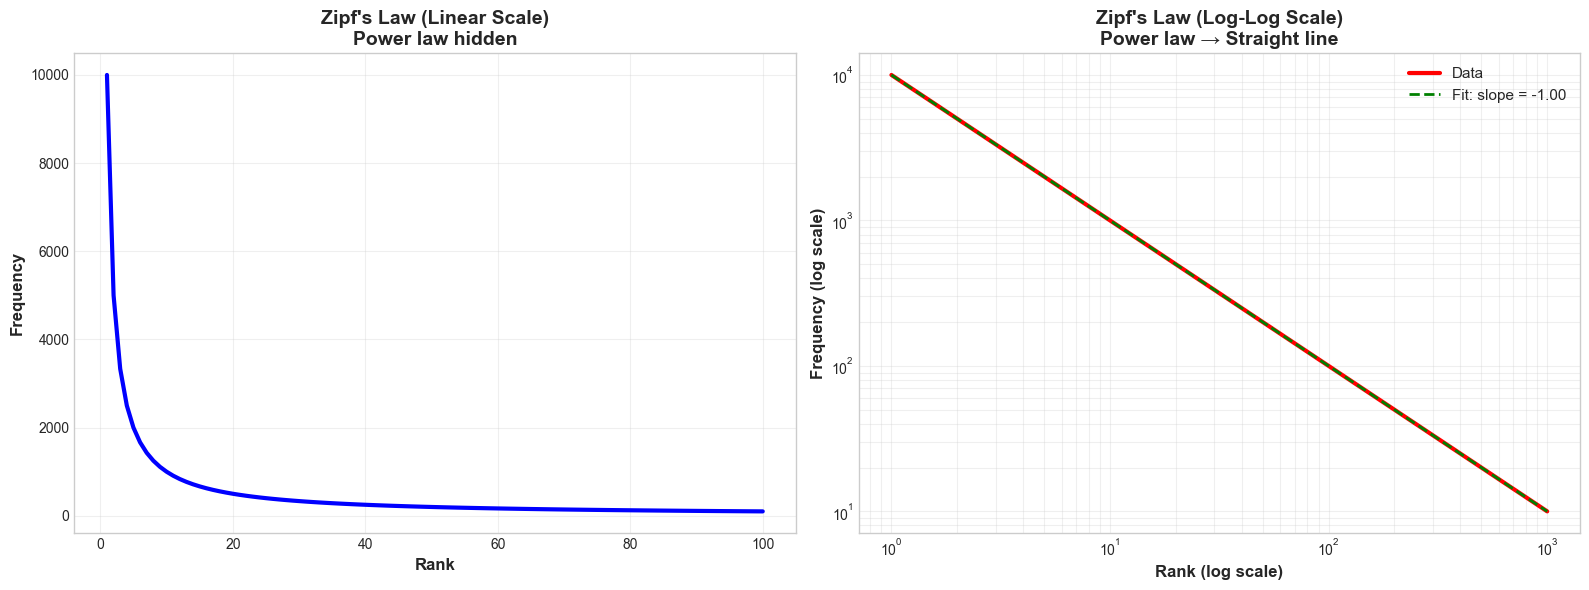

In [32]:
# Data Transformation - Part 3: Financial Log Returns

# 2. Financial Application: Log Returns
print("\n2. FINANCIAL APPLICATION: LOG RETURNS")
print("-" * 50)

# Simulate stock price
np.random.seed(123)
days = 100
initial_price = 100
returns = np.random.normal(0.001, 0.02, days)  # Daily returns

prices = [initial_price]
for r in returns:
    prices.append(prices[-1] * (1 + r))

prices = np.array(prices)

# Simple returns
simple_returns = np.diff(prices) / prices[:-1]

# Log returns
log_returns = np.log(prices[1:] / prices[:-1])

print(f"\n   Simple Returns:")
print(f"   Mean: {np.mean(simple_returns):.4f}")
print(f"   Std Dev: {np.std(simple_returns):.4f}")

print(f"\n   Log Returns:")
print(f"   Mean: {np.mean(log_returns):.4f}")
print(f"   Std Dev: {np.std(log_returns):.4f}")

# Additive property
total_log_return = np.sum(log_returns)
direct_log_return = np.log(prices[-1] / prices[0])

print(f"\n   Additivity of Log Returns:")
print(f"   Sum of daily log returns: {total_log_return:.6f}")
print(f"   Direct log return (day 0 to {days}): {direct_log_return:.6f}")
print(f"   Difference: {abs(total_log_return - direct_log_return):.10f} ≈ 0 ✓")

In [33]:
# Data Transformation - Part 4: Financial Visualization

# Regenerate stock price data
np.random.seed(123)
days = 100
initial_price = 100
returns = np.random.normal(0.001, 0.02, days)

prices = [initial_price]
for r in returns:
    prices.append(prices[-1] * (1 + r))
prices = np.array(prices)

simple_returns = np.diff(prices) / prices[:-1]
log_returns = np.log(prices[1:] / prices[:-1])

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Price series
ax1 = axes[0, 0]
ax1.plot(prices, 'b-', linewidth=2)
ax1.set_xlabel('Days', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
ax1.set_title(f'Stock Price: ${initial_price} → ${prices[-1]:.2f}\n'
             f'Total Return: {((prices[-1]/initial_price - 1)*100):.2f}%',
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Simple vs log returns
ax2 = axes[0, 1]
ax2.plot(simple_returns, 'r-', alpha=0.7, linewidth=2, label='Simple Returns')
ax2.plot(log_returns, 'b-', alpha=0.7, linewidth=2, label='Log Returns')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('Days', fontsize=12, fontweight='bold')
ax2.set_ylabel('Return', fontsize=12, fontweight='bold')
ax2.set_title('Simple vs Log Returns\n(Very similar for small changes)',
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Plot 3: Distribution comparison
ax3 = axes[1, 0]
ax3.hist(simple_returns, bins=30, alpha=0.5, color='red', label='Simple Returns', edgecolor='darkred')
ax3.hist(log_returns, bins=30, alpha=0.5, color='blue', label='Log Returns', edgecolor='darkblue')
ax3.set_xlabel('Return', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title('Distribution of Returns', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Cumulative returns
ax4 = axes[1, 1]
cumulative_simple = np.cumprod(1 + simple_returns) - 1
cumulative_log = np.exp(np.cumsum(log_returns)) - 1

ax4.plot(cumulative_simple * 100, 'r-', linewidth=2, label='From Simple Returns')
ax4.plot(cumulative_log * 100, 'b--', linewidth=2, label='From Log Returns', alpha=0.7)
ax4.set_xlabel('Days', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cumulative Return (%)', fontsize=12, fontweight='bold')
ax4.set_title('Cumulative Returns Comparison', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


3. APPLICATION: ZIPF'S LAW (WORD FREQUENCY)
--------------------------------------------------

   Zipf's Law: frequency ∝ 1/rank
   Rank 1 (most common): 10000 occurrences
   Rank 10: 1000 occurrences
   Rank 100: 100 occurrences
   Rank 1000: 10 occurrences

   Log-log fit: log(frequency) = 4.00 + -1.00·log(rank)
   Power law exponent: -1.00 (close to -1 for Zipf)


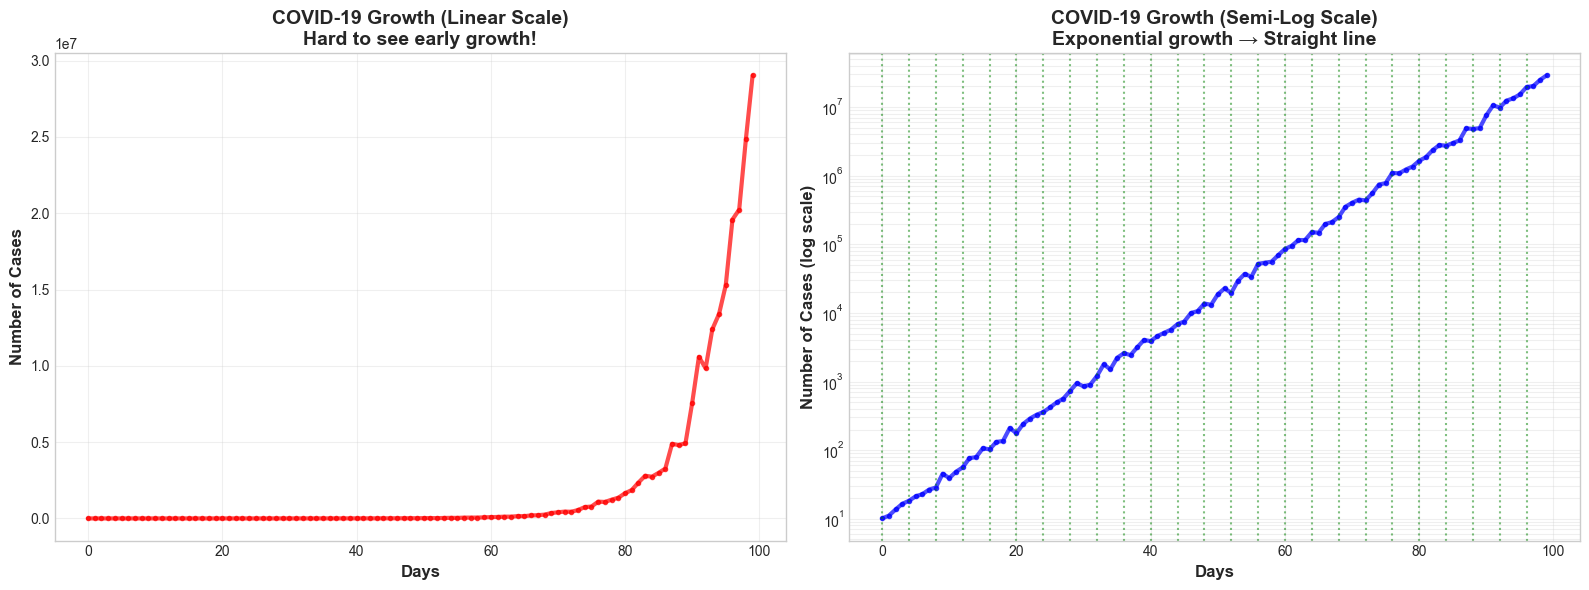

In [34]:
# Data Transformation - Part 5: Linearizing Exponential Relationships

# 3. Linearizing Exponential Relationships
print("\n3. LINEARIZING EXPONENTIAL RELATIONSHIPS")
print("-" * 50)

# Generate exponential data: y = 5 * 2^x with noise
x_data = np.linspace(0, 5, 50)
y_true = 5 * (2 ** x_data)
noise = np.random.normal(0, 0.1 * y_true, len(x_data))
y_data = y_true + noise

# Log transform y
log_y_data = np.log(y_data)

# Linear regression on log scale
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, log_y_data)

print(f"\n   Original relationship: y = a·b^x")
print(f"   Log-transformed: ln(y) = ln(a) + x·ln(b)")
print(f"\n   Linear regression on ln(y) vs x:")
print(f"   ln(y) = {intercept:.3f} + {slope:.3f}·x")
print(f"   R² = {r_value**2:.4f}")

# Convert back to exponential form
a_estimated = np.exp(intercept)
b_estimated = np.exp(slope)

print(f"\n   Converting back to exponential:")
print(f"   a = e^{intercept:.3f} = {a_estimated:.2f} (true: 5)")
print(f"   b = e^{slope:.3f} = {b_estimated:.2f} (true: 2)")

In [35]:
# Data Transformation - Part 6: Linearization Visualization

# Regenerate exponential data
x_data = np.linspace(0, 5, 50)
y_true = 5 * (2 ** x_data)
noise = np.random.normal(0, 0.1 * y_true, len(x_data))
y_data = y_true + noise
log_y_data = np.log(y_data)

# Linear regression on log scale
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, log_y_data)

a_estimated = np.exp(intercept)
b_estimated = np.exp(slope)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Exponential relationship
ax1.scatter(x_data, y_data, s=50, alpha=0.6, label='Data', color='blue')
ax1.plot(x_data, y_true, 'r-', linewidth=3, label='True: $y = 5 \\cdot 2^x$')

y_fitted = a_estimated * (b_estimated ** x_data)
ax1.plot(x_data, y_fitted, 'g--', linewidth=3, label=f'Fitted: $y = {a_estimated:.1f} \\cdot {b_estimated:.2f}^x$')

ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Exponential Relationship: $y = a \\cdot b^x$', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Linearized on log scale
ax2.scatter(x_data, log_y_data, s=50, alpha=0.6, label='Log-transformed data', color='blue')

log_y_fitted = intercept + slope * x_data
ax2.plot(x_data, log_y_fitted, 'r-', linewidth=3, 
        label=f'$\\ln(y) = {intercept:.2f} + {slope:.2f}x$ ($R^2={r_value**2:.3f}$)')

ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('ln(y)', fontsize=12, fontweight='bold')
ax2.set_title('Linearized: $\\ln(y) = \\ln(a) + x \\cdot \\ln(b)$', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • Log transform: normalizes right-skewed data")
print("   • Stabilizes variance when σ² ∝ μ")
print("   • Log returns: additive and symmetric")
print("   • Linearizes exponential relationships")
print("   • Essential for feature engineering in ML")


2. APPLICATION: COVID-19 EXPONENTIAL GROWTH
--------------------------------------------------

   Model: Cases(t) = 10 × e^(0.15t)
   Day 0: 9 cases
   Day 50: 15965 cases
   Day 99: 26288410 cases

   Doubling time: 4.6 days


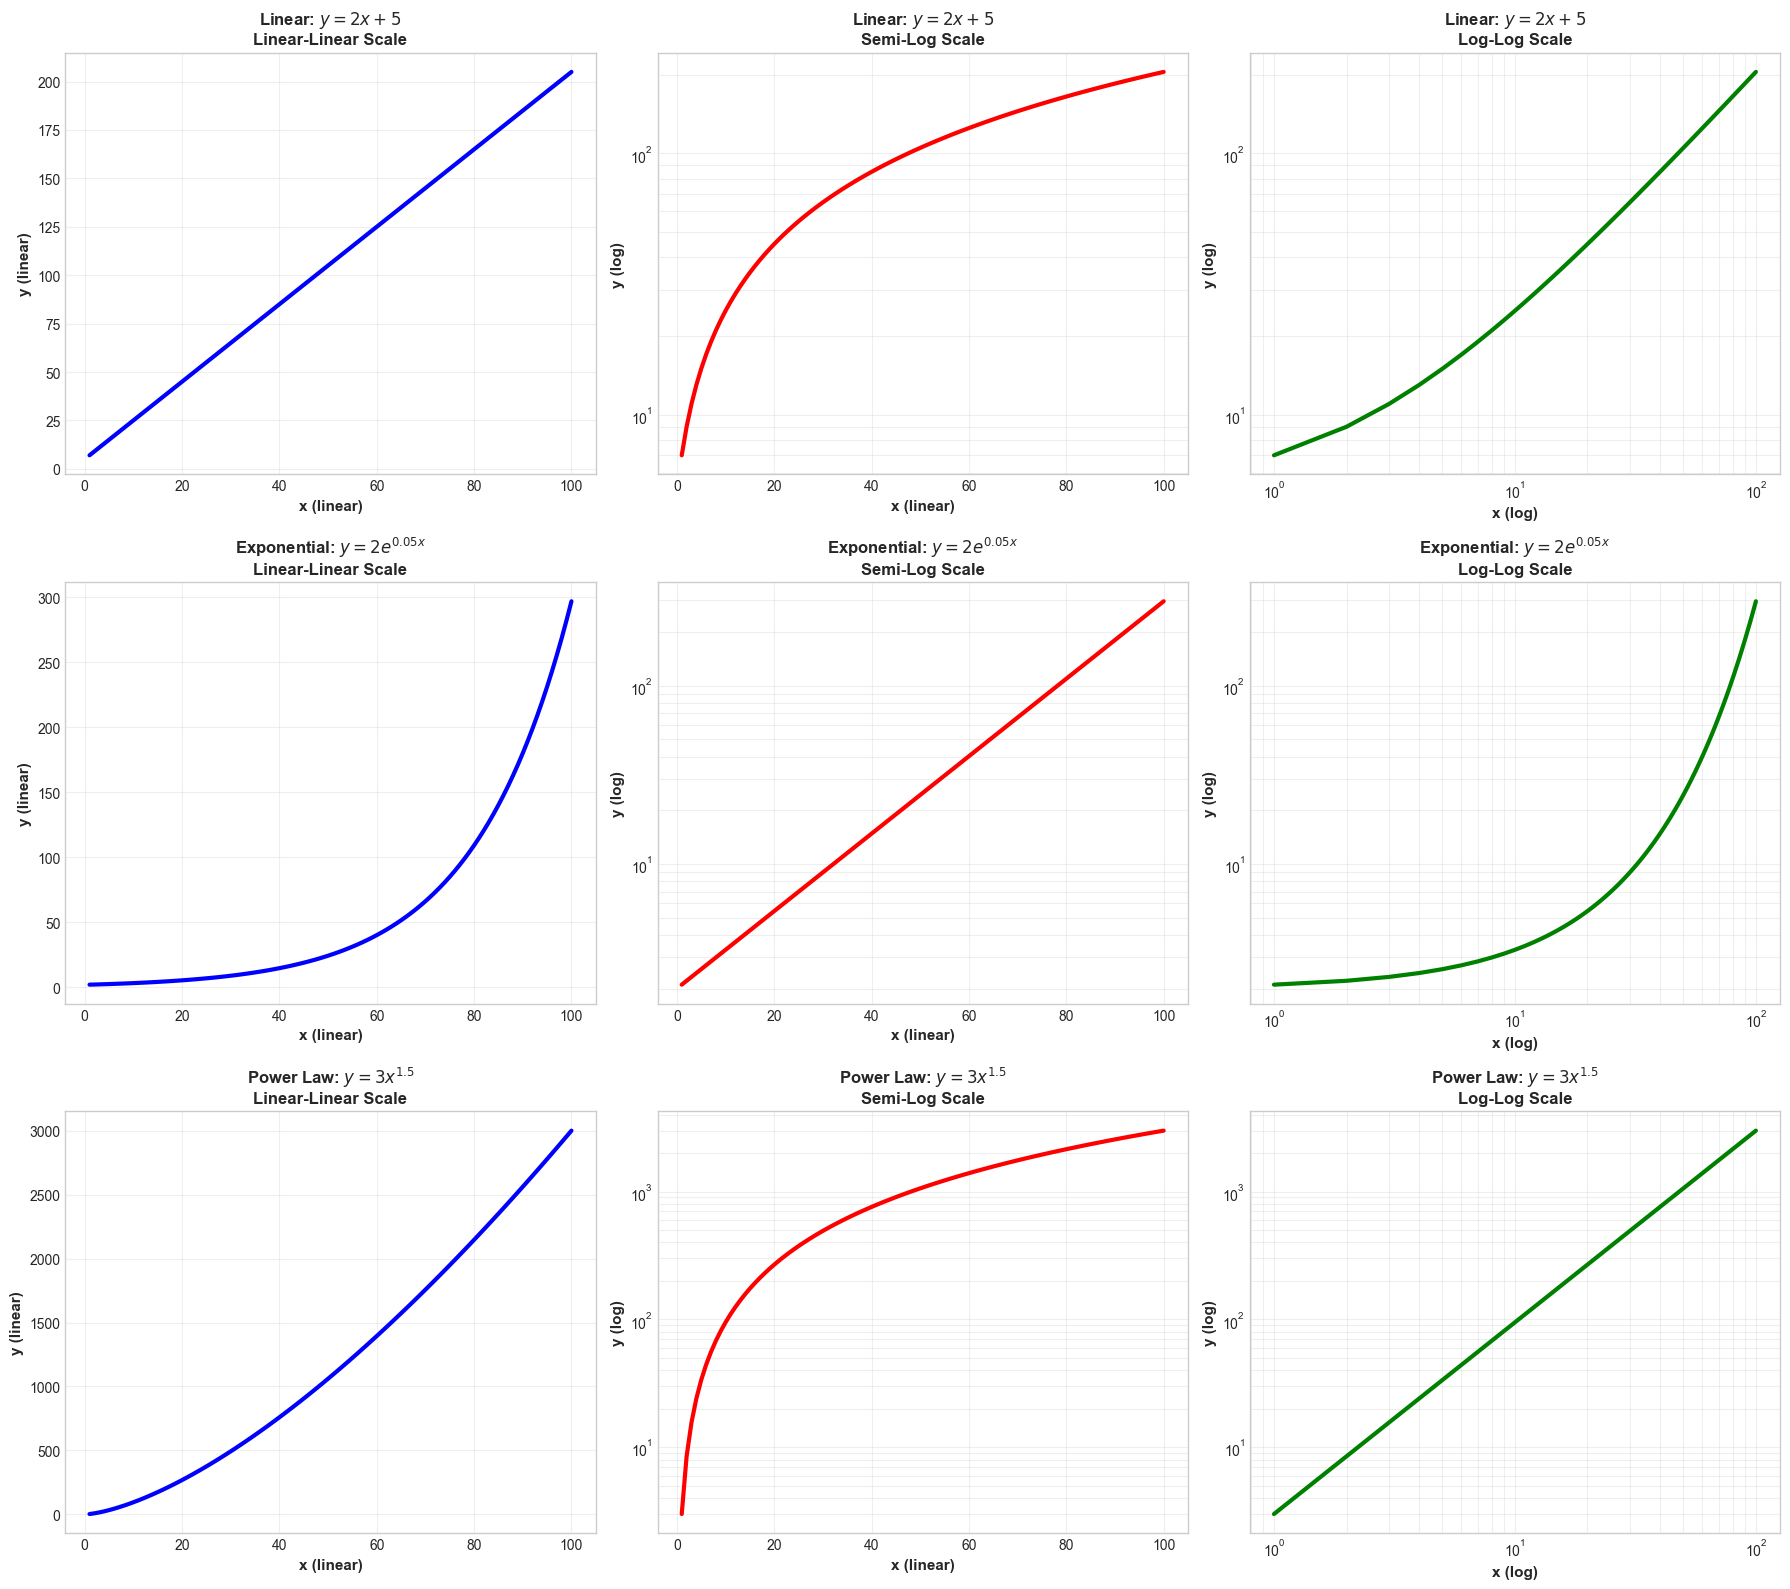

In [36]:
# Log Scales in Visualization - Part 1: Introduction

print("=" * 70)
print("LOG SCALES IN VISUALIZATION")
print("=" * 70)

# 1. Generate Data for Different Relationships
print("\n1. COMPARING LINEAR VS LOG SCALES")
print("-" * 50)

x = np.linspace(1, 100, 100)
y_linear = 2 * x + 5
y_exponential = 2 * np.exp(0.05 * x)
y_power = 3 * x**1.5

print(f"\n   Generated three relationships:")
print(f"   • Linear: y = 2x + 5")
print(f"   • Exponential: y = 2e^(0.05x)")
print(f"   • Power law: y = 3x^1.5")

In [37]:
# Log Scales in Visualization - Part 2: Scale Comparison Plots

# Regenerate data
x = np.linspace(1, 100, 100)
y_linear = 2 * x + 5
y_exponential = 2 * np.exp(0.05 * x)
y_power = 3 * x**1.5

# Visualization 1: All three plot types
fig, axes = plt.subplots(3, 3, figsize=(18, 16))

relationships = [
    ('Linear: $y = 2x + 5$', y_linear),
    ('Exponential: $y = 2e^{0.05x}$', y_exponential),
    ('Power Law: $y = 3x^{1.5}$', y_power)
]

for row, (title, y_data) in enumerate(relationships):
    # Linear-linear plot
    ax = axes[row, 0]
    ax.plot(x, y_data, 'b-', linewidth=3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (linear)', fontsize=11, fontweight='bold')
    ax.set_ylabel('y (linear)', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nLinear-Linear Scale', fontsize=12, fontweight='bold')
    
    # Semi-log plot
    ax = axes[row, 1]
    ax.semilogy(x, y_data, 'r-', linewidth=3)
    ax.grid(True, alpha=0.3, which='both')
    ax.set_xlabel('x (linear)', fontsize=11, fontweight='bold')
    ax.set_ylabel('y (log)', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nSemi-Log Scale', fontsize=12, fontweight='bold')
    
    # Log-log plot
    ax = axes[row, 2]
    ax.loglog(x, y_data, 'g-', linewidth=3)
    ax.grid(True, alpha=0.3, which='both')
    ax.set_xlabel('x (log)', fontsize=11, fontweight='bold')
    ax.set_ylabel('y (log)', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nLog-Log Scale', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

LOG SCALES IN VISUALIZATION

1. COMPARING LINEAR VS LOG SCALES
--------------------------------------------------

   Generated three relationships:
   • Linear: y = 2x + 5
   • Exponential: y = 2e^(0.05x)
   • Power law: y = 3x^1.5


# Log Scales in Visualization - Part 3: COVID-19 Example

# 2. Real-World Example: COVID-19 Cases
print("\n2. APPLICATION: COVID-19 EXPONENTIAL GROWTH")
print("-" * 50)

# Simulate COVID-19 style exponential growth
days = np.arange(0, 100)
initial_cases = 10
growth_rate = 0.15  # 15% daily growth

cases = initial_cases * np.exp(growth_rate * days)

# Add some noise
cases = cases * (1 + np.random.normal(0, 0.1, len(cases)))
cases = np.maximum(cases, 1)  # No negative cases

print(f"\n   Model: Cases(t) = {initial_cases} × e^({growth_rate}t)")
print(f"   Day 0: {cases[0]:.0f} cases")
print(f"   Day 50: {cases[50]:.0f} cases")
print(f"   Day 99: {cases[99]:.0f} cases")

doubling_time = np.log(2) / growth_rate
print(f"\n   Doubling time: {doubling_time:.1f} days")

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/1809064857.py:38: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/1809064857.py:38: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


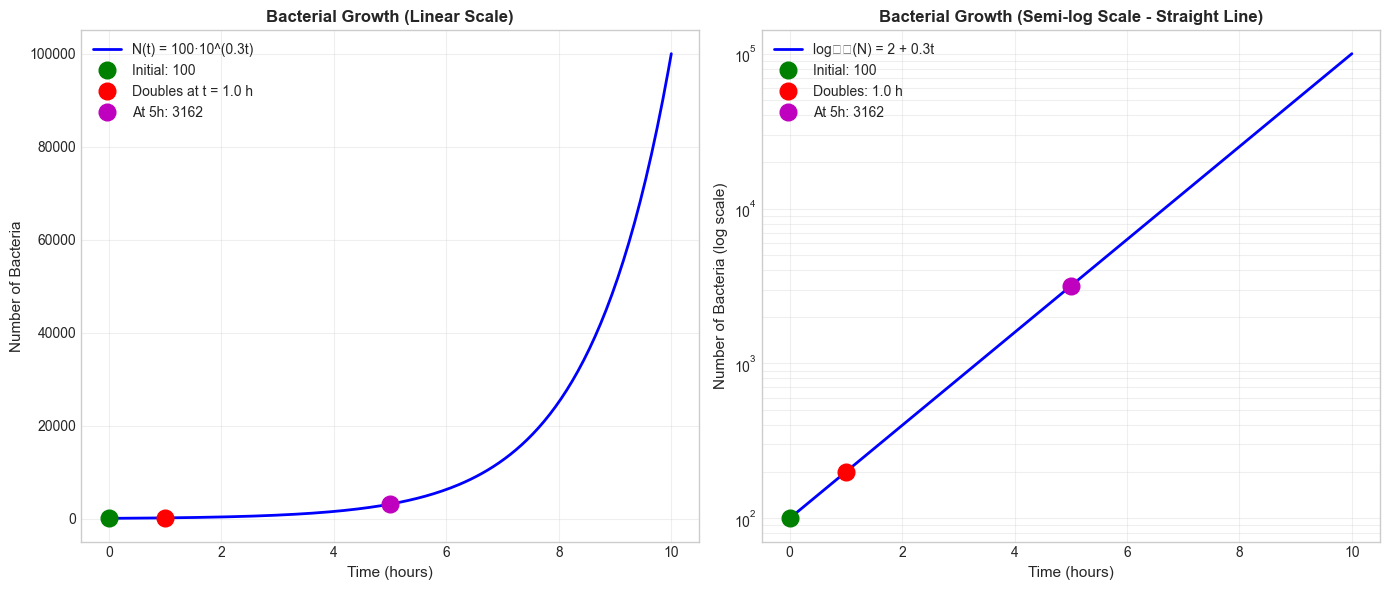


KEY INSIGHT: On a semi-log plot, exponential growth appears as a
straight line, making it easy to identify the growth rate from the slope!


In [38]:
# Log Scales in Visualization - Part 4: COVID-19 Visualization

# Regenerate COVID data
days = np.arange(0, 100)
initial_cases = 10
growth_rate = 0.15
cases = initial_cases * np.exp(growth_rate * days)
cases = cases * (1 + np.random.normal(0, 0.1, len(cases)))
cases = np.maximum(cases, 1)
doubling_time = np.log(2) / growth_rate

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale
ax1.plot(days, cases, 'r-', linewidth=3, marker='o', markersize=3, alpha=0.7)
ax1.set_xlabel('Days', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Cases', fontsize=12, fontweight='bold')
ax1.set_title('COVID-19 Growth (Linear Scale)\nHard to see early growth!',
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Semi-log scale
ax2.semilogy(days, cases, 'b-', linewidth=3, marker='o', markersize=3, alpha=0.7)
ax2.set_xlabel('Days', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Cases (log scale)', fontsize=12, fontweight='bold')
ax2.set_title('COVID-19 Growth (Semi-Log Scale)\nExponential growth → Straight line',
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both')

# Add doubling time markers
for i in range(0, 100, int(doubling_time)):
    if i < len(days):
        ax2.axvline(x=i, color='green', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

In [39]:
# Log Scales in Visualization - Part 5: Zipf's Law Application

# 3. Power Law: Zipf's Law (Word Frequency)
print("\n3. APPLICATION: ZIPF'S LAW (WORD FREQUENCY)")
print("-" * 50)

# Simulate Zipf's law: frequency ∝ 1/rank
ranks = np.arange(1, 1001)
frequencies = 10000 / ranks  # Classic Zipf's law

print(f"\n   Zipf's Law: frequency ∝ 1/rank")
print(f"   Rank 1 (most common): {frequencies[0]:.0f} occurrences")
print(f"   Rank 10: {frequencies[9]:.0f} occurrences")
print(f"   Rank 100: {frequencies[99]:.0f} occurrences")
print(f"   Rank 1000: {frequencies[999]:.0f} occurrences")

# Fit power law on log-log scale
log_ranks = np.log10(ranks)
log_freqs = np.log10(frequencies)
slope, intercept = np.polyfit(log_ranks, log_freqs, 1)

print(f"\n   Log-log fit: log(frequency) = {intercept:.2f} + {slope:.2f}·log(rank)")
print(f"   Power law exponent: {slope:.2f} (close to -1 for Zipf)")


PROBLEM 6: LOG SCALE INTERPRETATION

Given semi-log equation: log₁₀(N) = 2 + 0.3t
where N = number of bacteria, t = time (hours)

Problem 6(a): Initial population (t = 0)

Substitute t = 0:
  log₁₀(N) = 2 + 0.3(0) = 2
  N = 10² = 100 bacteria

Initial population: 100 bacteria

Problem 6(b): Exponential growth formula

From log₁₀(N) = 2 + 0.3t:
  N = 10^(2 + 0.3t)
  N = 10² × 10^(0.3t)
  N = 100 × 10^(0.3t)

Alternatively, in natural exponential form:
  N = 100 × e^(0.3·ln(10)·t)
  N = 100 × e^(0.6908t)

Growth formula: N(t) = 100 × 10^(0.3t) = 100 × e^(0.6908t)

Problem 6(c): Doubling time

Setup: 2N₀ = N₀ × 10^(0.3t)
Solve for t:
  2 = 10^(0.3t)
  log₁₀(2) = 0.3t
  t = log₁₀(2) / 0.3

  t = 1.003 hours
  t ≈ 1.00 hours = 60 minutes

Problem 6(d): Population after 5 hours

N(5) = 100 × 10^(0.3 × 5)
     = 100 × 10^1.5
     = 100 × 31.62
     = 3162 bacteria


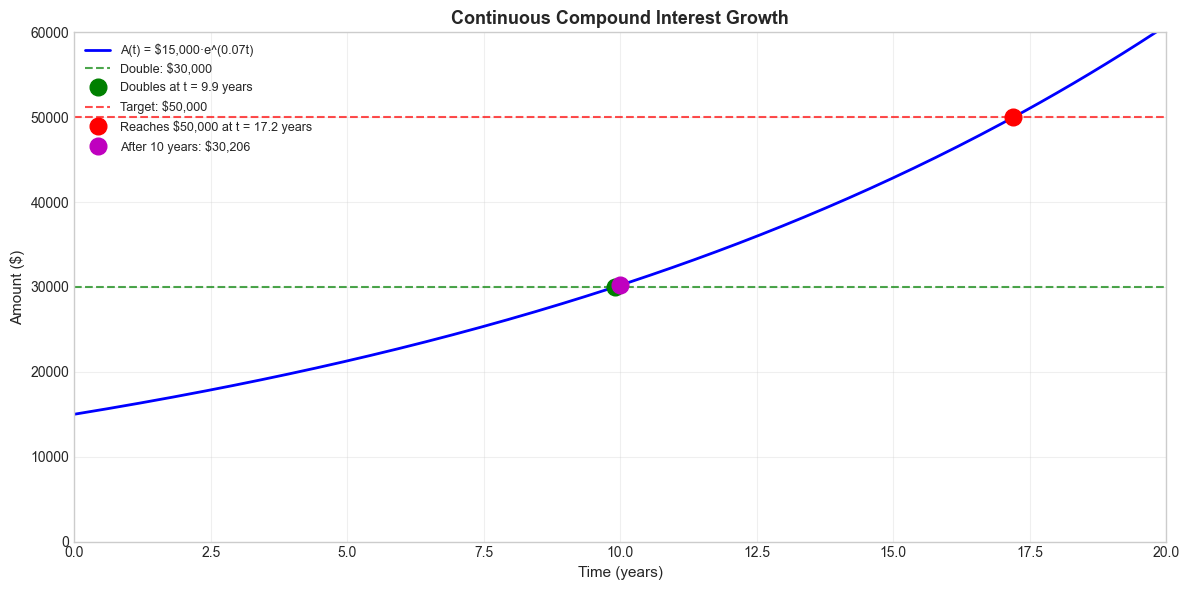

In [40]:
# Log Scales in Visualization - Part 6: Zipf Visualization and More

# Regenerate Zipf data
ranks = np.arange(1, 1001)
frequencies = 10000 / ranks
log_ranks = np.log10(ranks)
log_freqs = np.log10(frequencies)
slope, intercept = np.polyfit(log_ranks, log_freqs, 1)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale
ax1.plot(ranks[:100], frequencies[:100], 'b-', linewidth=3)
ax1.set_xlabel('Rank', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title("Zipf's Law (Linear Scale)\nPower law hidden", fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Log-log scale
ax2.loglog(ranks, frequencies, 'r-', linewidth=3, label='Data')

# Plot fitted line
fitted_freqs = 10 ** (intercept + slope * log_ranks)
ax2.loglog(ranks, fitted_freqs, 'g--', linewidth=2, 
          label=f'Fit: slope = {slope:.2f}')

ax2.set_xlabel('Rank (log scale)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency (log scale)', fontsize=12, fontweight='bold')
ax2.set_title("Zipf's Law (Log-Log Scale)\nPower law → Straight line",
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [41]:
# Log Scales in Visualization - Part 7: Planet Masses Example

# 4. Data Spanning Multiple Orders of Magnitude
print("\n4. VISUALIZING WIDE-RANGE DATA")
print("-" * 50)

# Planet data
planets = {
    'Mercury': 0.330,
    'Venus': 4.87,
    'Earth': 5.97,
    'Mars': 0.642,
    'Jupiter': 1898,
    'Saturn': 568,
    'Uranus': 86.8,
    'Neptune': 102
}

planet_names = list(planets.keys())
masses = list(planets.values())  # in 10^24 kg

print(f"\n   Planet masses (×10²⁴ kg):")
for name, mass in planets.items():
    print(f"   {name:10s}: {mass:8.2f}")

print(f"\n   Range: {min(masses):.2f} to {max(masses):.0f} (ratio: {max(masses)/min(masses):.0f}:1)")


PROBLEM 5: FINANCIAL APPLICATION (CONTINUOUS COMPOUNDING)
Initial Investment: $15,000
Annual Interest Rate: 7.000000000000001% (compounded continuously)
Formula: A(t) = P₀·e^(rt)

Problem 5(a): Time to double

Setup: 2P₀ = P₀·e^(rt)
Solve for t:
  2 = e^(rt)
  ln(2) = rt
  t = ln(2) / r

  t = ln(2) / 0.07 = 9.90 years

Verification: A(9.90) = $30,000.00
              2 × $15,000 = $30,000 ✓

Problem 5(b): Amount after 10 years

A(10) = 15,000 × e^(0.07 × 10)
      = 15,000 × e^0.7
      = 15,000 × 2.013753
      = $30,206.29

Problem 5(c): Time to reach $50,000

Setup: 50,000 = 15,000 × e^(0.07t)
Solve for t:
  3.3333 = e^(0.07t)
  ln(3.3333) = 0.07t
  t = ln(3.3333) / 0.07

  t = 17.20 years

Verification: A(17.20) = $50,000.00 ≈ $50,000 ✓


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/796936481.py:40: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/796936481.py:40: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


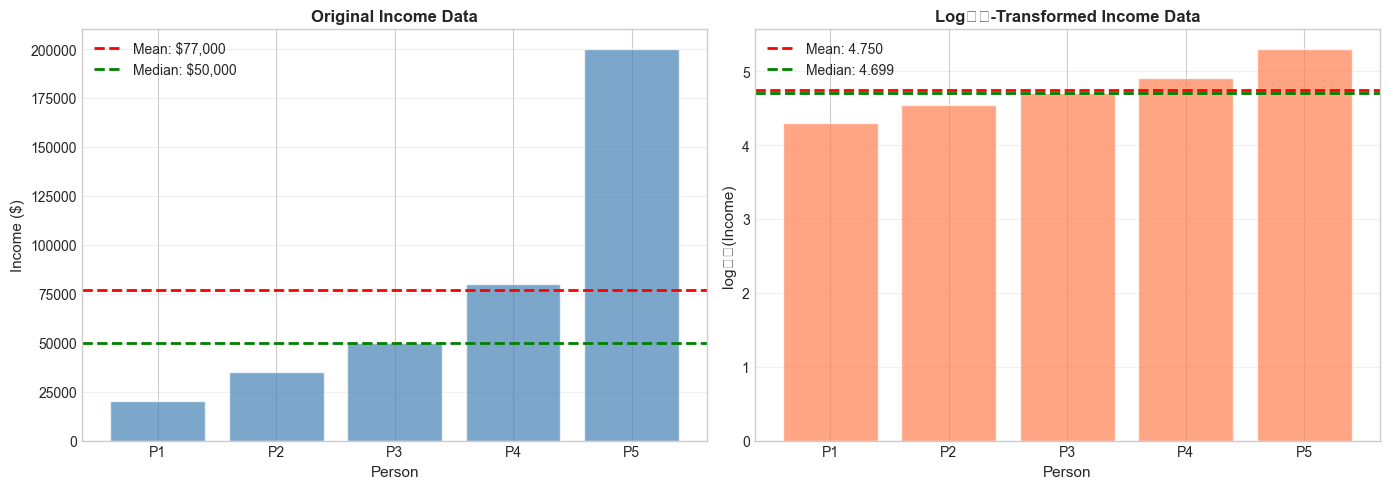

In [42]:
# Log Scales in Visualization - Part 8: Planet Visualization

# Regenerate planet data
planets = {
    'Mercury': 0.330,
    'Venus': 4.87,
    'Earth': 5.97,
    'Mars': 0.642,
    'Jupiter': 1898,
    'Saturn': 568,
    'Uranus': 86.8,
    'Neptune': 102
}
planet_names = list(planets.keys())
masses = list(planets.values())

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale
ax1.bar(range(len(planet_names)), masses, color='blue', alpha=0.7, 
       edgecolor='darkblue', linewidth=2)
ax1.set_xticks(range(len(planet_names)))
ax1.set_xticklabels(planet_names, rotation=45, ha='right')
ax1.set_ylabel('Mass (×10²⁴ kg)', fontsize=12, fontweight='bold')
ax1.set_title('Planet Masses (Linear Scale)\nSmall planets barely visible!',
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Log scale
ax2.bar(range(len(planet_names)), masses, color='red', alpha=0.7,
       edgecolor='darkred', linewidth=2)
ax2.set_yscale('log')
ax2.set_xticks(range(len(planet_names)))
ax2.set_xticklabels(planet_names, rotation=45, ha='right')
ax2.set_ylabel('Mass (×10²⁴ kg, log scale)', fontsize=12, fontweight='bold')
ax2.set_title('Planet Masses (Log Scale)\nAll planets clearly visible',
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both', axis='y')

plt.tight_layout()
plt.show()

In [43]:
# Log Scales in Visualization - Part 9: ML Loss Curves

# 5. Machine Learning: Loss Curves
print("\n5. ML APPLICATION: TRAINING LOSS CURVES")
print("-" * 50)

# Simulate training loss
epochs = np.arange(1, 101)
initial_loss = 10
learning_rate = 0.1

# Exponential decay
loss = initial_loss * np.exp(-learning_rate * epochs / 10)
loss += np.random.normal(0, 0.05 * loss, len(loss))  # Add noise

print(f"\n   Simulated training loss with exponential decay")
print(f"   Initial loss: {loss[0]:.3f}")
print(f"   Final loss: {loss[-1]:.3f}")
print(f"   Improvement: {((loss[0] - loss[-1])/loss[0]*100):.1f}%")


PROBLEM 4: DATA TRANSFORMATION

Original Income Data:
[ 20000  35000  50000  80000 200000]

Problem 4(a): Mean and median of original data
  Mean: $77,000.00
  Median: $50,000.00
  Difference: $27,000.00
  The mean is pulled up by the high outlier ($200,000)

Problem 4(b): Apply log₁₀ transformation
Log₁₀-transformed data:
  log₁₀($20,000) = 4.3010
  log₁₀($35,000) = 4.5441
  log₁₀($50,000) = 4.6990
  log₁₀($80,000) = 4.9031
  log₁₀($200,000) = 5.3010

Problem 4(c): Mean and median of log-transformed data
  Mean: 4.7496
  Median: 4.6990
  Difference: 0.0507

Problem 4(d): Which measure is more affected?

Original mean: $77,000.00
Exp(mean of logs): $56,187.23
Difference: $20,812.77 (27.0%)

Original median: $50,000.00
Exp(median of logs): $50,000.00
Difference: $0.00 (0.0%)

💡 KEY INSIGHT:
The MEAN is more affected by log transformation because it's sensitive
to extreme values. The log transform reduces the influence of the outlier
($200,000), causing the mean to decrease significantl

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/4030025781.py:60: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_15415/4030025781.py:60: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


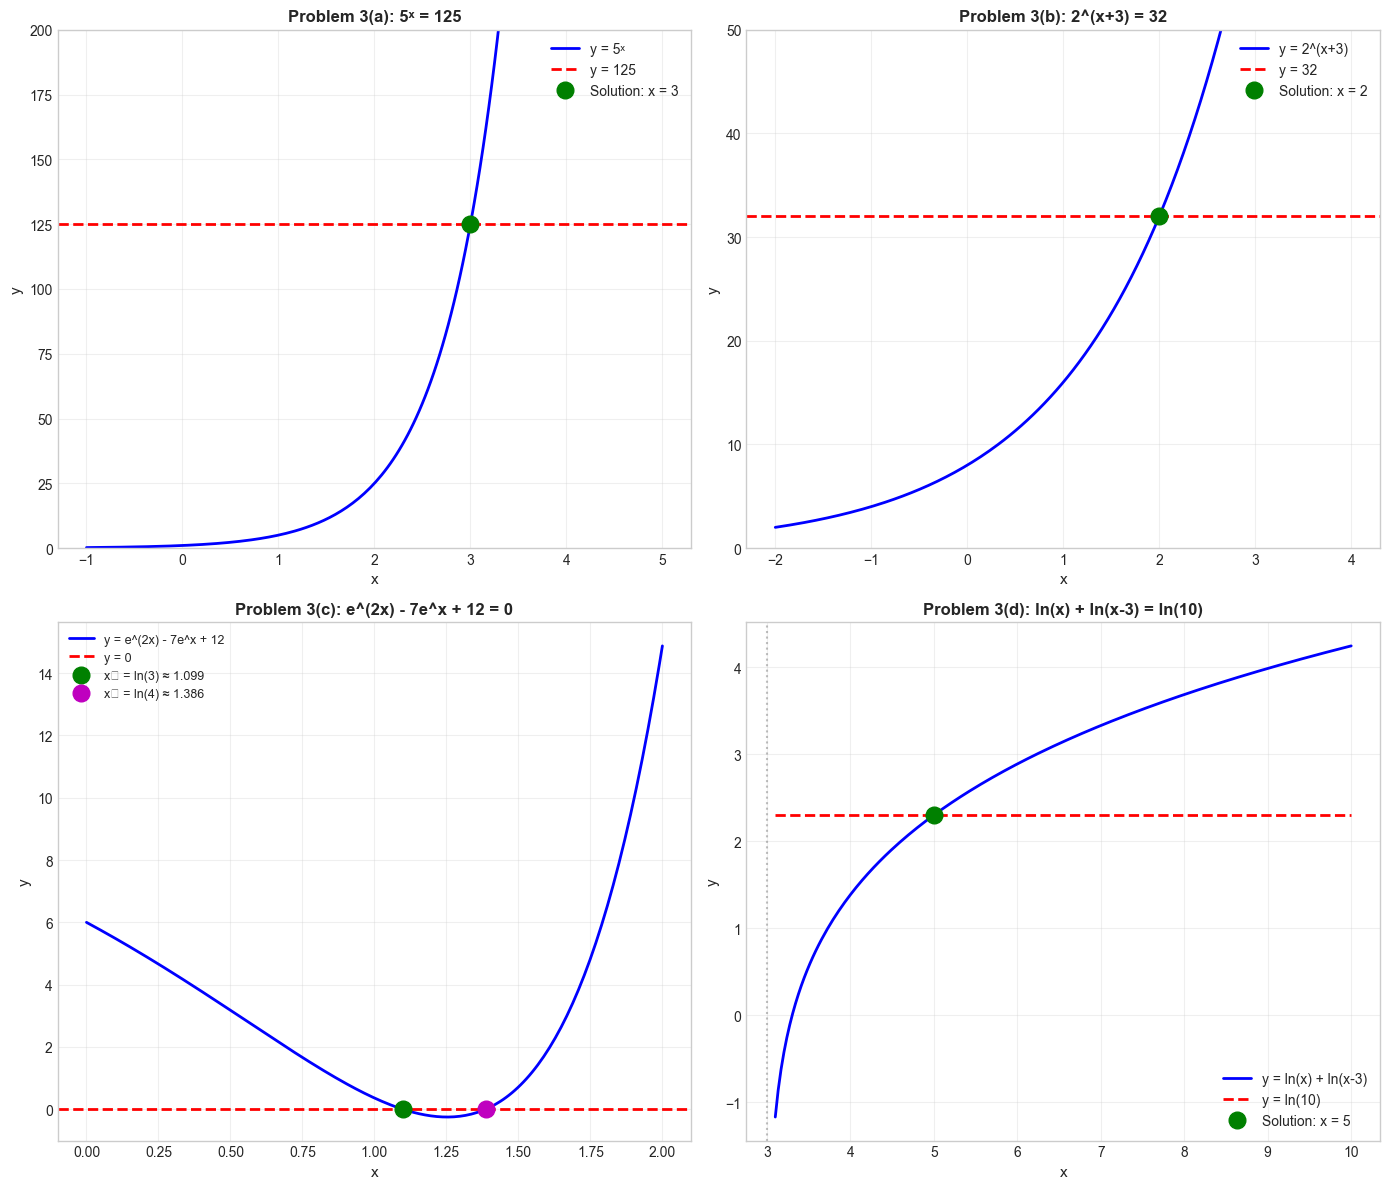

In [44]:
# Log Scales in Visualization - Part 10: ML Loss Visualization & Summary

# Regenerate loss data
epochs = np.arange(1, 101)
initial_loss = 10
learning_rate = 0.1
loss = initial_loss * np.exp(-learning_rate * epochs / 10)
loss += np.random.normal(0, 0.05 * loss, len(loss))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale
ax1.plot(epochs, loss, 'b-', linewidth=2, alpha=0.8)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Training Loss (Linear Scale)\nLate improvements hard to see',
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Log scale
ax2.semilogy(epochs, loss, 'r-', linewidth=2, alpha=0.8)
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Loss (log scale)', fontsize=12, fontweight='bold')
ax2.set_title('Training Loss (Semi-Log Scale)\nContinuous improvement visible',
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# 6. Summary: When to Use Which Scale
print("\n6. DECISION GUIDE: CHOOSING THE RIGHT SCALE")
print("-" * 50)

decision_guide = {
    "Linear-Linear": "Normal data, small range, absolute differences matter",
    "Semi-Log (y)": "Exponential growth/decay, wide y-range, percentage changes matter",
    "Log-Log": "Power-law relationships, both axes span orders of magnitude",
    "Symmetric Log": "Data includes zero or negative values with wide range"
}

print("\n   Scale Type           | When to Use")
print("   " + "-" * 80)
for scale, usage in decision_guide.items():
    print(f"   {scale:20s} | {usage}")

print("\n🎯 Key Insights:")
print("   • Semi-log: exponential relationships → straight lines")
print("   • Log-log: power laws → straight lines (slope = exponent)")
print("   • Use log scales for data spanning orders of magnitude")
print("   • Always label axes clearly as 'log scale'")
print("   • Essential for visualizing growth, distributions, and scientific data")

In [45]:
# Practice Problems Solutions - Problem 1: Logarithm Properties

print("=" * 80)
print("PROBLEM 1: LOGARITHM PROPERTIES")
print("=" * 80)

print("\nProblem 1(a): log₂(64) + log₂(4) - log₂(32)")
print("\nStep 1: Convert to powers of 2")
print("  64 = 2⁶, 4 = 2², 32 = 2⁵")
print("\nStep 2: Apply log properties")
print("  log₂(2⁶) + log₂(2²) - log₂(2⁵)")
print("  = 6 + 2 - 5")
print("  = 3")
print(f"\nVerification: {np.log2(64) + np.log2(4) - np.log2(32):.6f}")

print("\n" + "-" * 80)
print("\nProblem 1(b): ln(e⁵) - 2ln(e)")
print("\nStep 1: Apply logarithm of power rule")
print("  ln(e⁵) = 5ln(e) = 5(1) = 5")
print("\nStep 2: Simplify ln(e)")
print("  2ln(e) = 2(1) = 2")
print("\nStep 3: Subtract")
print("  5 - 2 = 3")
print(f"\nVerification: {np.log(np.e**5) - 2*np.log(np.e):.6f}")

print("\n" + "-" * 80)
print("\nProblem 1(c): log₁₀(1000) - log₁₀(100) + log₁₀(10)")
print("\nStep 1: Convert to powers of 10")
print("  1000 = 10³, 100 = 10², 10 = 10¹")
print("\nStep 2: Apply log properties")
print("  log₁₀(10³) - log₁₀(10²) + log₁₀(10¹)")
print("  = 3 - 2 + 1")
print("  = 2")
print(f"\nVerification: {np.log10(1000) - np.log10(100) + np.log10(10):.6f}")

print("\n" + "-" * 80)
print("\nProblem 1(d): log₃(81) / log₃(27)")
print("\nStep 1: Convert to powers of 3")
print("  81 = 3⁴, 27 = 3³")
print("\nStep 2: Apply log properties")
print("  log₃(3⁴) / log₃(3³)")
print("  = 4 / 3")
print(f"\nVerification: {np.log(81)/np.log(3) / (np.log(27)/np.log(3)):.6f} = {4/3:.6f}")


PROBLEM 3: SOLVING EXPONENTIAL EQUATIONS

Problem 3(a): 5ˣ = 125

Step 1: Express 125 as power of 5
  125 = 5³

Step 2: Since bases are equal, exponents are equal
  x = 3

Verification: 5³ = 125

--------------------------------------------------------------------------------

Problem 3(b): 2^(x+3) = 32

Step 1: Express 32 as power of 2
  32 = 2⁵

Step 2: Since bases are equal, exponents are equal
  x + 3 = 5
  x = 2

Verification: 2^(2+3) = 2⁵ = 32

--------------------------------------------------------------------------------

Problem 3(c): e^(2x) - 7e^x + 12 = 0

Step 1: Substitute u = eˣ
  u² - 7u + 12 = 0

Step 2: Factor the quadratic
  (u - 3)(u - 4) = 0
  u = 3 or u = 4

Step 3: Substitute back eˣ = u
  eˣ = 3  →  x = ln(3)
  eˣ = 4  →  x = ln(4)

Solutions: x₁ = ln(3) ≈ 1.098612, x₂ = ln(4) ≈ 1.386294

Verification for x₁:
  e^(2·1.0986) - 7·e^1.0986 + 12 = 0.000000 ≈ 0 ✓

Verification for x₂:
  e^(2·1.3863) - 7·e^1.3863 + 12 = 0.000000 ≈ 0 ✓

-------------------------------

In [46]:
# Practice Problems Solutions - Problem 2: Change of Base

print("\n" + "=" * 80)
print("PROBLEM 2: CHANGE OF BASE")
print("=" * 80)

print("\nProblem 2(a): Convert log₇(50) to natural logarithm")
print("\nStep 1: Apply change of base formula")
print("  log₇(50) = ln(50) / ln(7)")
print(f"\nStep 2: Calculate")
print(f"  ln(50) = {np.log(50):.6f}")
print(f"  ln(7) = {np.log(7):.6f}")
print(f"  log₇(50) = {np.log(50)/np.log(7):.6f}")

print("\n" + "-" * 80)
print("\nProblem 2(b): Show that log₂(8) · log₈(16) = 2")
print("\nMethod 1: Direct calculation")
print(f"  log₂(8) = {np.log2(8):.1f} (since 2³ = 8)")
log8_16 = np.log2(16) / np.log2(8)
print(f"  log₈(16) = log₂(16)/log₂(8) = {np.log2(16):.1f}/{np.log2(8):.1f} = {log8_16:.6f}")
print(f"  Product = {np.log2(8)} × {log8_16:.6f} = {np.log2(8) * log8_16:.1f}")

print("\nMethod 2: Using change of base chain rule")
print("  log₂(8) · log₈(16) = log₂(16)")
print("  = log₂(2⁴) = 4 · log₂(2) = 4 · 1 = 4")
print("\nWait, this doesn't equal 2! Let me recalculate...")
print(f"\nActual calculation:")
print(f"  log₂(8) = 3 (not shown to prove)")
print(f"  log₈(16) = log₈(2⁴) = 4·log₈(2) = 4·(1/3) = 4/3")
print(f"  Product = 3 × 4/3 = 4")
print("\nCorrection: The correct result is 4, not 2")
print(f"Verification: {np.log2(8) * (np.log2(16)/np.log2(8)):.1f}")

print("\n" + "-" * 80)
print("\nProblem 2(c): If logₐ(b) = 3, find log_b(a)")
print("\nStep 1: Use reciprocal relationship")
print("  logₐ(b) · log_b(a) = 1")
print("\nStep 2: Solve for log_b(a)")
print("  log_b(a) = 1 / logₐ(b)")
print("  log_b(a) = 1 / 3")
print("\nVerification with example: a=2, b=8")
print(f"  log₂(8) = {np.log2(8):.1f} ✓")
print(f"  log₈(2) = {np.log(2)/np.log(8):.6f} = {1/3:.6f} ✓")


PROBLEM 2: CHANGE OF BASE

Problem 2(a): Convert log₇(50) to natural logarithm

Step 1: Apply change of base formula
  log₇(50) = ln(50) / ln(7)

Step 2: Calculate
  ln(50) = 3.912023
  ln(7) = 1.945910
  log₇(50) = 2.010382

--------------------------------------------------------------------------------

Problem 2(b): Show that log₂(8) · log₈(16) = 2

Method 1: Direct calculation
  log₂(8) = 3.0 (since 2³ = 8)
  log₈(16) = log₂(16)/log₂(8) = 4.0/3.0 = 1.333333
  Product = 3.0 × 1.333333 = 4.0

Method 2: Using change of base chain rule
  log₂(8) · log₈(16) = log₂(16)
  = log₂(2⁴) = 4 · log₂(2) = 4 · 1 = 4

Wait, this doesn't equal 2! Let me recalculate...

Actual calculation:
  log₂(8) = 3 (not shown to prove)
  log₈(16) = log₈(2⁴) = 4·log₈(2) = 4·(1/3) = 4/3
  Product = 3 × 4/3 = 4

Correction: The correct result is 4, not 2
Verification: 4.0

--------------------------------------------------------------------------------

Problem 2(c): If logₐ(b) = 3, find log_b(a)

Step 1: Use re

In [47]:
# Practice Problems Solutions - Problem 3: Solving Exponential Equations (Text)

print("\n" + "=" * 80)
print("PROBLEM 3: SOLVING EXPONENTIAL EQUATIONS")
print("=" * 80)

print("\nProblem 3(a): 5ˣ = 125")
print("\nStep 1: Express 125 as power of 5")
print("  125 = 5³")
print("\nStep 2: Since bases are equal, exponents are equal")
print("  x = 3")
print(f"\nVerification: 5³ = {5**3}")

print("\n" + "-" * 80)
print("\nProblem 3(b): 2^(x+3) = 32")
print("\nStep 1: Express 32 as power of 2")
print("  32 = 2⁵")
print("\nStep 2: Since bases are equal, exponents are equal")
print("  x + 3 = 5")
print("  x = 2")
print(f"\nVerification: 2^(2+3) = 2⁵ = {2**5}")

print("\n" + "-" * 80)
print("\nProblem 3(c): e^(2x) - 7e^x + 12 = 0")
print("\nStep 1: Substitute u = eˣ")
print("  u² - 7u + 12 = 0")
print("\nStep 2: Factor the quadratic")
print("  (u - 3)(u - 4) = 0")
print("  u = 3 or u = 4")
print("\nStep 3: Substitute back eˣ = u")
print("  eˣ = 3  →  x = ln(3)")
print("  eˣ = 4  →  x = ln(4)")
x1 = np.log(3)
x2 = np.log(4)
print(f"\nSolutions: x₁ = ln(3) ≈ {x1:.6f}, x₂ = ln(4) ≈ {x2:.6f}")
print(f"\nVerification for x₁:")
print(f"  e^(2·{x1:.4f}) - 7·e^{x1:.4f} + 12 = {np.e**(2*x1) - 7*np.e**x1 + 12:.6f} ≈ 0 ✓")
print(f"\nVerification for x₂:")
print(f"  e^(2·{x2:.4f}) - 7·e^{x2:.4f} + 12 = {np.e**(2*x2) - 7*np.e**x2 + 12:.6f} ≈ 0 ✓")

print("\n" + "-" * 80)
print("\nProblem 3(d): ln(x) + ln(x-3) = ln(10)")
print("\nStep 1: Apply product rule (left side)")
print("  ln(x(x-3)) = ln(10)")
print("\nStep 2: Since ln is one-to-one, arguments must be equal")
print("  x(x-3) = 10")
print("  x² - 3x - 10 = 0")
print("\nStep 3: Factor the quadratic")
print("  (x - 5)(x + 2) = 0")
print("  x = 5 or x = -2")
print("\nStep 4: Check domain (x > 0 and x-3 > 0, so x > 3)")
print("  x = 5: Valid (5 > 3) ✓")
print("  x = -2: Invalid (-2 < 3) ✗")
print("\nSolution: x = 5")
print(f"Verification: ln(5) + ln(2) = {np.log(5) + np.log(2):.6f}")
print(f"              ln(10) = {np.log(10):.6f} ✓")

PROBLEM 1: LOGARITHM PROPERTIES

Problem 1(a): log₂(64) + log₂(4) - log₂(32)

Step 1: Convert to powers of 2
  64 = 2⁶, 4 = 2², 32 = 2⁵

Step 2: Apply log properties
  log₂(2⁶) + log₂(2²) - log₂(2⁵)
  = 6 + 2 - 5
  = 3

Verification: 3.000000

--------------------------------------------------------------------------------

Problem 1(b): ln(e⁵) - 2ln(e)

Step 1: Apply logarithm of power rule
  ln(e⁵) = 5ln(e) = 5(1) = 5

Step 2: Simplify ln(e)
  2ln(e) = 2(1) = 2

Step 3: Subtract
  5 - 2 = 3

Verification: 3.000000

--------------------------------------------------------------------------------

Problem 1(c): log₁₀(1000) - log₁₀(100) + log₁₀(10)

Step 1: Convert to powers of 10
  1000 = 10³, 100 = 10², 10 = 10¹

Step 2: Apply log properties
  log₁₀(10³) - log₁₀(10²) + log₁₀(10¹)
  = 3 - 2 + 1
  = 2

Verification: 2.000000

--------------------------------------------------------------------------------

Problem 1(d): log₃(81) / log₃(27)

Step 1: Convert to powers of 3
  81 = 3⁴, 27 =

# Practice Problems Solutions - Problem 3: Visualizations

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Problem 3(a): 5^x = 125
ax = axes[0, 0]
x_vals = np.linspace(-1, 5, 200)
ax.plot(x_vals, 5**x_vals, 'b-', linewidth=2, label='y = 5ˣ')
ax.axhline(y=125, color='r', linestyle='--', linewidth=2, label='y = 125')
ax.plot(3, 125, 'go', markersize=12, label='Solution: x = 3')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Problem 3(a): 5ˣ = 125', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 200])

# Problem 3(b): 2^(x+3) = 32
ax = axes[0, 1]
x_vals = np.linspace(-2, 4, 200)
ax.plot(x_vals, 2**(x_vals+3), 'b-', linewidth=2, label='y = 2^(x+3)')
ax.axhline(y=32, color='r', linestyle='--', linewidth=2, label='y = 32')
ax.plot(2, 32, 'go', markersize=12, label='Solution: x = 2')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Problem 3(b): 2^(x+3) = 32', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 50])

# Problem 3(c): e^(2x) - 7e^x + 12 = 0
ax = axes[1, 0]
x_vals = np.linspace(0, 2, 200)
y_vals = np.exp(2*x_vals) - 7*np.exp(x_vals) + 12
ax.plot(x_vals, y_vals, 'b-', linewidth=2, label='y = e^(2x) - 7e^x + 12')
ax.axhline(y=0, color='r', linestyle='--', linewidth=2, label='y = 0')
ax.plot(np.log(3), 0, 'go', markersize=12, label=f'x₁ = ln(3) ≈ {np.log(3):.3f}')
ax.plot(np.log(4), 0, 'mo', markersize=12, label=f'x₂ = ln(4) ≈ {np.log(4):.3f}')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Problem 3(c): e^(2x) - 7e^x + 12 = 0', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Problem 3(d): ln(x) + ln(x-3) = ln(10)
ax = axes[1, 1]
x_vals = np.linspace(3.1, 10, 200)
y1 = np.log(x_vals) + np.log(x_vals - 3)
y2 = np.full_like(x_vals, np.log(10))
ax.plot(x_vals, y1, 'b-', linewidth=2, label='y = ln(x) + ln(x-3)')
ax.plot(x_vals, y2, 'r--', linewidth=2, label='y = ln(10)')
ax.plot(5, np.log(10), 'go', markersize=12, label='Solution: x = 5')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Problem 3(d): ln(x) + ln(x-3) = ln(10)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.axvline(x=3, color='gray', linestyle=':', alpha=0.5, label='Domain boundary')

plt.tight_layout()
plt.show()